### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.


#### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Summary

- Data Refernce
- Data Cleaning and transformation
- Data Explorations/Analysis (EDA)
- Test and Train Data split
- Scaling
- Model Building 
- Assumption validation
- Answers for problem statement
- Conclusion



### Importing Required Libraries:

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

import os
from sklearn.metrics import r2_score




In [78]:
## User Defined Function Definitons :

## Check the count of numeric and categorical variables
def check_var(df):
    cat_var=[]
    num_var=[]
    for col in df:
        if df[col].dtype=='object':
            cat_var.append(col)
        if (df[col].dtype !='object') and (col not in ['Id']):
            num_var.append(col)
    print('Total Categorical Variable Count {}'.format(len(cat_var)))
    print('Total Numerical Variable Count {}'.format(len(num_var)))
    var_list = {'Categorical':cat_var,'Numerical':num_var}
    return var_list

def null_chk(df):
    null=df.isnull().sum()*100/df.shape[0]
    null=null.reset_index()
    null.columns=['Field','percentage']
    null=null[null['percentage']>0]
    print("Total Number of null fields : {}".format(len(null)))
    null=null.reset_index().drop('index',axis=1)
    return null

         

### Data Reference & Info:

In [79]:
raw=pd.read_csv('train.csv', na_values='NAN')
raw.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [80]:
raw.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [81]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Variable Check:

In [82]:
var=check_var(raw)

#List of categorical variables from the above function
cat_var=var['Categorical']
num_var=var['Numerical']


Total Categorical Variable Count 43
Total Numerical Variable Count 37


#### Null Check:

In [83]:
# Checking Nulls
null=null_chk(raw)
null

Total Number of null fields : 19


Field  percentage
0    LotFrontage   17.739726
1          Alley   93.767123
2     MasVnrType    0.547945
3     MasVnrArea    0.547945
4       BsmtQual    2.534247
5       BsmtCond    2.534247
6   BsmtExposure    2.602740
7   BsmtFinType1    2.534247
8   BsmtFinType2    2.602740
9     Electrical    0.068493
10   FireplaceQu   47.260274
11    GarageType    5.547945
12   GarageYrBlt    5.547945
13  GarageFinish    5.547945
14    GarageQual    5.547945
15    GarageCond    5.547945
16        PoolQC   99.520548
17         Fence   80.753425
18   MiscFeature   96.301370

In [84]:
#List of all null columns
all_null_col=list(null['Field'])

In [85]:
## Checking the stats of numeric null columns

raw[all_null_col].describe()

LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000

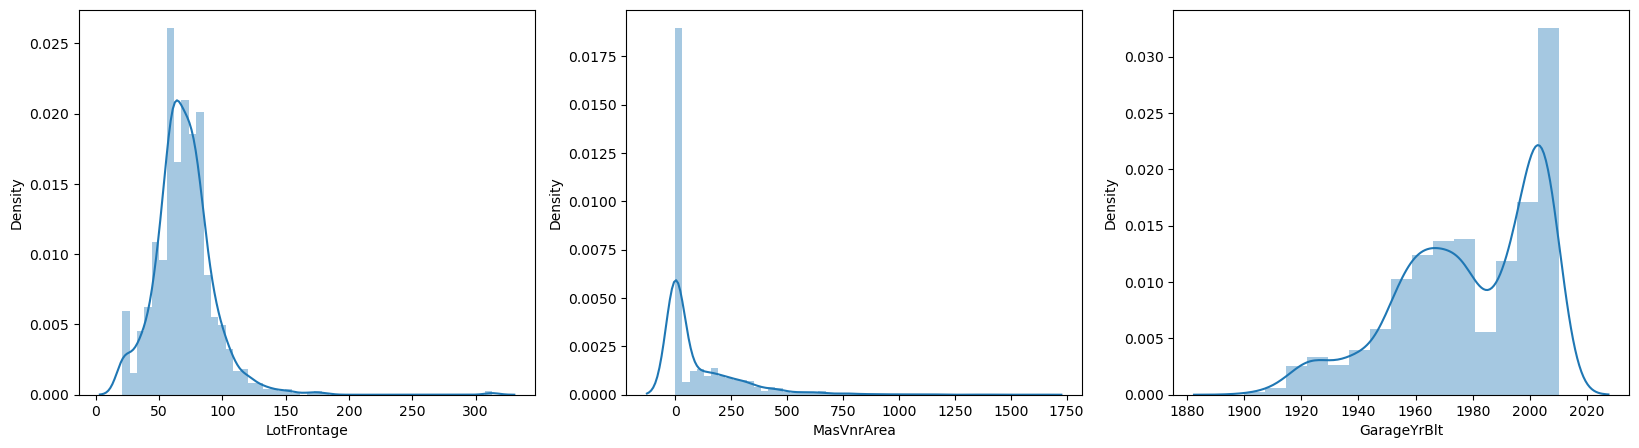

In [86]:
## Checking the distribution of the numeric null columns
i=1
plt.figure(figsize=(20, 5))
for col in raw:
    if col in all_null_col and raw[col].dtype!='object':
        plt.subplot(1,3,i)
        sns.distplot(raw[col])   
        i=i+1

plt.show()

<div class="alert alert-block alert-success">
After reviewing the null fields the below nulls are not actual nulls but it has NA as a part of their categores

- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeatures
- MasVnrType
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- GarageType
- GarageFinish
- GarageQual
    
</div>

### Data Cleaning:

##### Replacing the NA for the above fields with the corresponding category values:
- NA 	No alley access
- NA	No Fireplace
- NA	No Pool
- NA	No Fence
- NA	None
- NA	No Basement
- NA	No Garage

In [87]:
#Checkpoint 1
raw0=raw

In [88]:
for col in raw0:
    if col=='Alley':
        raw0[col]=raw0[col].fillna('No Alley')
    if col=='FireplaceQu':
        raw0[col]=raw0[col].fillna('No Fireplace')
    if col=='PoolQC':
        raw0[col]=raw0[col].fillna('No Pool')
    if col=='Fence':
        raw0[col]=raw0[col].fillna('No Fence')
    if col in ['MiscFeature','MasVnrType']:
        raw0[col]=raw0[col].fillna('None')
    if col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:               
        raw0[col]=raw0[col].fillna('No Basement')
    if col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
        raw0[col]=raw0[col].fillna('No Garage')
    

In [89]:
nulls=null_chk(raw0)
nulls

Total Number of null fields : 4


Field  percentage
0  LotFrontage   17.739726
1   MasVnrArea    0.547945
2   Electrical    0.068493
3  GarageYrBlt    5.547945

In [90]:
miss_col=list(nulls['Field'])
miss_col

['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt']

#### Imputation of Null Values:

In [91]:
for col in raw0[miss_col]:
    if raw0[col].dtype=='object':
        val=str(raw0[col].mode())
        raw0[col]=raw0[col].fillna(val)
    if col in ['GarageYrBlt']:
        val=float(raw0[col].mode())
        raw0[col]=raw0[col].fillna(val)
 

        
    if raw0[col].dtype!='object' and (col not in ['GarageYrBlt']):
        raw0[col]=raw0[col].fillna(raw0[col].mean())


##### Checking nulls after Imputaion :

In [92]:
nulls=null_chk(raw0)
nulls

Total Number of null fields : 0


Empty DataFrame
Columns: [Field, percentage]
Index: []

Distribution Before Imputation of missing Values:


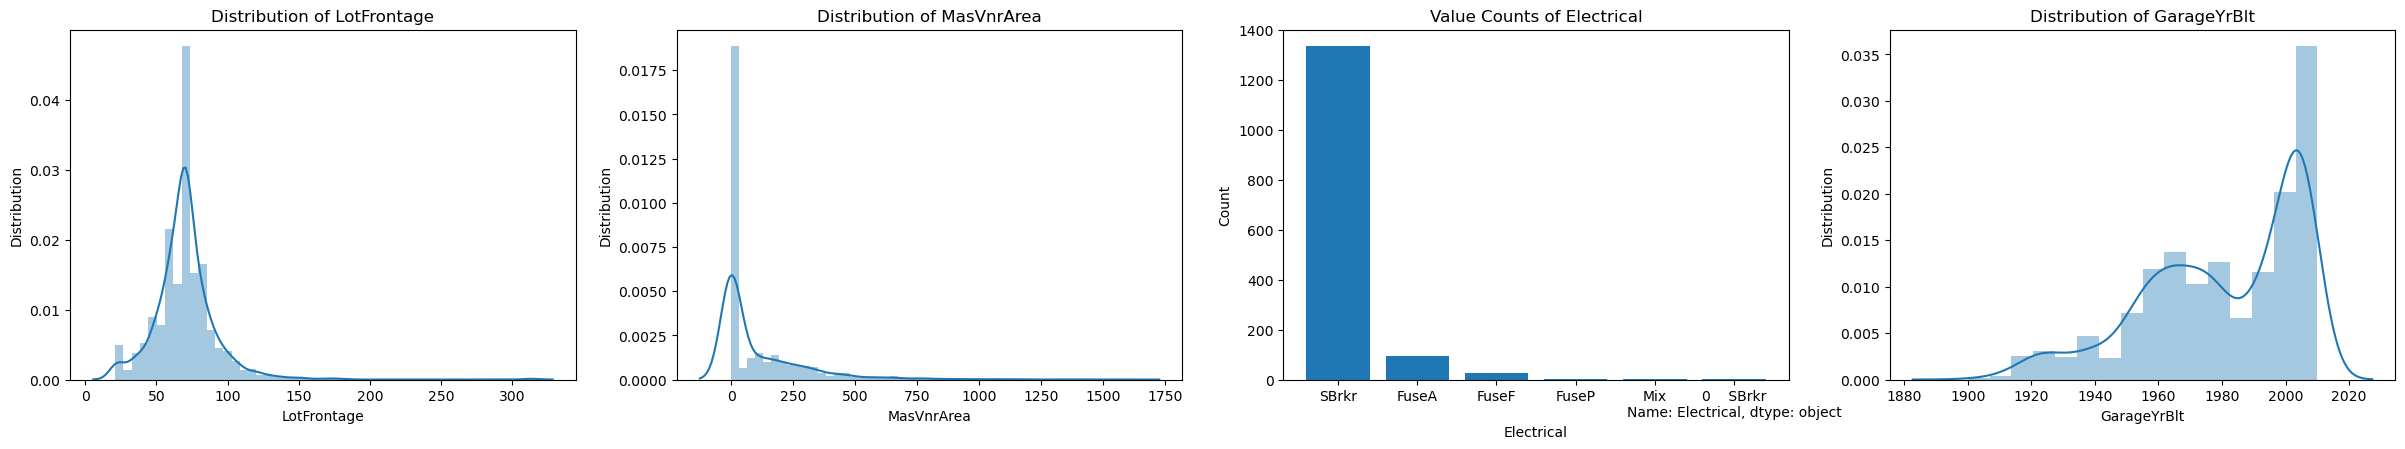

Distribution After Imputation of missing Values:


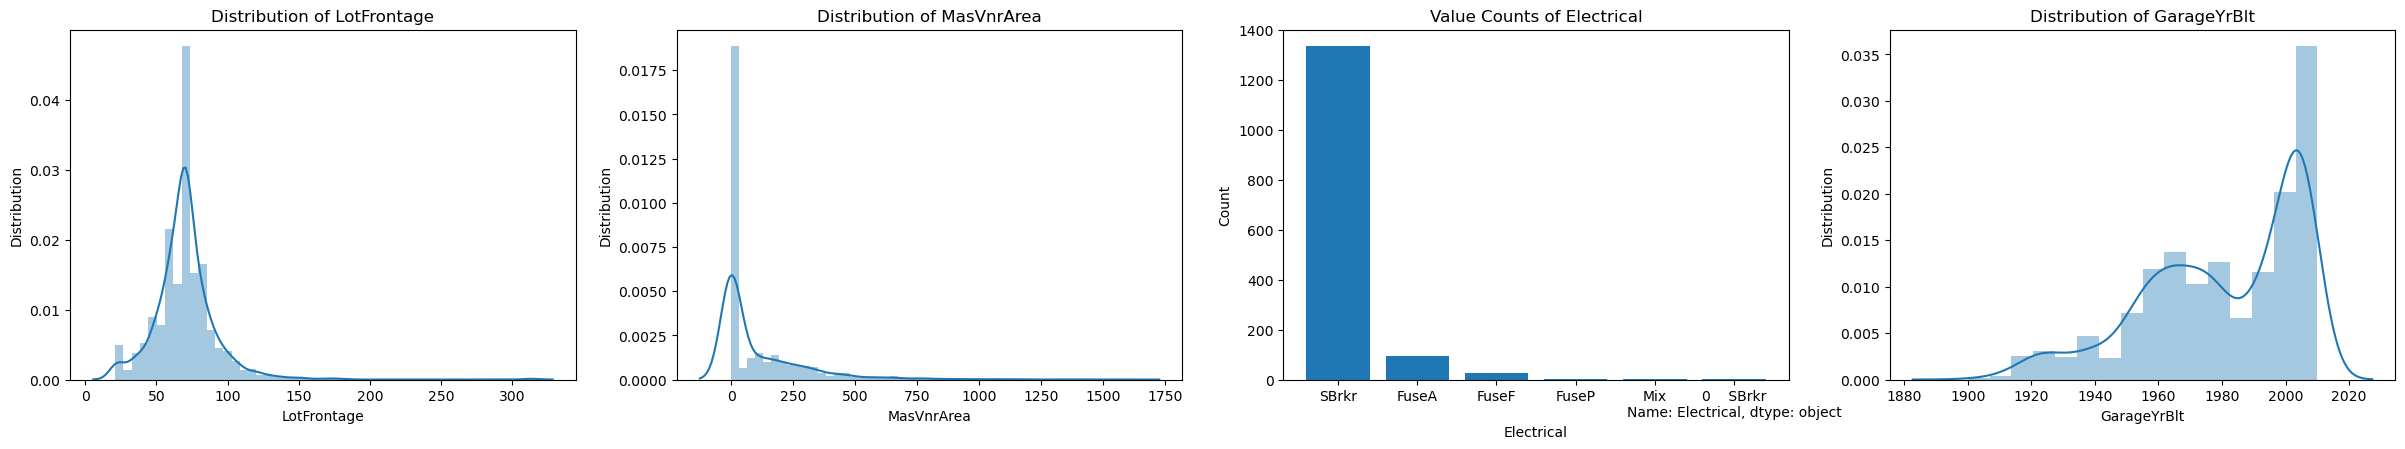

In [93]:
## Checking the distribution of the columns
i=1
print("Distribution Before Imputation of missing Values:")
plt.figure(figsize=(30, 10))


for col in raw[miss_col]:
    if raw[col].dtype=='object' :
        plt.subplot(2,4,i)
        value_counts=raw[col].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title('Value Counts of ' + col)
        i=i+1

    if raw[col].dtype!='object':
        plt.subplot(2,4,i)
        sns.distplot(raw[col]) 
        plt.xlabel(col)
        plt.ylabel('Distribution')
        plt.title('Distribution of ' + col)
        i=i+1
plt.show()

print("Distribution After Imputation of missing Values:")
i=1
plt.figure(figsize=(30, 10))

for col in raw0[miss_col]:
    if raw0[col].dtype=='object' :
        plt.subplot(2,4,i)
        value_counts=raw0[col].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title('Value Counts of ' + col)
        i=i+1

    if raw0[col].dtype!='object':
        plt.subplot(2,4,i)
        sns.distplot(raw0[col]) 
        plt.xlabel(col)
        plt.ylabel('Distribution')
        plt.title('Distribution of ' + col)
        i=i+1
        
plt.show()

<div class="alert alert-block alert-success">
    
- There are no changes in the distribution/ normality of the variables distribution post the imputation
    
- All the missing values were treated with proper imputation, data look good with 0 nulls.
</div>

In [94]:
raw0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Transformation:

<div class="alert alert-block alert-success">

Converting some numerical Variables to Categorigal variables by assigning categorical defenitions to numeric labels as per data dictionary to create dummy variables.
    
</div>


In [95]:
## Converting the numerical Variables to Categorigal variables as per data dictionary to create dummy variables


raw1=raw0

raw1['MSSubClass']=raw1['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

raw1['OverallQual']=raw1['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
raw1['OverallCond']=raw1['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [96]:
raw1.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

      Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  No Alley      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  No Alley      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2  No Alley      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3  No Alley      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4  No Alley      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  \
0       Norm       Norm     1Fam     2Story           Good     Average   
1      Feedr       Norm     1Fam     1Story  Above Average   Very Good   
2       Norm       Norm     1Fam     2Story           Good     Average   
3       Norm       Norm     1Fam     2Story           Good     Average   
4       Norm       Norm     1Fam     2Story      Very Good     Average   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3      

### Derived Field Calculation :

<div class="alert alert-block alert-success">
Using the existing property build and remodeled fields we can calculate the property age and remodel age.
</div>

In [97]:
raw1['SoldPropAge'] = raw1['YrSold'] -raw1['YearBuilt']
raw1['SoldRemodAge'] =  raw1['YrSold'] - raw1['YearRemodAdd']
raw1['SoldGarageAge'] =  raw1['YrSold'] - raw1['GarageYrBlt']

In [98]:
## Lets remove tthe fields that were used to calculate the derived fields 

ex_field=['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']
raw1.drop(ex_field,axis=1,inplace=True)


In [99]:
var=check_var(raw1)

#List of categorical variables from the above function
cat_var=var['Categorical']
num_var=var['Numerical']


Total Categorical Variable Count 46
Total Numerical Variable Count 33


### Checking Normality of the output variables:

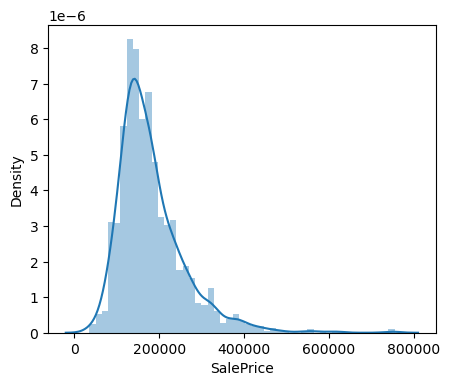

In [100]:
plt.figure(figsize=(5,4))
sns.distplot(raw1['SalePrice'])
plt.show()

<div class="alert alert-block alert-success">
While looking in to the depednant variable we have observed that the output variable is right skewed lets do a transformation to this variable to align it to a nprmal distribution.
</div>

In [101]:
## Using Log transformation methond to transform the ouput variable
raw1['SalePrice']=np.log(raw1['SalePrice'])

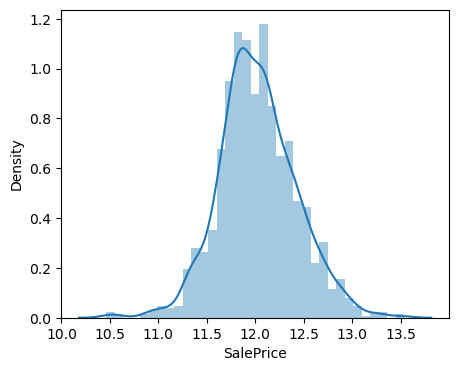

In [102]:
## Checking the normality after transformation
plt.figure(figsize=(5,4))
sns.distplot(raw1['SalePrice'])
plt.show()

<div class="alert alert-block alert-success">
Now the distribution of the data is close to a normal distribution, normality of the Data looks better after the transformation.
</div>

In [103]:
## Stats Before Transformation
raw['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [104]:
## Stats After Transformation
raw1['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

#### Removing Insignificant Variables:


In [105]:
raw1.drop('Id',axis=1,inplace=True)


# Data Exploration/EDA:

#### Total Variable list after Data Cleaning 



In [106]:
var1=check_var(raw1)

#List of categorical variables from the above function
cat_var=var1['Categorical']
num_var=var1['Numerical']


Total Categorical Variable Count 46
Total Numerical Variable Count 33


#### Refining Numerical Variables for outlier Analysis:

In [107]:
raw1[num_var].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.685262   443.639726    46.549315   
std      22.024023    9981.264932   180.569112   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      70.049958    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014     1.767123   
std        0.815778      0.220338      1.625393     0.644666     0.747315   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold    SalePrice  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918    12.024051   
std      55.757415    40.177307    496.123024     2.703626     0.399452   
min       0.000000     0.000000      0.000000     1.000000    10.460242   
25%       0.000000     0.000000      0.000000     5.000000    11.775097   
50%       0.000000     0.000000      0.000000     6.000000    12.001505   
75%       0.000000     0.000000      0.000000     8.00000

In [108]:
## Creating the list of discrete Numeric variables as per the Data dictitonary

disc= ['BsmtFullBath','BsmtHalfBath','FullBath',
       'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold']

cont_num_var = [x for x in num_var if x not in disc]
len(cont_num_var)

23

In [109]:
raw2=raw1

In [110]:
final_num_col=[]
for col in raw2[cont_num_var]:
    if raw2[col].quantile(0.75)>0 :
        final_num_col.append(col)
        
print(len(final_num_col))     
raw2[final_num_col].describe()

16


LotFrontage        LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.685262   443.639726   567.240411   
std      22.024023    9981.264932   180.569112   456.098091   441.866955   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000   223.000000   
50%      70.049958    9478.500000     0.000000   383.500000   477.500000   
75%      79.000000   11601.500000   164.250000   712.250000   808.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea   GarageArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466  1515.463699   472.980137   
std     438.705324   386.587738   436.528436   525.480383   213.804841   
min       0.000000   334.000000     0.000000   334.000000     0.000000   
25%     795.750000   882.000000     0.000000  1129.500000   334.500000   
50%     991.500000  1087.000000     0.000000  1464.000000   480.000000   
75%    1298.250000  1391.250000   728.000000  1776.750000   576.000000   
max    6110.000000  4692.000000  2065.000000  5642.000000  1418.000000   

        WoodDeckSF  OpenPorchSF    SalePrice  SoldPropAge  SoldRemodAge  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean     94.244521    46.660274    12.024051    36.547945     22.950000   
std     125.338794    66.256028     0.399452    30.250152     20.640653   
min       0.000000     0.000000    10.460242     0.000000     -1.000000   
25%       0.000000     0.000000    11.775097     8.000000      4.000000   
50%       0.000000    25.000000    12.001505    35.000000     14.000000   
75%     168.000000    68.000000    12.273731    54.000000     41.000000   
max     857.000000   547.000000    13.534473   136.000000     60.000000   

       SoldGarageAge  
count    1460.000000  
mean       27.839726  
std        24.782958  
min         0.000000  
25%         5.000000  
50%        23.500000  
75%        46.000000  
max       107.000000

## Univariate Analysis:


- Outlier Analysis
- Distribution Analysis
- Categorical Data Analysis

#### Final Numerical and Categorical Variables List: 

In [111]:
var_final=check_var(raw2)

#List of categorical variables from the above function
cat_var=var_final['Categorical']
num_var=var_final['Numerical']


Total Categorical Variable Count 46
Total Numerical Variable Count 33


#### Boxplot for numerical variables to identify and remove Outliers:

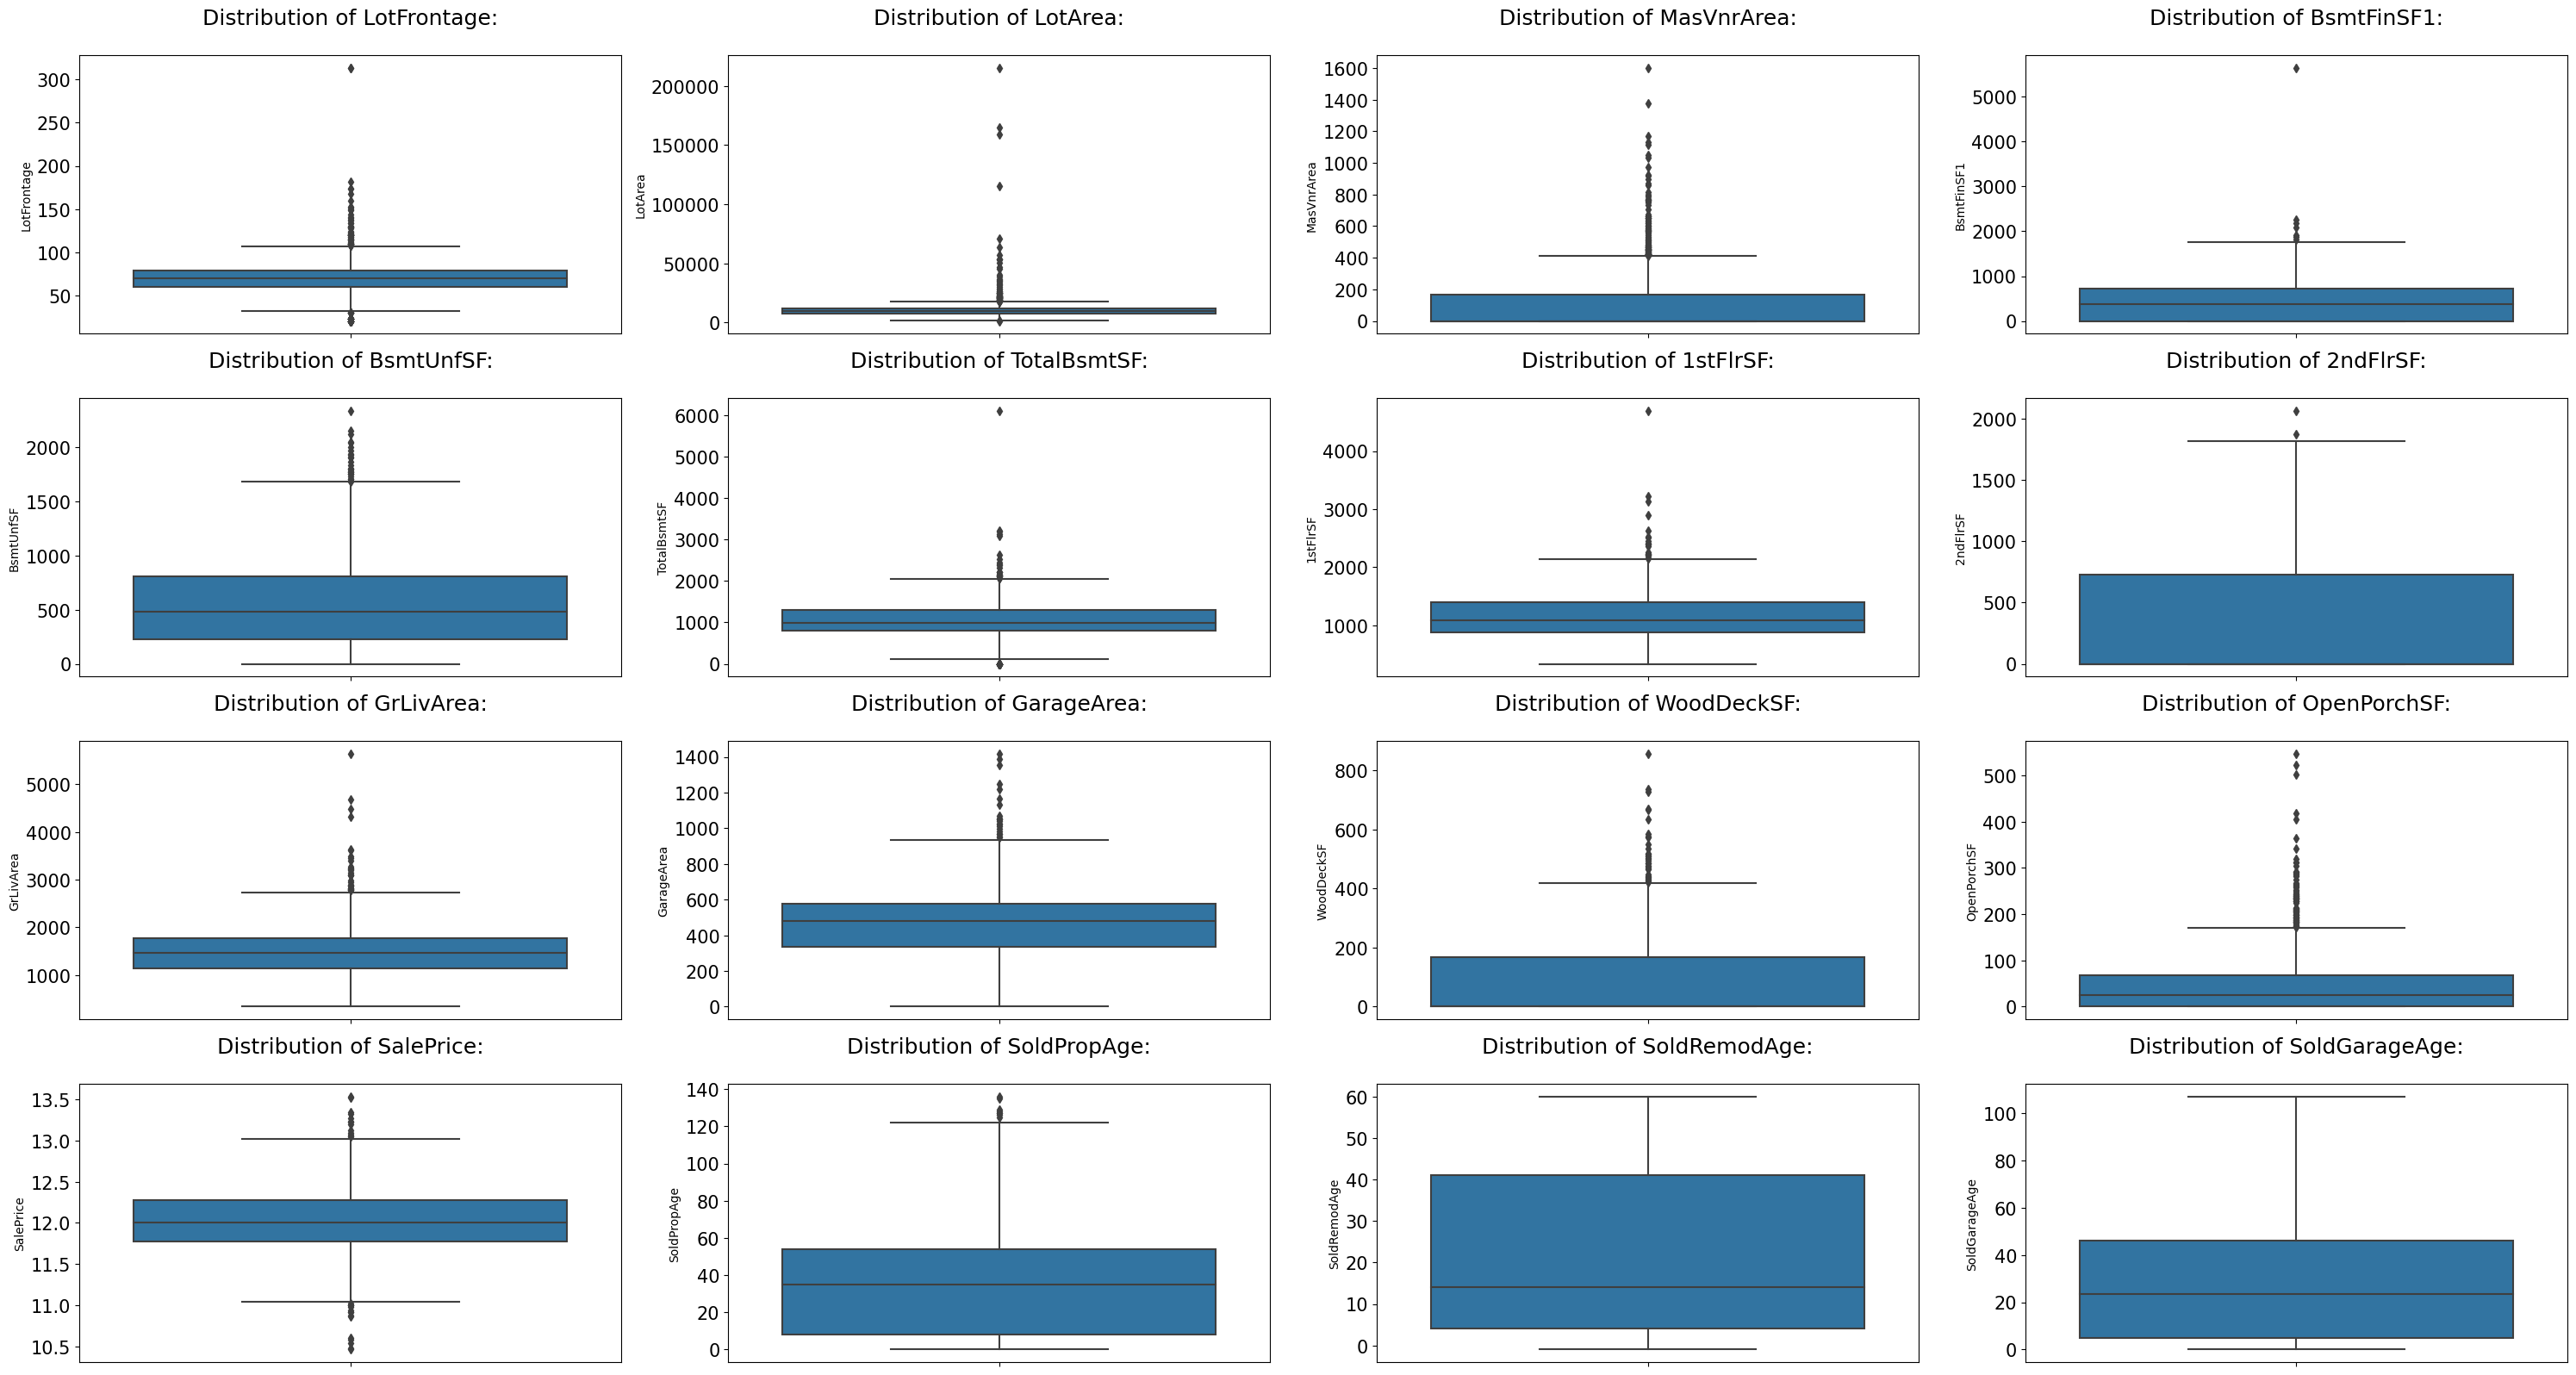

In [112]:
tot=len(final_num_col)
# calculation for subplots
i=4
j=(tot//i)+1
k=1

# Setting figure size
plt.figure(2,figsize=(30,20))

for col in raw2[final_num_col]:
    plt.subplot(j,i,k) 
    sns.boxplot(y=raw2[col])
    title =  "Distribution of " + col +":"+ "\n"
    plt.title(title,color="black",fontsize=18)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15,rotation=90)
    k+=1
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
Observed Outliers in Most of the columns , but in specific columns the 50 and 75 quantiles falls arround zero so fixing outliers on these fields might end up in loosing some data, so we will focus on fields which has quantile levels above zero.

</div>

#### Variables selected for outlier Treatment: 

- LotArea
- LotFrontage
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- GarageArea
- WoodDeckSF
- OpenPorchSF
- SoldPropAge

#### Count of outliers Present in Variables (Used IQR) :

In [113]:
exc_col =  ['2ndFlrSF','SoldPropAge', 'OpenPorchSF', 'WoodDeckSF','GarageArea','GrLivArea','1stFlrSF','TotalBsmtSF',
'BsmtUnfSF','BsmtFinSF1','MasVnrArea', 'LotArea','LotFrontage']

out_prop=pd.DataFrame()

for col in raw2[exc_col]:
    temp=[]  
    Q1= raw2[col].quantile(0.25)
    Q3 = raw2[col].quantile(0.75)  
    IQR=Q3-Q1
    lowerBand=Q1-(1.5*IQR)
    upperBand=Q3+(1.5*IQR)
    for val in raw2[col]:               
        if (val < lowerBand) or  (val > upperBand):
            temp.append(val)
    print("Number of Outliers in {} : {}".format(col,len(temp)))

    


Number of Outliers in 2ndFlrSF : 2
Number of Outliers in SoldPropAge : 8
Number of Outliers in OpenPorchSF : 77
Number of Outliers in WoodDeckSF : 32
Number of Outliers in GarageArea : 21
Number of Outliers in GrLivArea : 31
Number of Outliers in 1stFlrSF : 20
Number of Outliers in TotalBsmtSF : 61
Number of Outliers in BsmtUnfSF : 29
Number of Outliers in BsmtFinSF1 : 7
Number of Outliers in MasVnrArea : 98
Number of Outliers in LotArea : 69
Number of Outliers in LotFrontage : 106


<div class="alert alert-block alert-success">
    
<b>Capping Outliers usings IQR upper band and lower band:</b>

Capping outliers using nearest non outlying value lies close to the calculated upper and lower IQR band.
    
</div>

#### Stats Before Fixing Outliers:

In [114]:
# Before fixing Outlier
raw1.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.685262   443.639726    46.549315   
std      22.024023    9981.264932   180.569112   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      70.049958    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014     1.767123   
std        0.815778      0.220338      1.625393     0.644666     0.747315   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold    SalePrice  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918    12.024051   
std      55.757415    40.177307    496.123024     2.703626     0.399452   
min       0.000000     0.000000      0.000000     1.000000    10.460242   
25%       0.000000     0.000000      0.000000     5.000000    11.775097   
50%       0.000000     0.000000      0.000000     6.000000    12.001505   
75%       0.000000     0.000000      0.000000     8.00000

In [115]:
df=raw2[exc_col]
# Calculate the quartiles and IQR for each column

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds for capping outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers to the nearest non-outlying values
df = df.clip(lower_bound, upper_bound, axis=1)
raw2[exc_col]=df

#### Stats After Fixing Outliers:

In [116]:
# After fixing Outlier
raw2.describe()

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.276671   9647.388014    89.974474   439.997517    46.549315   
std      17.235602   3594.356399   133.856899   433.219435   161.319273   
min      31.500000   1481.500000     0.000000     0.000000     0.000000   
25%      60.000000   7553.500000     0.000000     0.000000     0.000000   
50%      70.049958   9478.500000     0.000000   383.500000     0.000000   
75%      79.000000  11601.500000   164.250000   712.250000     0.000000   
max     107.500000  17673.500000   410.625000  1780.625000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    563.777740  1050.254795  1157.018151   346.789041      5.844521   
std     431.710214   397.937878   362.583002   435.791621     48.623081   
min       0.000000    42.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    1685.500000  2052.000000  2155.125000  1820.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1503.735873      0.425342      0.057534     1.565068     0.382877   
std     481.375641      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    2747.625000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014     1.767123   
std        0.815778      0.220338      1.625393     0.644666     0.747315   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    470.670719    91.806849    42.603425      21.954110     3.409589   
std     207.105729   116.658120    52.501584      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max     938.250000   420.000000   170.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold    SalePrice  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918    12.024051   
std      55.757415    40.177307    496.123024     2.703626     0.399452   
min       0.000000     0.000000      0.000000     1.000000    10.460242   
25%       0.000000     0.000000      0.000000     5.000000    11.775097   
50%       0.000000     0.000000      0.000000     6.000000    12.001505   
75%       0.000000     0.000000      0.000000     8.000000    12.2

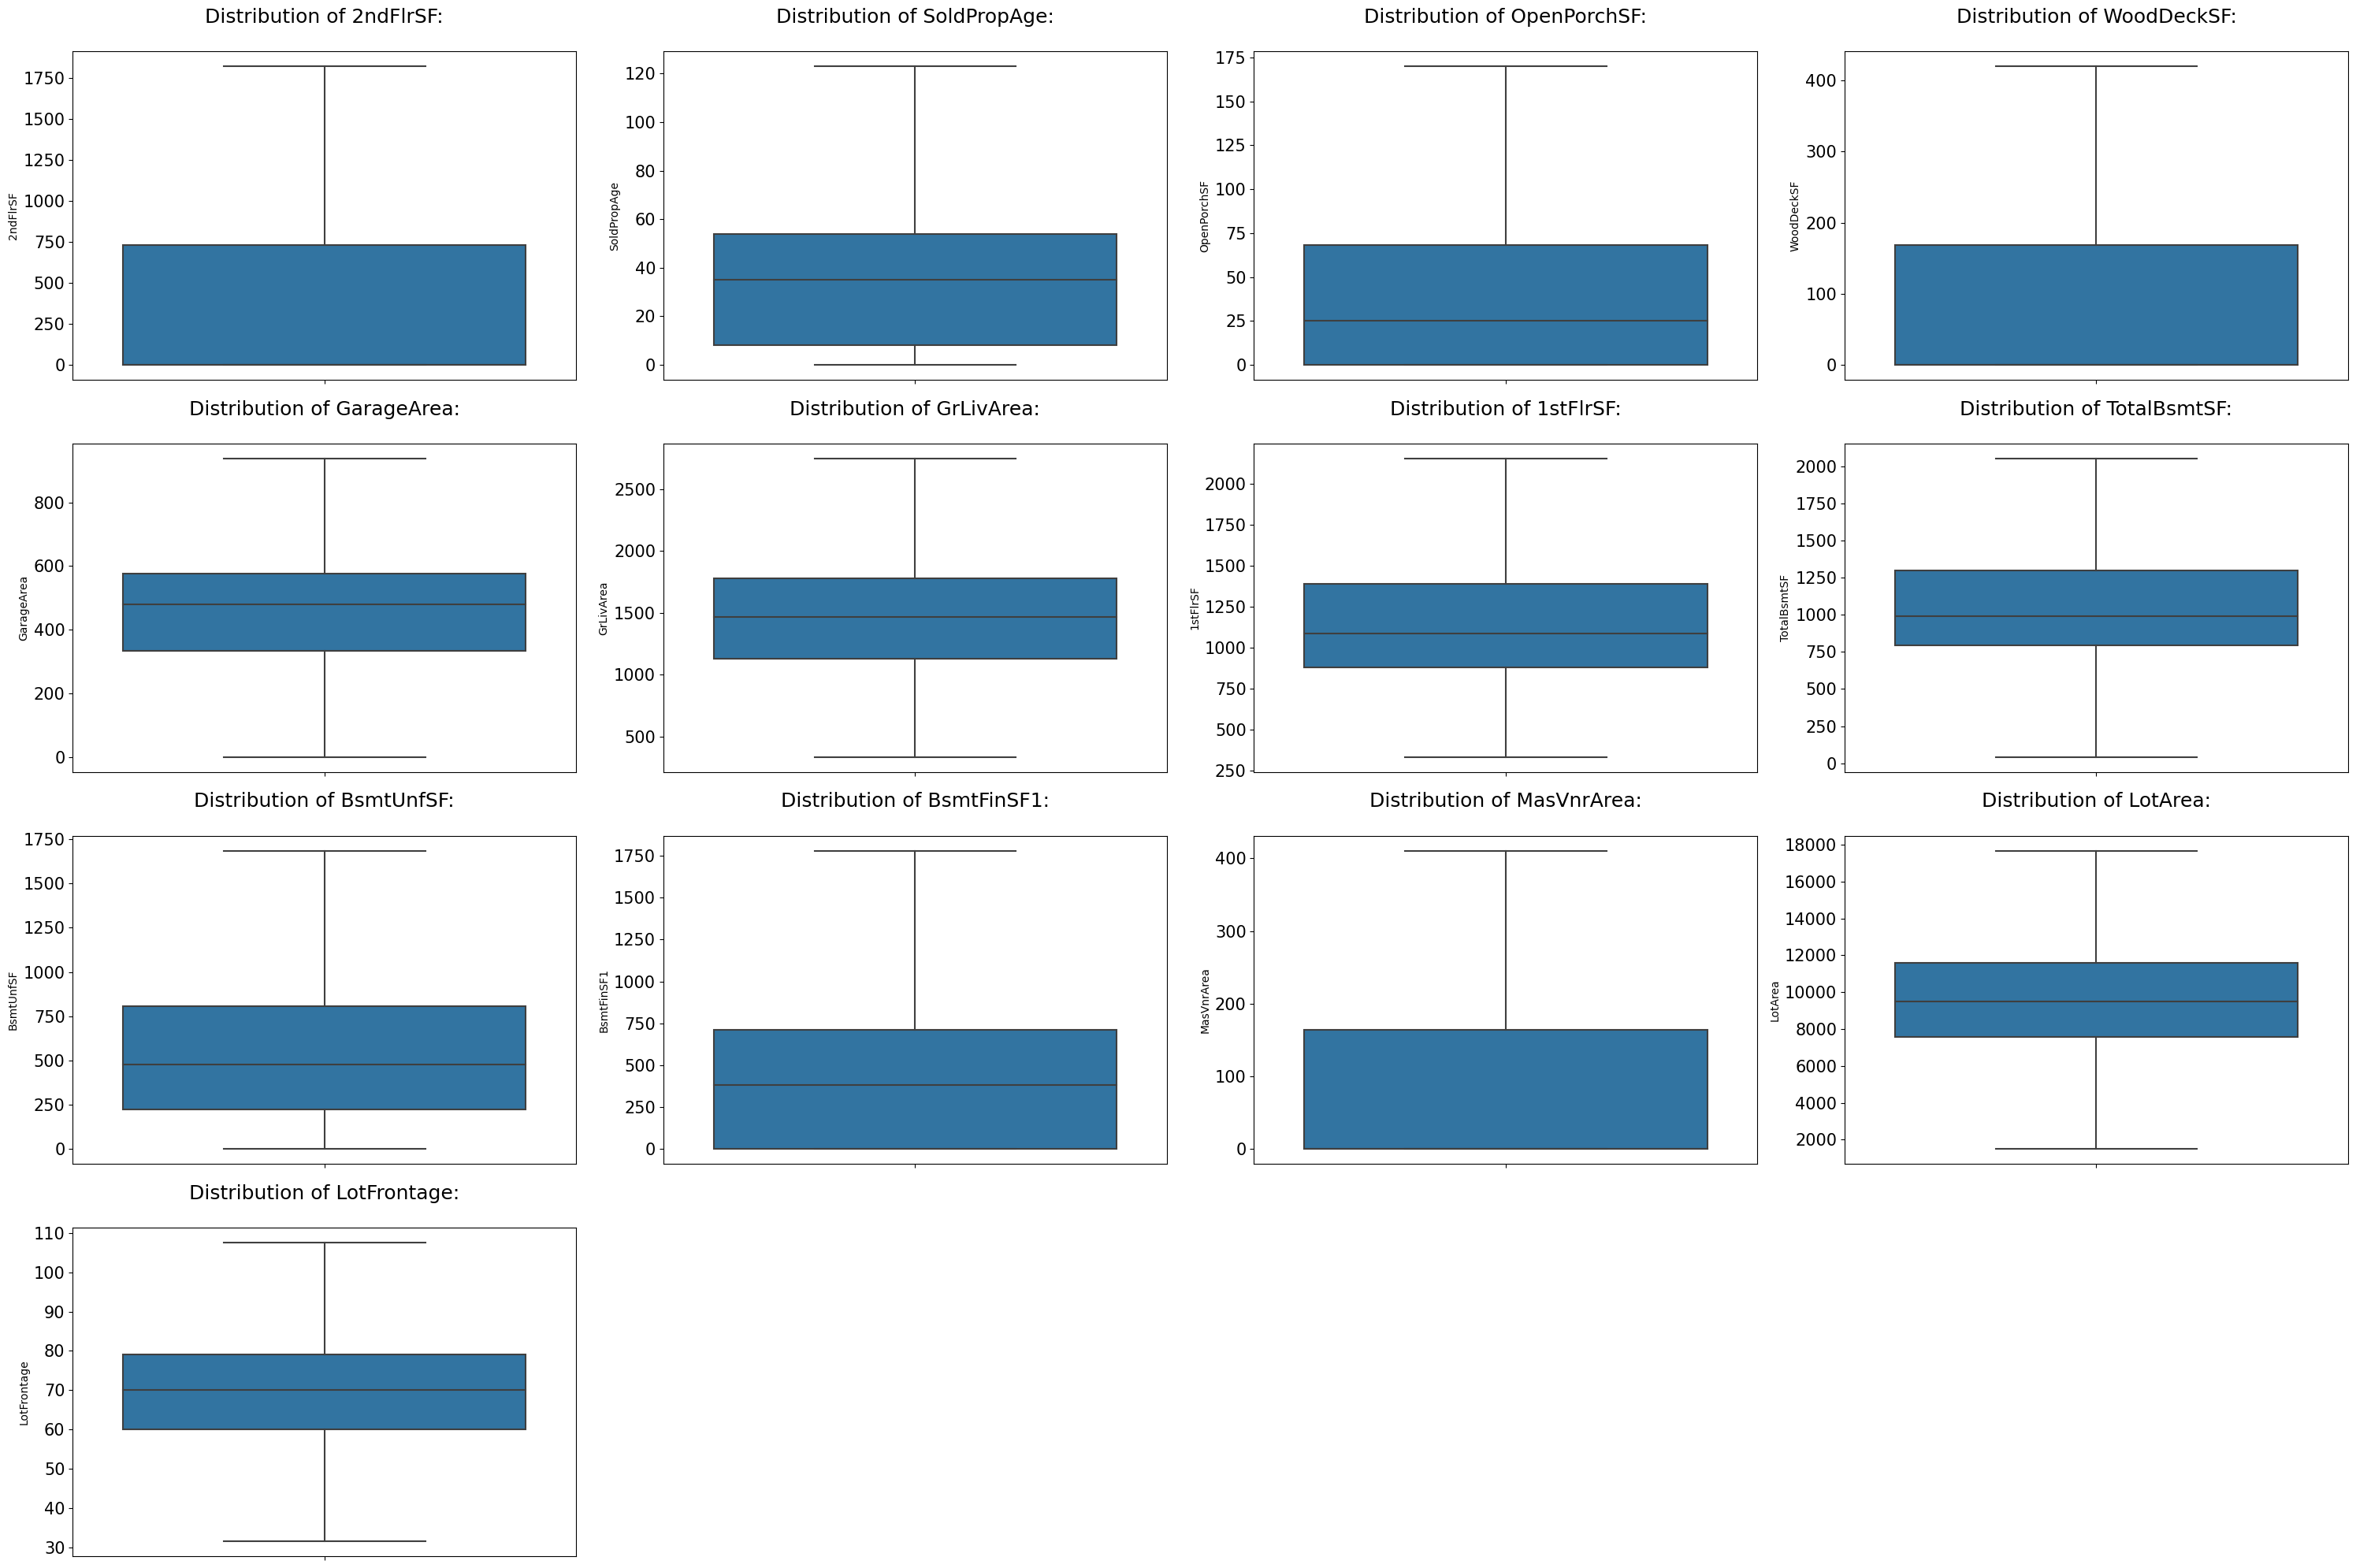

In [117]:
## Checking Outlier after Treatment
tot=len(exc_col)
# calculation for subplots
i=4
j=(tot//i)+1
k=1

# Setting figure size
plt.figure(2,figsize=(30,20))

for col in raw2[exc_col]:
    plt.subplot(j,i,k) 
    sns.boxplot(y=raw2[col])
    title =  "Distribution of " + col +":"+ "\n"
    plt.title(title,color="black",fontsize=18)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15,rotation=90)
    k+=1
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
    
#### All the Outliers were treated and the data is clean now.
    
</div>

### Univariate - Distribution Analysis:

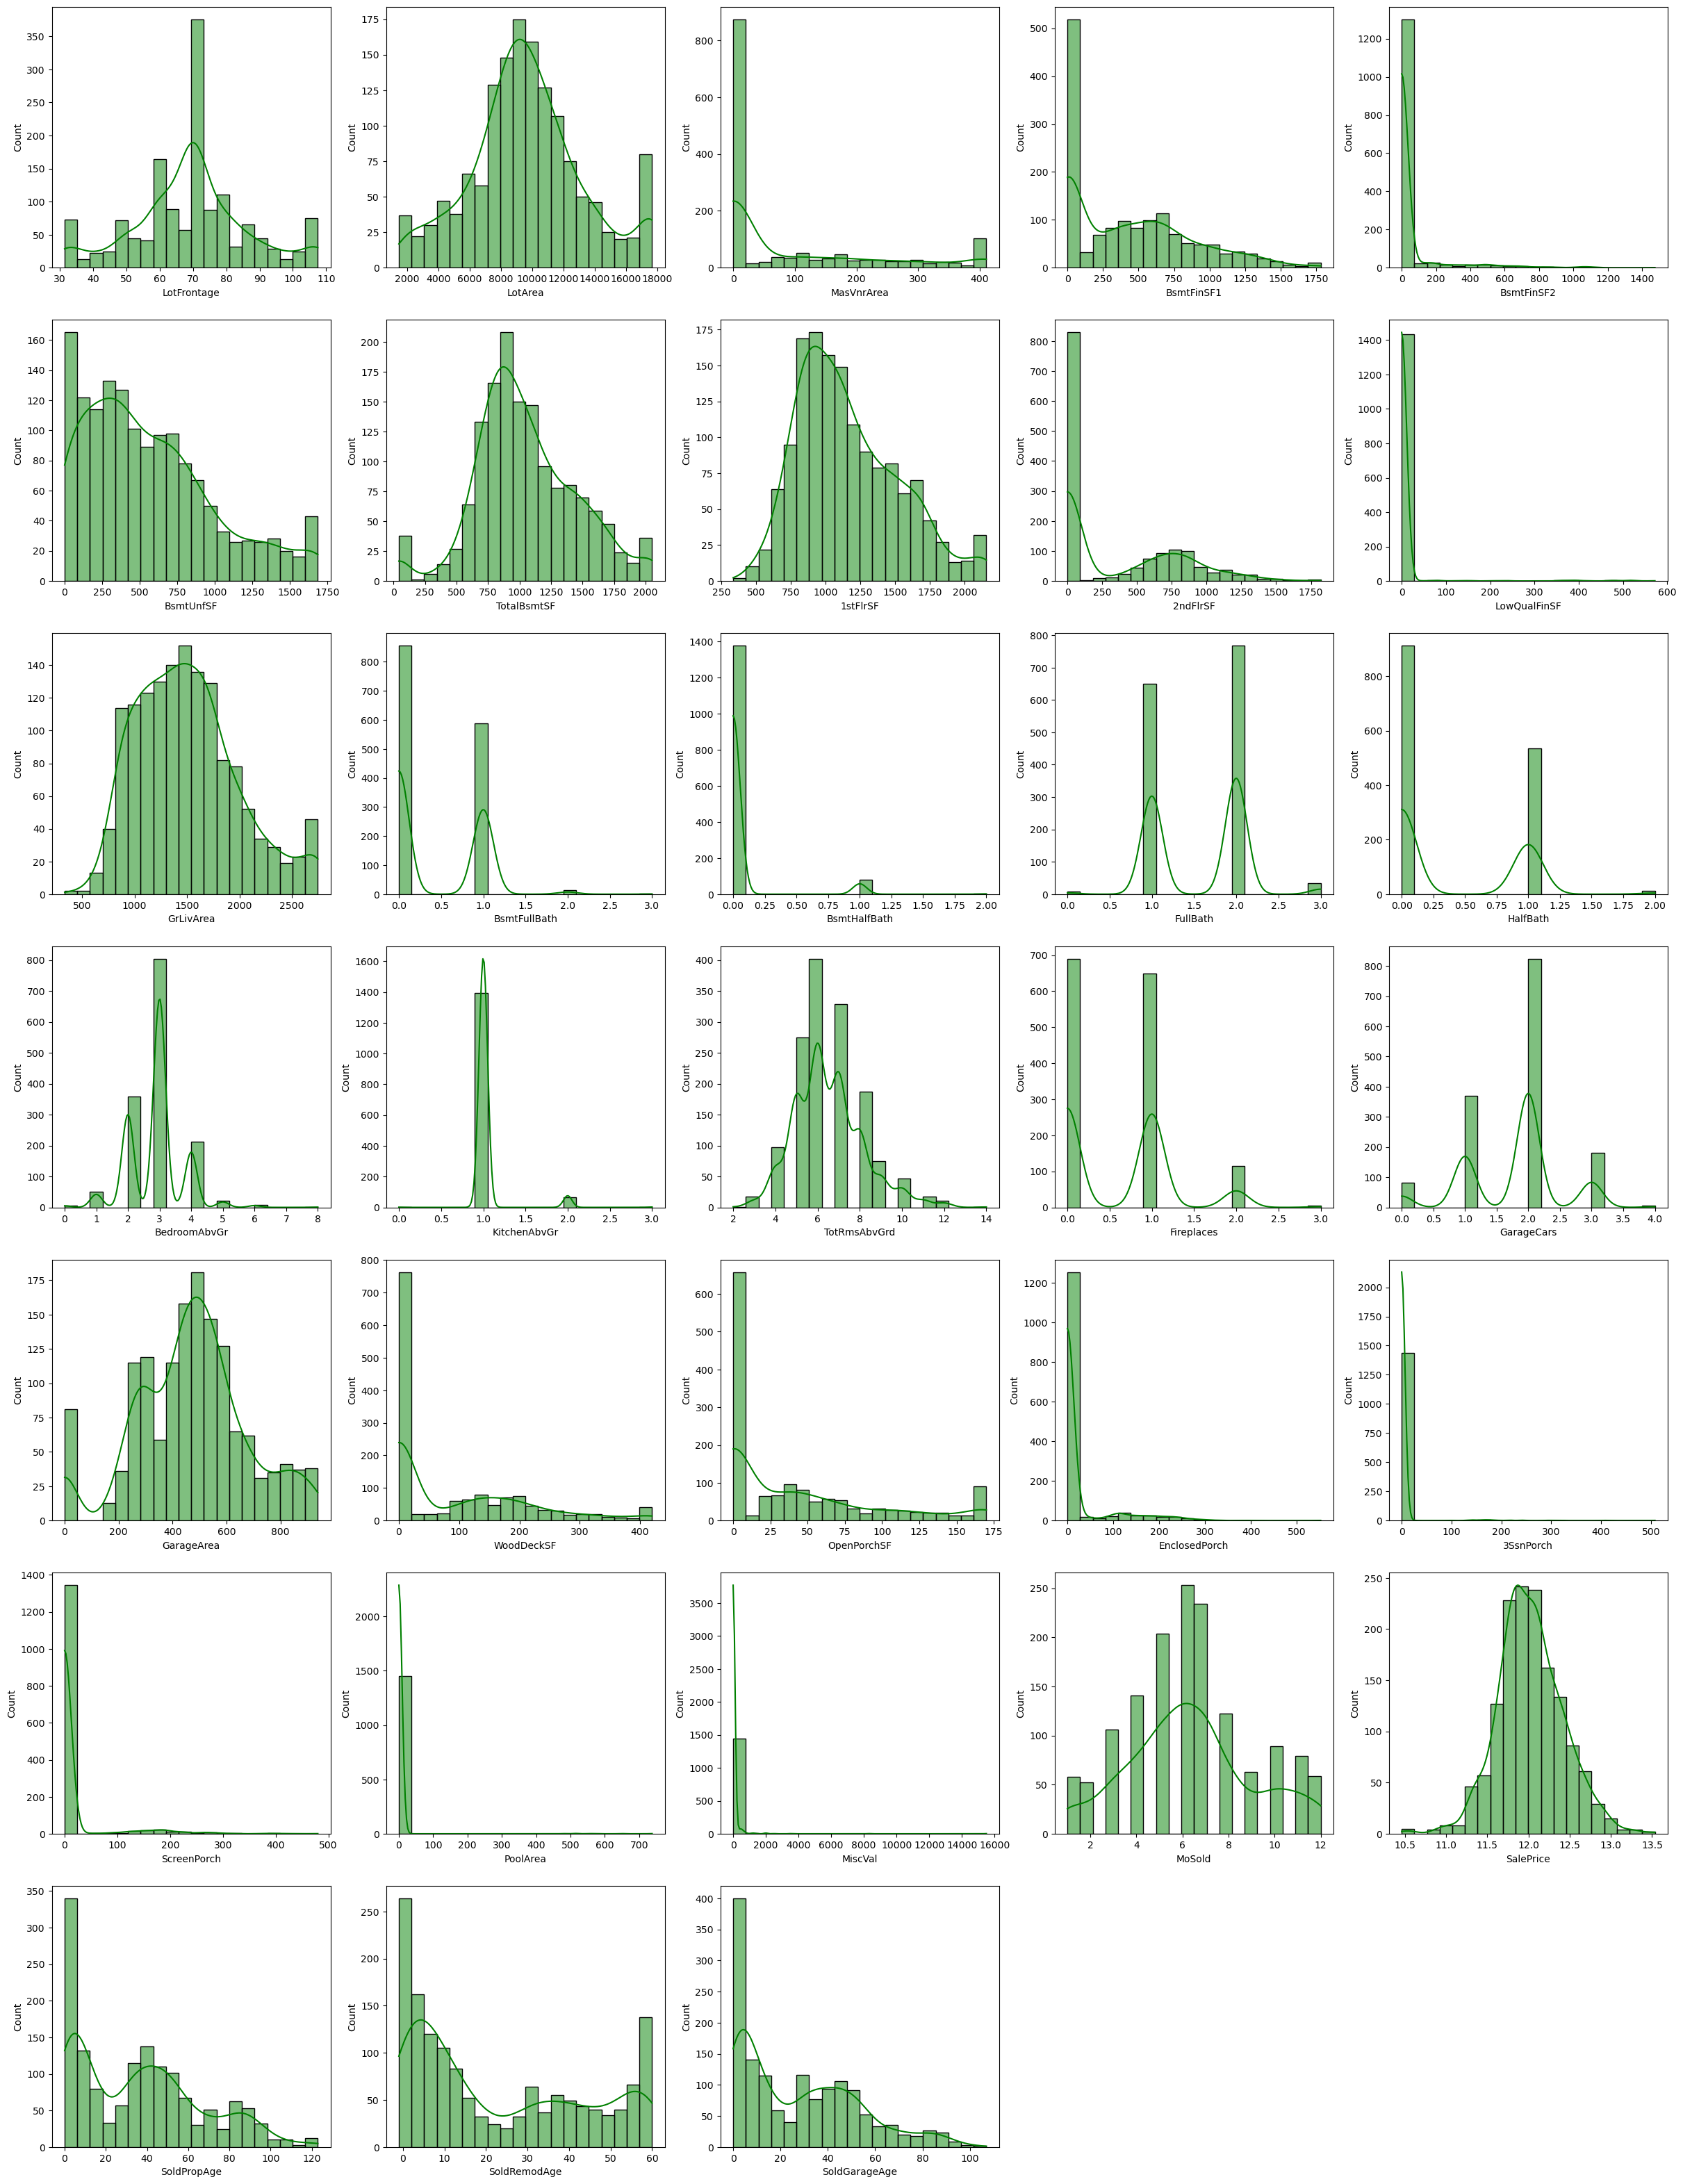

In [118]:

import math
i=1
cl=5
row=math.ceil(len(num_var)/cl)
plt.figure(figsize=(30,40))
for col in raw2:
    if col in num_var:

        plt.subplot(row,cl,i)
        sns.histplot(raw2[col],kde=True,color='green',bins=20)
        i=i+1
plt.show()

### Observations :

<div class="alert alert-block alert-success">

#### LotFrontage:
Observations: The variable "LotFrontage" has a very slight positive skewness, indicating a slightly right-skewed distribution. It shows a relatively symmetrical distribution of lot frontage values. The median (Q2) and mean are close, suggesting a balanced distribution.

Distribution: The distribution of "LotFrontage" falls under a normal distribution with balanced data. The variable seems significant in describing the lot frontage of houses, and no further action is required.

#### LotArea:
Observations: The variable "LotArea" has a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have smaller lot areas, with a few houses having larger areas. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "LotArea" falls under a normal distribution with imbalanced data, skewed towards larger lot areas. The variable seems significant in describing the lot area of houses, and further investigation may be required to address the presence of outliers.

#### MasVnrArea:
Observations: The variable "MasVnrArea" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have small masonry veneer areas, with a few houses having larger areas. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "MasVnrArea" falls under a normal distribution with balanced data. The variable seems significant in describing the masonry veneer area of houses, and no further action is required.

#### BsmtFinSF1:
Observations: The variable "BsmtFinSF1" has a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have smaller finished square footage in the basement, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "BsmtFinSF1" falls under a normal distribution with imbalanced data, skewed towards larger basement finished square footage. The variable seems significant in describing the finished square footage in the basement of houses, and further investigation may be required to address the presence of outliers.

#### BsmtFinSF2:
Observations: The variable "BsmtFinSF2" has a highly positive skewness, indicating a heavily right-skewed distribution. This suggests that a majority of houses have very small or no second finished square footage in the basement, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "BsmtFinSF2" falls under a normal distribution with highly imbalanced data, heavily skewed towards smaller or no second basement finished square footage. The variable may not be significant in describing the second finished square footage in the basement of houses, and further investigation is recommended to understand the distribution better.

#### BsmtUnfSF:
Observations: The variable "BsmtUnfSF" has a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have smaller unfinished square footage in the basement, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "BsmtUnfSF" falls under a normal distribution with imbalanced data, skewed towards larger unfinished square footage in the basement. The variable seems significant in describing the unfinished square footage in the basement of houses, and further investigation may be required to address the presence of outliers.

#### TotalBsmtSF:
Observations: The variable "TotalBsmtSF" has a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have smaller total square footage of the basement, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "TotalBsmtSF" falls under a normal distribution with imbalanced data, skewed towards larger total square footage of the basement. The variable seems significant in describing the total square footage of the basement in houses, and further investigation may be required to address the presence of outliers.

#### 1stFlrSF:
Observations: The variable "1stFlrSF" has a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have smaller square footage on the first floor, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "1stFlrSF" falls under a normal distribution with imbalanced data, skewed towards larger square footage on the first floor. The variable seems significant in describing the square footage on the first floor of houses, and further investigation may be required to address the presence of outliers.

#### 2ndFlrSF:
Observations: The variable "2ndFlrSF" has a highly positive skewness, indicating a heavily right-skewed distribution. This suggests that a majority of houses have very small or no square footage on the second floor, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "2ndFlrSF" falls under a normal distribution with highly imbalanced data, heavily skewed towards smaller or no square footage on the second floor. The variable may not be significant in describing the square footage on the second floor of houses, and further investigation is recommended to understand the distribution better.

#### LowQualFinSF:
Observations: The variable "LowQualFinSF" has a highly positive skewness, indicating a heavily right-skewed distribution. This suggests that a majority of houses have very small or no low-quality finished square footage, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "LowQualFinSF" falls under a normal distribution with highly imbalanced data, heavily skewed towards smaller or no low-quality finished square footage. The variable may not be significant in describing the low-quality finished square footage of houses, and further investigation is recommended to understand the distribution better.

#### GrLivArea:
Observations: The variable "GrLivArea" has a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have smaller above-ground living area, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "GrLivArea" falls under a normal distribution with imbalanced data, skewed towards larger above-ground living area. The variable seems significant in describing the above-ground living area of houses, and further investigation may be required to address the presence of outliers.

#### BsmtFullBath:
Observations: The variable "BsmtFullBath" shows a slight positive skewness, indicating a slightly right-skewed distribution. It suggests that a majority of houses have a smaller number of basement full bathrooms, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "BsmtFullBath" falls under a normal distribution with balanced data. The variable seems significant in describing the number of basement full bathrooms in houses


#### FullBath:
Observations: The variable "FullBath" shows a slight positive skewness, indicating a slightly right-skewed distribution. It suggests that a majority of houses have a smaller number of full bathrooms, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "FullBath" falls under a normal distribution with balanced data. The variable seems significant in describing the number of full bathrooms in houses, and no further action is required.

#### HalfBath:
Observations: The variable "HalfBath" shows a slight positive skewness, indicating a slightly right-skewed distribution. It suggests that a majority of houses have a smaller number of half bathrooms, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "HalfBath" falls under a normal distribution with balanced data. The variable seems significant in describing the number of half bathrooms in houses, and no further action is required.

#### BedroomAbvGr:
Observations: The variable "BedroomAbvGr" has a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller number of bedrooms above ground, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "BedroomAbvGr" falls under a normal distribution with imbalanced data, skewed towards smaller number of bedrooms above ground. The variable seems significant in describing the number of bedrooms above ground in houses, and further investigation may be required to address the presence of outliers.

#### KitchenAbvGr:
Observations: The variable "KitchenAbvGr" has a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller number of kitchens above ground, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "KitchenAbvGr" falls under a normal distribution with imbalanced data, skewed towards smaller number of kitchens above ground. The variable seems significant in describing the number of kitchens above ground in houses, and further investigation may be required to address the presence of outliers.

#### TotRmsAbvGrd:
Observations: The variable "TotRmsAbvGrd" has a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller total number of rooms above ground, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "TotRmsAbvGrd" falls under a normal distribution with imbalanced data, skewed towards smaller total number of rooms above ground. The variable seems significant in describing the total number of rooms above ground in houses, and further investigation may be required to address the presence of outliers.

#### Fireplaces:
Observations: The variable "Fireplaces" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller number of fireplaces, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "Fireplaces" falls under a normal distribution with imbalanced data, skewed towards a smaller number of fireplaces. The variable seems significant in describing the number of fireplaces in houses, and further investigation may be required to address the presence of outliers.

#### GarageCars:
Observations: The variable "GarageCars" shows a slight positive skewness, indicating a slightly right-skewed distribution. It suggests that a majority of houses have a smaller number of cars that can be accommodated in the garage, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "GarageCars" falls under a normal distribution with balanced data. The variable seems significant in describing the capacity of the garage in terms of the number of cars it can accommodate, and no further action is required.

#### GarageArea:
Observations: The variable "GarageArea" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller garage area, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "GarageArea" falls under a normal distribution with imbalanced data, skewed towards a smaller garage area. The variable seems significant in describing the area of the garage in houses, and further investigation may be required to address the presence of outliers.

#### WoodDeckSF:
Observations: The variable "WoodDeckSF" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller wood deck area, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "WoodDeckSF" falls under a normal distribution with imbalanced data, skewed towards a smaller wood deck area. The variable seems significant in describing the area of the wood deck in houses, and further investigation may be required to address the presence of outliers.

#### OpenPorchSF:
Observations: The variable "OpenPorchSF" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller open porch area, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "OpenPorchSF" falls under a normal distribution with imbalanced data, skewed towards a smaller open porch area. The variable seems significant in describing the area of the open porch in houses, and further investigation may be required to address the presence of outliers.

#### EnclosedPorch:
Observations: The variable "EnclosedPorch" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller enclosed porch area, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "EnclosedPorch" falls under a normal distribution with imbalanced data, skewed towards a smaller enclosed porch area. The variable seems significant in describing the area of the enclosed porch in houses, and further investigation may be required to address the presence of outliers.

#### 3SsnPorch:
Observations: The variable "3SsnPorch" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller three-season porch area, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "3SsnPorch" falls under a normal distribution with imbalanced data, skewed towards a smaller three-season porch area. The variable seems significant in describing the area of the three-season porch in houses, and further investigation may be required to address the presence of outliers.

#### ScreenPorch:
Observations: The variable "ScreenPorch" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller screen porch area, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "ScreenPorch" falls under a normal distribution with imbalanced data, skewed towards a smaller screen porch area. The variable seems significant in describing the area of the screen porch in houses, and further investigation may be required to address the presence of outliers.

#### PoolArea:
Observations: The variable "PoolArea" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have a smaller pool area, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "PoolArea" falls under a normal distribution with imbalanced data, skewed towards a smaller pool area. The variable seems significant in describing the area of the pool in houses, and further investigation may be required to address the presence of outliers.

####  MiscVal:
Observations: The variable "MiscVal" shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have smaller miscellaneous values, with a few houses having larger values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "MiscVal" falls under a normal distribution with imbalanced data, skewed towards smaller miscellaneous values. The variable seems significant in describing miscellaneous values associated with houses, and further investigation may be required to address the presence of outliers.

#### MoSold:
Observations: The variable "MoSold" represents the month of the year when the house was sold. It shows a relatively balanced distribution across the months, with no apparent skewness or outliers.

Distribution: The distribution of "MoSold" is evenly spread across the months, indicating a balanced representation of house sales throughout the year. The variable provides information about the timing of house sales but may not require further action.

#### SalePrice:
Observations: The variable "SalePrice" represents the sale price of the house. It shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have lower sale prices, with a few houses having higher values. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "SalePrice" falls under a normal distribution with imbalanced data, skewed towards lower sale prices. The variable is of significant interest as it represents the target variable for house price prediction. Further analysis and modeling can be conducted to understand the factors influencing house prices.

#### SoldPropAge:
Observations: The variable "SoldPropAge" represents the age of the property at the time of sale. It shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses are relatively newer, with a few houses being older. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "SoldPropAge" falls under a normal distribution with imbalanced data, skewed towards newer properties. The variable provides information about the age of the property, which may be an important factor in house pricing and demand.

#### SoldRemodAge:
Observations: The variable "SoldRemodAge" represents the age of the property since the last remodel at the time of sale. It shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have had recent remodels, with a few houses being older and not recently remodeled. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "SoldRemodAge" falls under a normal distribution with imbalanced data, skewed towards recently remodeled properties. The variable provides information about the recency of property remodels, which may be relevant in house pricing and buyer preferences.

#### SoldGarageAge:
Observations: The variable "SoldGarageAge" represents the age of the garage at the time of sale. It shows a positive skewness, indicating a right-skewed distribution. This suggests that a majority of houses have relatively newer garages, with a few houses having older garages. The presence of outliers towards higher values is indicated by the larger difference between the median and mean.

Distribution: The distribution of "SoldGarageAge" falls under a normal distribution with imbalanced data, skewed towards newer garages. The variable provides information about the age of the garage, which may be an important factor in house pricing and buyer preferences.
    
</div>

#### Univariate - Categorical Analysis

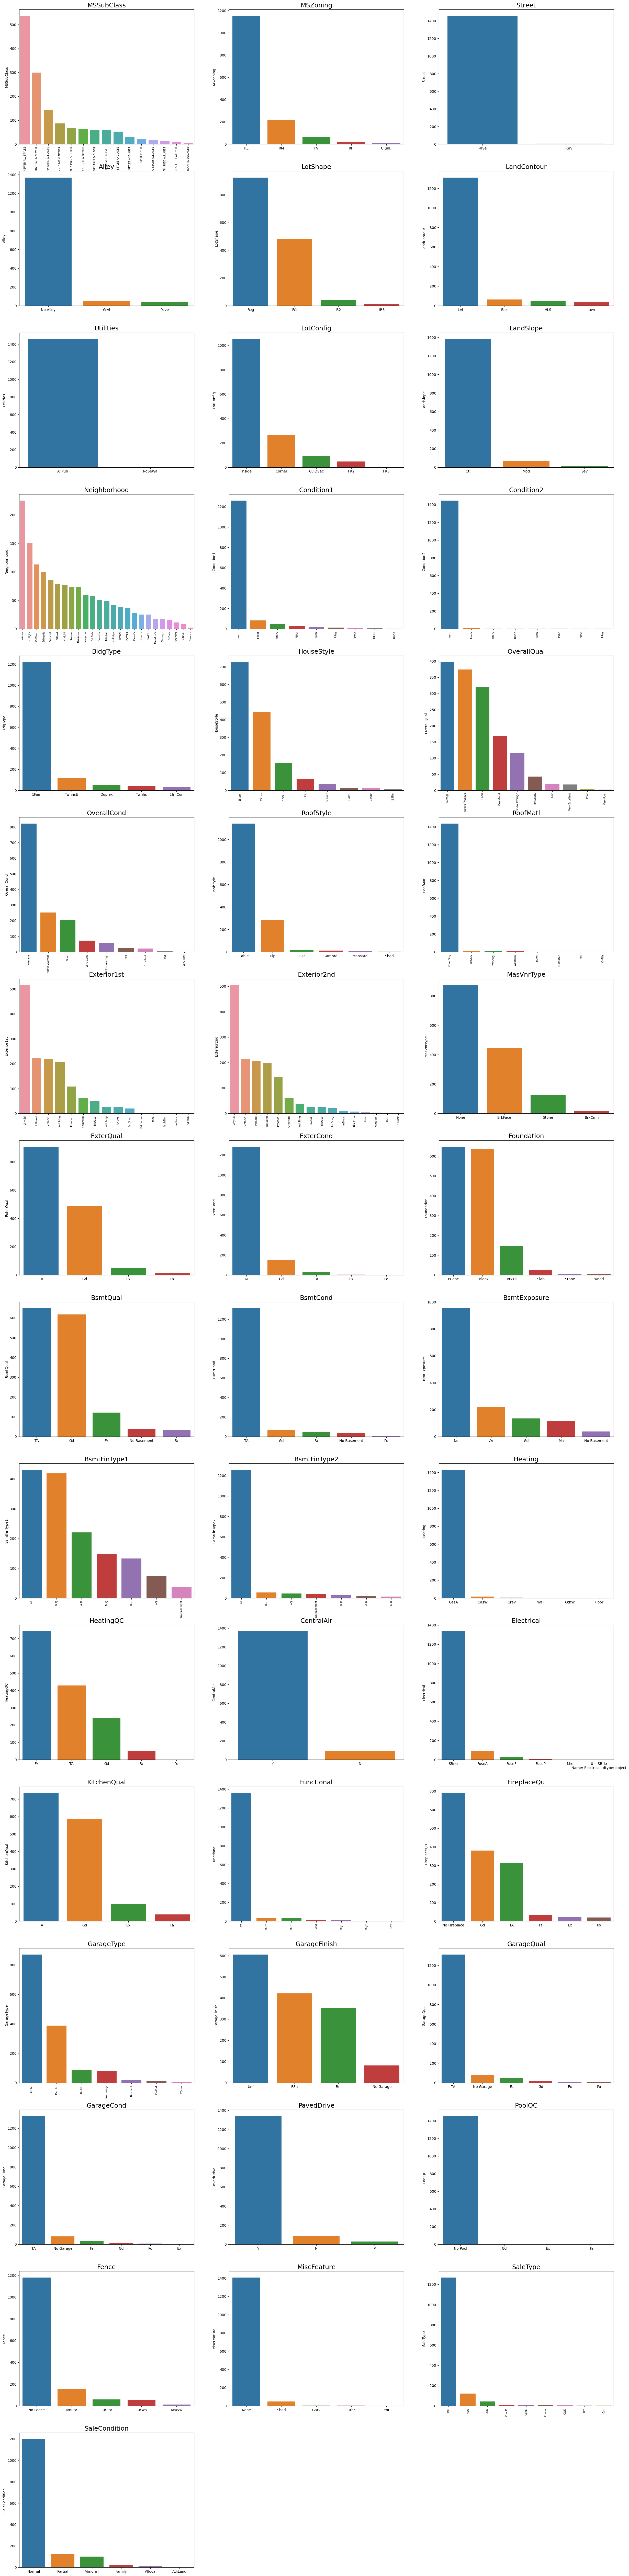

In [119]:

import math
i=1
cl=3
row=math.ceil(len(cat_var)/cl)
plt.figure(figsize=(30,130))
for col in raw2[cat_var]:
    
    plt.subplot(row,cl,i)
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(raw2[col].value_counts().index, raw2[col].value_counts())
    if raw2[col].nunique() > 6 :
        plt.xticks(rotation=90,fontsize=7) 
    
    i=i+1
plt.show()

In [120]:
print(raw2['RoofMatl'].value_counts())
print(raw2['Street'].value_counts())
print(raw2['Utilities'].value_counts())
print(raw2['Condition2'].value_counts())
print(raw2['PoolQC'].value_counts())
print(raw2['Heating'].value_counts())


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


<div class=" alert alert-block alert-success">
Out of all these Variables we can remove 'Street','Utilities','Condition2','RoofMatl','PoolQC' which will make less significance through its categories to the analysis even though these values were not ideally single all these variables is baised with a single category.Since these Categories were unbalanced this would not help much in the analysis.
    
</div>

### Dropping higly unbalanced Values:


In [121]:
raw3=raw2.drop(['Street','Utilities','Condition2','RoofMatl','PoolQC'],axis=1)

print(raw2.shape[1])
print(raw3.shape[1])

79
74


In [122]:
print(raw2.shape)
print(raw3.shape)

(1460, 79)
(1460, 74)


### Bivariate Analysis:

Total Categorical Variable Count 41
Total Numerical Variable Count 33

 Statistics for MSSubClass vs Sales Price :

+-------------------------------------------------------+---------+----------+---------+--------+
| MSSubClass                                            |     sum |   median |   count |   %sum |
+=======================================================+=========+==========+=========+========+
| 1-STORY 1946 & NEWER ALL STYLES                       | 6460.29 |    11.98 |     536 |  36.8  |
+-------------------------------------------------------+---------+----------+---------+--------+
| 2-STORY 1946 & NEWER                                  | 3689.65 |    12.28 |     299 |  21.02 |
+-------------------------------------------------------+---------+----------+---------+--------+
| 1-1/2 STORY FINISHED ALL AGES                         | 1701.29 |    11.79 |     144 |   9.69 |
+-------------------------------------------------------+---------+----------+---------+--------+
| 

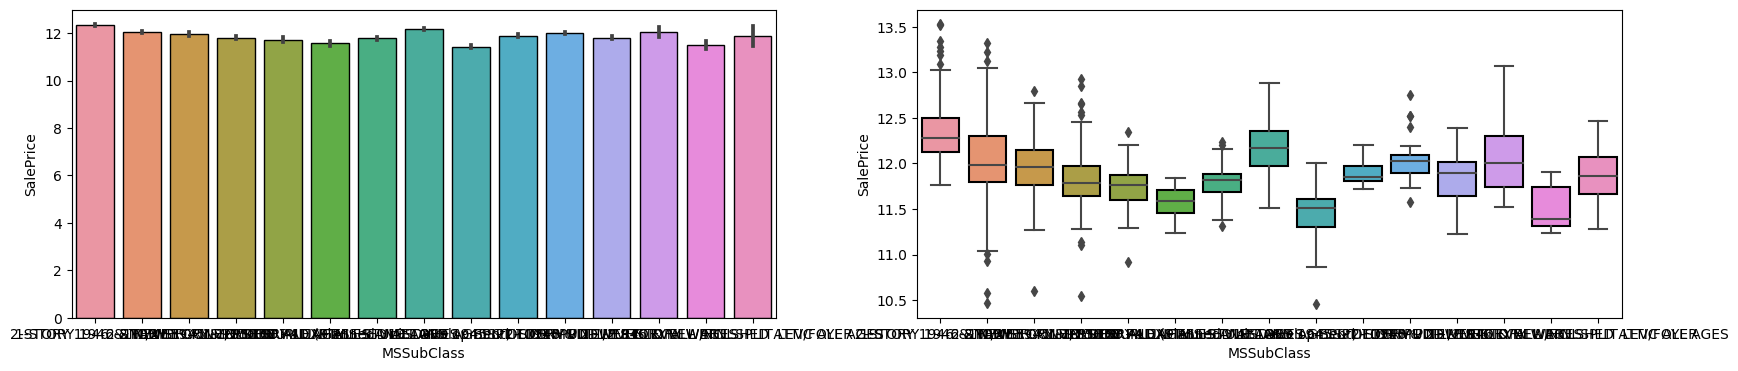


 Statistics for MSZoning vs Sales Price :

+------------+----------+----------+---------+--------+
| MSZoning   |      sum |   median |   count |   %sum |
+============+==========+==========+=========+========+
| RL         | 13910.9  |    12.07 |    1151 |  79.24 |
+------------+----------+----------+---------+--------+
| RM         |  2549.05 |    11.7  |     218 |  14.52 |
+------------+----------+----------+---------+--------+
| FV         |   796.03 |    12.24 |      65 |   4.53 |
+------------+----------+----------+---------+--------+
| RH         |   188    |    11.82 |      16 |   1.07 |
+------------+----------+----------+---------+--------+
| C (all)    |   111.18 |    11.22 |      10 |   0.63 |
+------------+----------+----------+---------+--------+ 
 
Visualization for MSZoning vs Sales Price : 



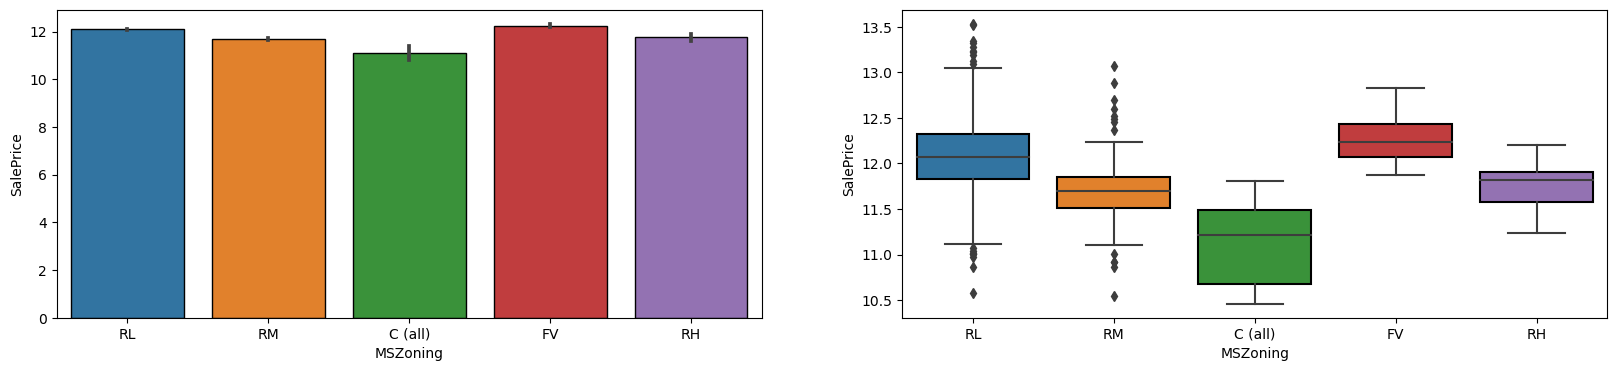


 Statistics for Alley vs Sales Price :

+----------+----------+----------+---------+--------+
| Alley    |      sum |   median |   count |   %sum |
+==========+==========+==========+=========+========+
| No Alley | 16479.6  |    12.01 |    1369 |  93.87 |
+----------+----------+----------+---------+--------+
| Grvl     |   583.67 |    11.69 |      50 |   3.32 |
+----------+----------+----------+---------+--------+
| Pave     |   491.87 |    12.06 |      41 |   2.8  |
+----------+----------+----------+---------+--------+ 
 
Visualization for Alley vs Sales Price : 



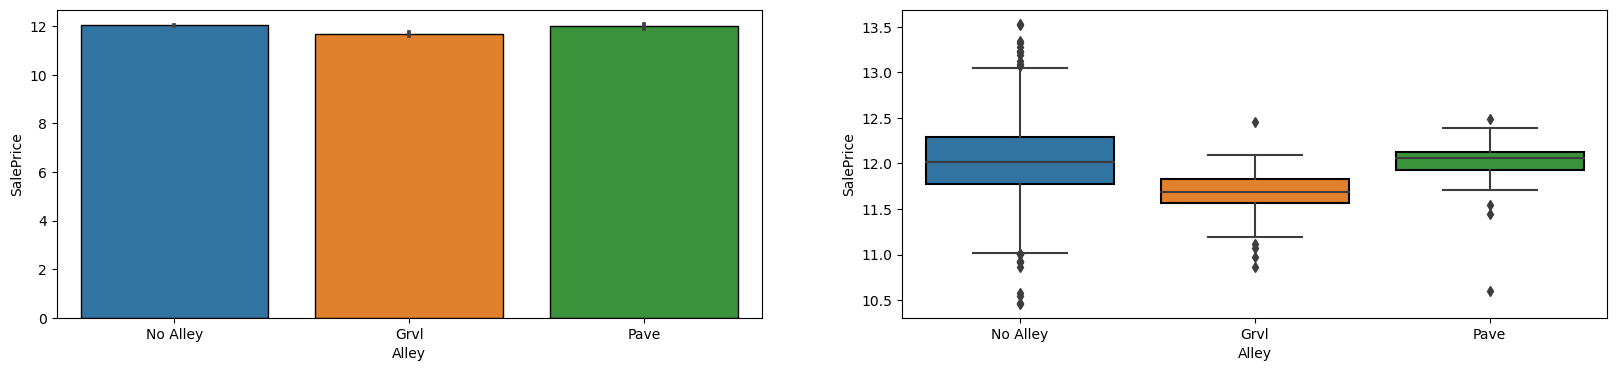


 Statistics for LotShape vs Sales Price :

+------------+----------+----------+---------+--------+
| LotShape   |      sum |   median |   count |   %sum |
+============+==========+==========+=========+========+
| Reg        | 11040.9  |    11.89 |     925 |  62.89 |
+------------+----------+----------+---------+--------+
| IR1        |  5887.12 |    12.15 |     484 |  33.54 |
+------------+----------+----------+---------+--------+
| IR2        |   505.06 |    12.31 |      41 |   2.88 |
+------------+----------+----------+---------+--------+
| IR3        |   122.05 |    12.22 |      10 |   0.7  |
+------------+----------+----------+---------+--------+ 
 
Visualization for LotShape vs Sales Price : 



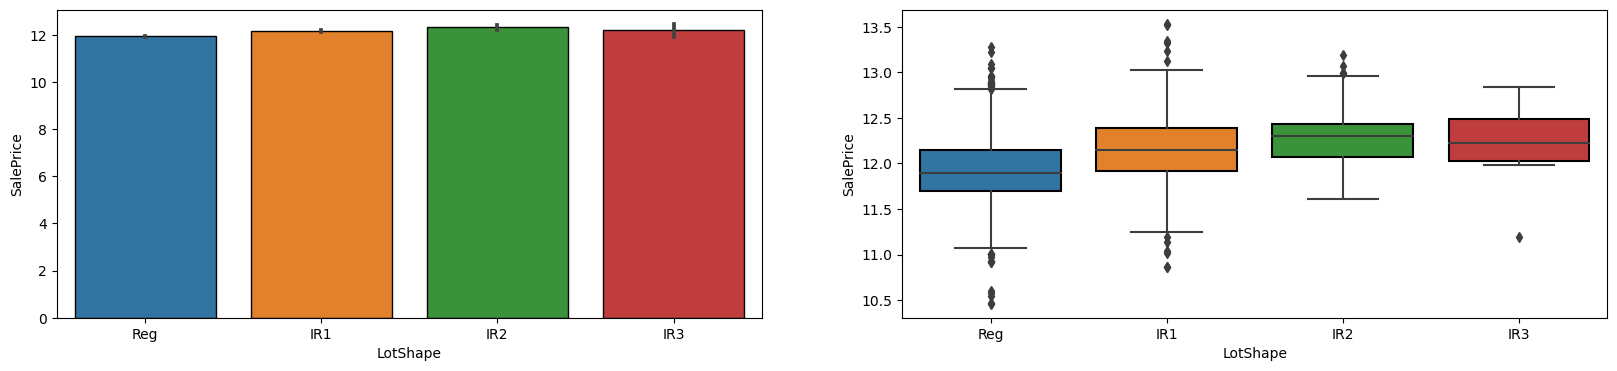


 Statistics for LandContour vs Sales Price :

+---------------+----------+----------+---------+--------+
| LandContour   |      sum |   median |   count |   %sum |
+===============+==========+==========+=========+========+
| Lvl           | 15761.8  |    12    |    1311 |  89.78 |
+---------------+----------+----------+---------+--------+
| Bnk           |   744.08 |    11.85 |      63 |   4.24 |
+---------------+----------+----------+---------+--------+
| HLS           |   612.96 |    12.31 |      50 |   3.49 |
+---------------+----------+----------+---------+--------+
| Low           |   436.32 |    12.15 |      36 |   2.49 |
+---------------+----------+----------+---------+--------+ 
 
Visualization for LandContour vs Sales Price : 



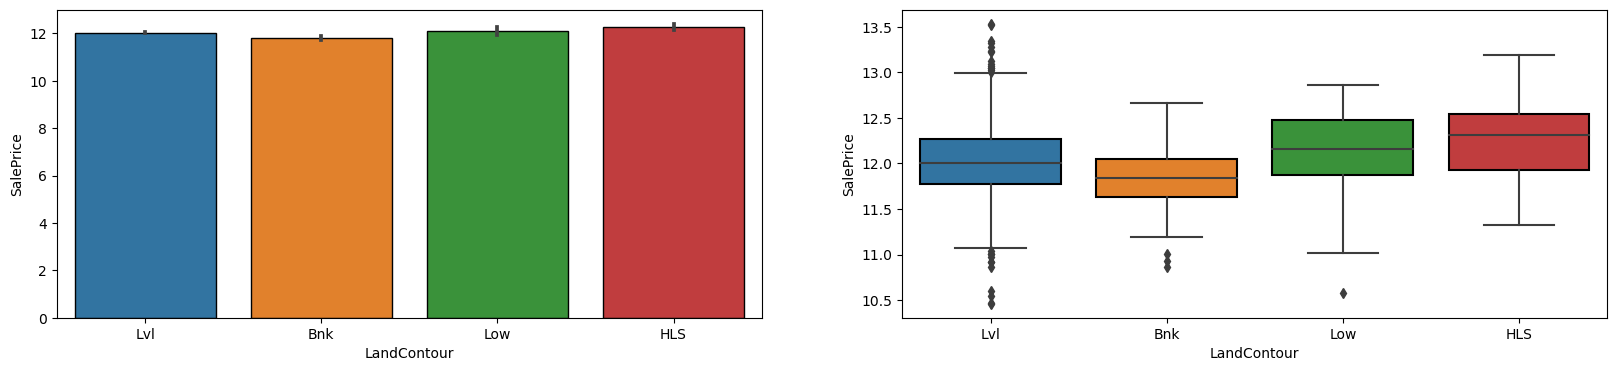


 Statistics for LotConfig vs Sales Price :

+-------------+----------+----------+---------+--------+
| LotConfig   |      sum |   median |   count |   %sum |
+=============+==========+==========+=========+========+
| Inside      | 12626    |    11.98 |    1052 |  71.92 |
+-------------+----------+----------+---------+--------+
| Corner      |  3163.22 |    11.98 |     263 |  18.02 |
+-------------+----------+----------+---------+--------+
| CulDSac     |  1151.48 |    12.2  |      94 |   6.56 |
+-------------+----------+----------+---------+--------+
| FR2         |   565.63 |    12.01 |      47 |   3.22 |
+-------------+----------+----------+---------+--------+
| FR3         |    48.78 |    12.18 |       4 |   0.28 |
+-------------+----------+----------+---------+--------+ 
 
Visualization for LotConfig vs Sales Price : 



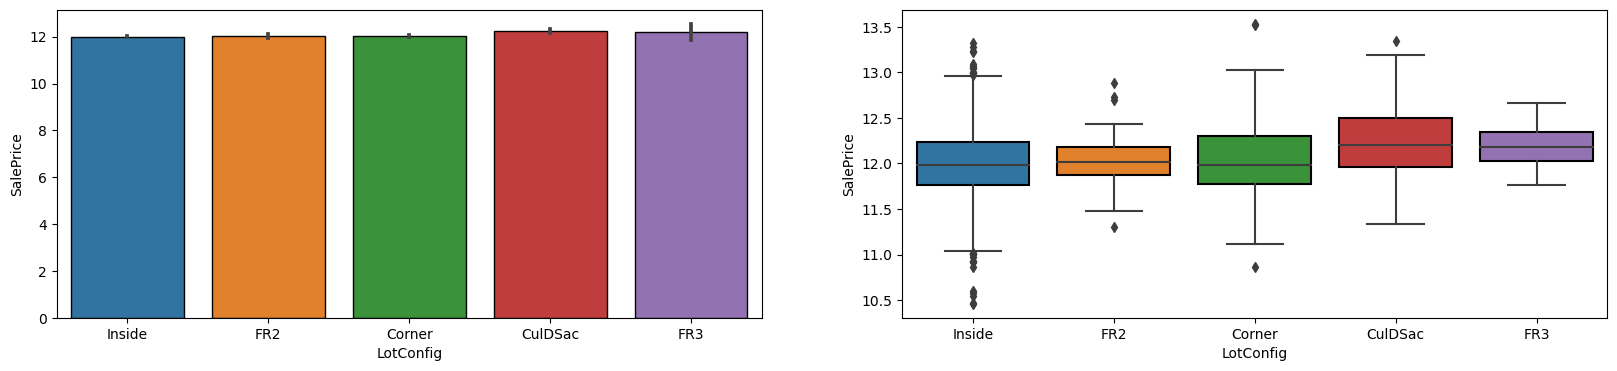


 Statistics for LandSlope vs Sales Price :

+-------------+---------+----------+---------+--------+
| LandSlope   |     sum |   median |   count |   %sum |
+=============+=========+==========+=========+========+
| Gtl         | 16612.4 |    11.99 |    1382 |  94.63 |
+-------------+---------+----------+---------+--------+
| Mod         |   785   |    12.14 |      65 |   4.47 |
+-------------+---------+----------+---------+--------+
| Sev         |   157.7 |    12.13 |      13 |   0.9  |
+-------------+---------+----------+---------+--------+ 
 
Visualization for LandSlope vs Sales Price : 



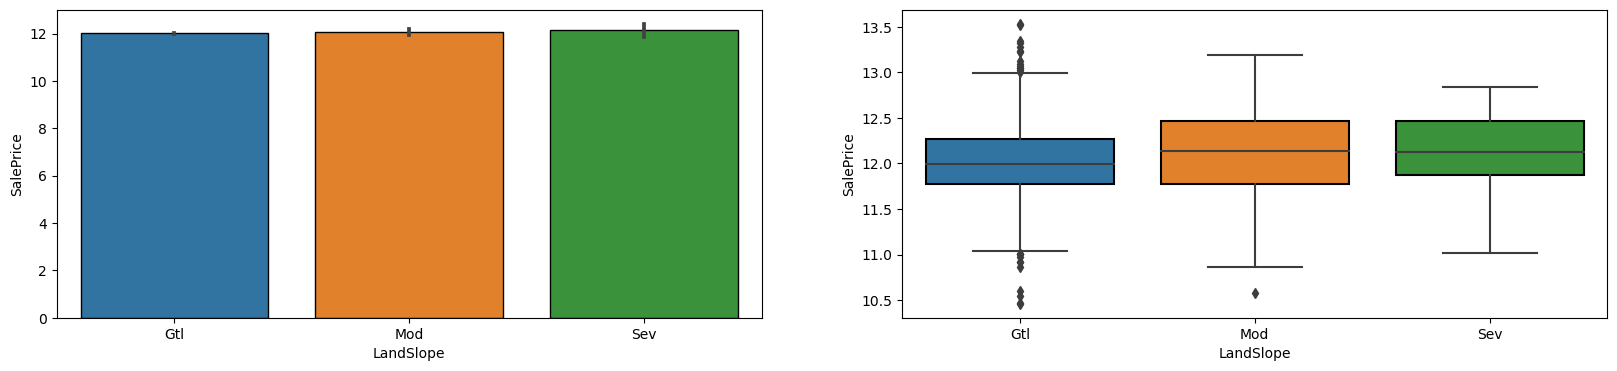


 Statistics for Neighborhood vs Sales Price :

+----------------+---------+----------+---------+--------+
| Neighborhood   |     sum |   median |   count |   %sum |
+================+=========+==========+=========+========+
| NAmes          | 2670.31 |    11.85 |     225 |  15.21 |
+----------------+---------+----------+---------+--------+
| CollgCr        | 1824.55 |    12.19 |     150 |  10.39 |
+----------------+---------+----------+---------+--------+
| OldTown        | 1322.54 |    11.69 |     113 |   7.53 |
+----------------+---------+----------+---------+--------+
| Edwards        | 1171.23 |    11.71 |     100 |   6.67 |
+----------------+---------+----------+---------+--------+
| Somerst        | 1057.5  |    12.33 |      86 |   6.02 |
+----------------+---------+----------+---------+--------+
| NridgHt        |  971.69 |    12.66 |      77 |   5.54 |
+----------------+---------+----------+---------+--------+
| Gilbert        |  960.31 |    12.11 |      79 |   5.47 |
+-------

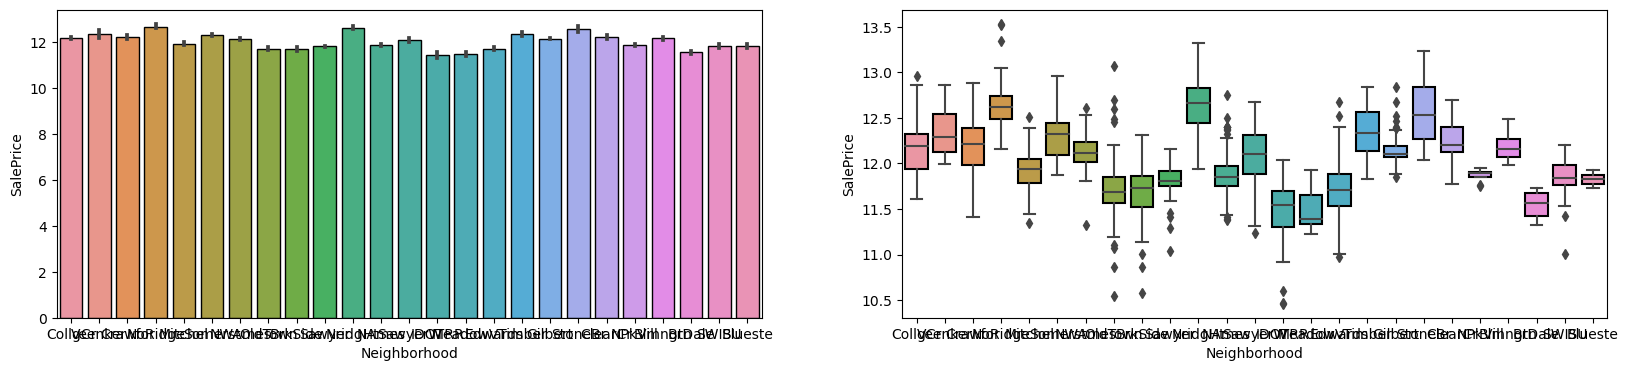


 Statistics for Condition1 vs Sales Price :

+--------------+----------+----------+---------+--------+
| Condition1   |      sum |   median |   count |   %sum |
+==============+==========+==========+=========+========+
| Norm         | 15174.1  |    12.02 |    1260 |  86.44 |
+--------------+----------+----------+---------+--------+
| Feedr        |   957.29 |    11.85 |      81 |   5.45 |
+--------------+----------+----------+---------+--------+
| Artery       |   563.6  |    11.69 |      48 |   3.21 |
+--------------+----------+----------+---------+--------+
| RRAn         |   313.92 |    12.05 |      26 |   1.79 |
+--------------+----------+----------+---------+--------+
| PosN         |   232.52 |    12.21 |      19 |   1.32 |
+--------------+----------+----------+---------+--------+
| RRAe         |   130.05 |    11.87 |      11 |   0.74 |
+--------------+----------+----------+---------+--------+
| PosA         |    98.45 |    12.26 |       8 |   0.56 |
+--------------+----------

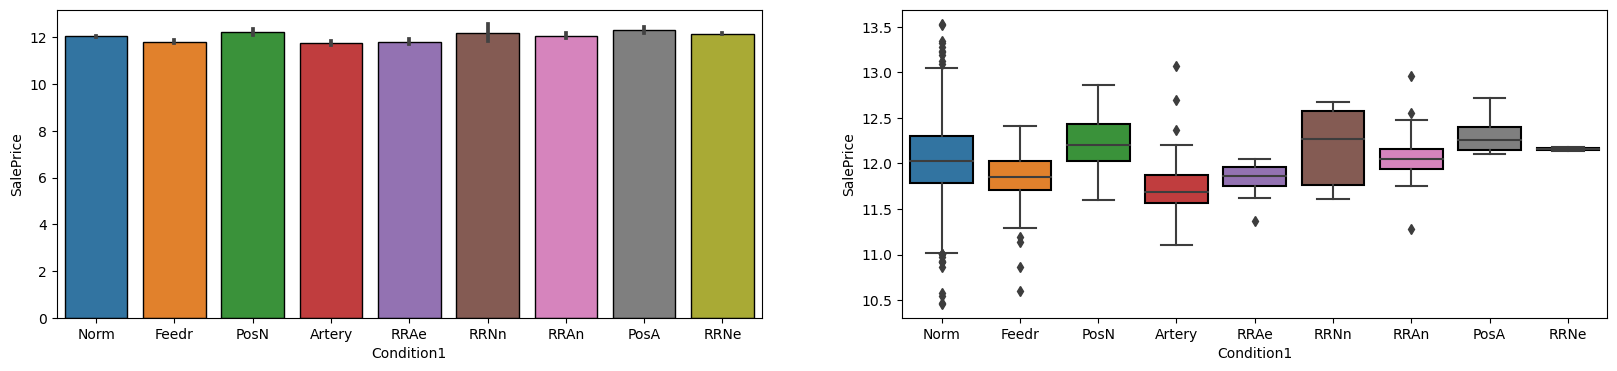


 Statistics for BldgType vs Sales Price :

+------------+----------+----------+---------+--------+
| BldgType   |      sum |   median |   count |   %sum |
+============+==========+==========+=========+========+
| 1Fam       | 14698    |    12.03 |    1220 |  83.72 |
+------------+----------+----------+---------+--------+
| TwnhsE     |  1374.78 |    12.06 |     114 |   7.83 |
+------------+----------+----------+---------+--------+
| Duplex     |   612.61 |    11.82 |      52 |   3.49 |
+------------+----------+----------+---------+--------+
| Twnhs      |   506.28 |    11.83 |      43 |   2.88 |
+------------+----------+----------+---------+--------+
| 2fmCon     |   363.49 |    11.76 |      31 |   2.07 |
+------------+----------+----------+---------+--------+ 
 
Visualization for BldgType vs Sales Price : 



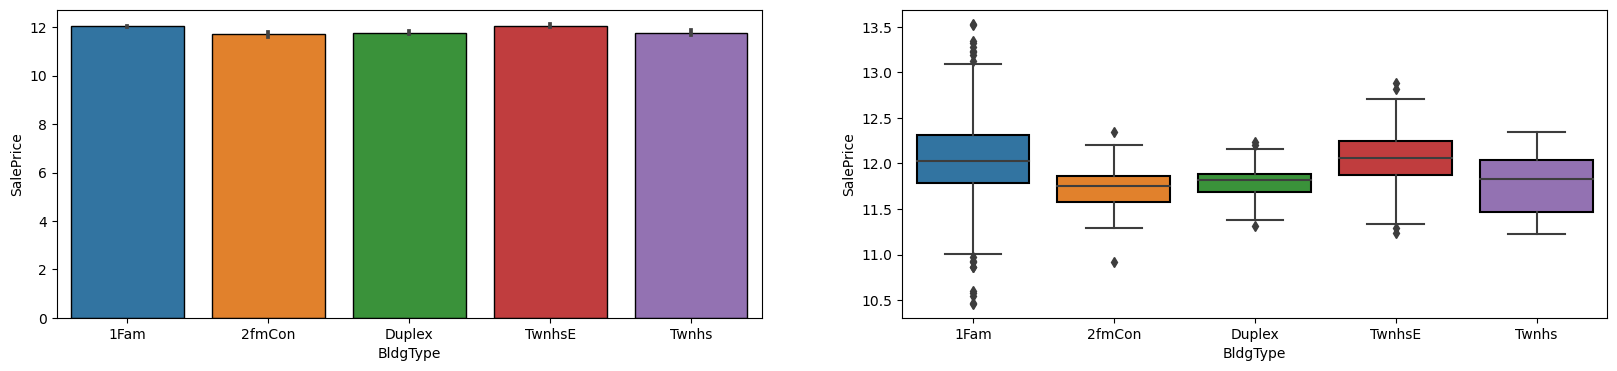


 Statistics for HouseStyle vs Sales Price :

+--------------+---------+----------+---------+--------+
| HouseStyle   |     sum |   median |   count |   %sum |
+==============+=========+==========+=========+========+
| 1Story       | 8707.41 |    11.95 |     726 |  49.6  |
+--------------+---------+----------+---------+--------+
| 2Story       | 5421.3  |    12.15 |     445 |  30.88 |
+--------------+---------+----------+---------+--------+
| 1.5Fin       | 1819.28 |    11.79 |     154 |  10.36 |
+--------------+---------+----------+---------+--------+
| SLvl         |  780.14 |    12.01 |      65 |   4.44 |
+--------------+---------+----------+---------+--------+
| SFoyer       |  436.1  |    11.82 |      37 |   2.48 |
+--------------+---------+----------+---------+--------+
| 1.5Unf       |  162.33 |    11.62 |      14 |   0.92 |
+--------------+---------+----------+---------+--------+
| 2.5Unf       |  131    |    11.8  |      11 |   0.75 |
+--------------+---------+----------+-----

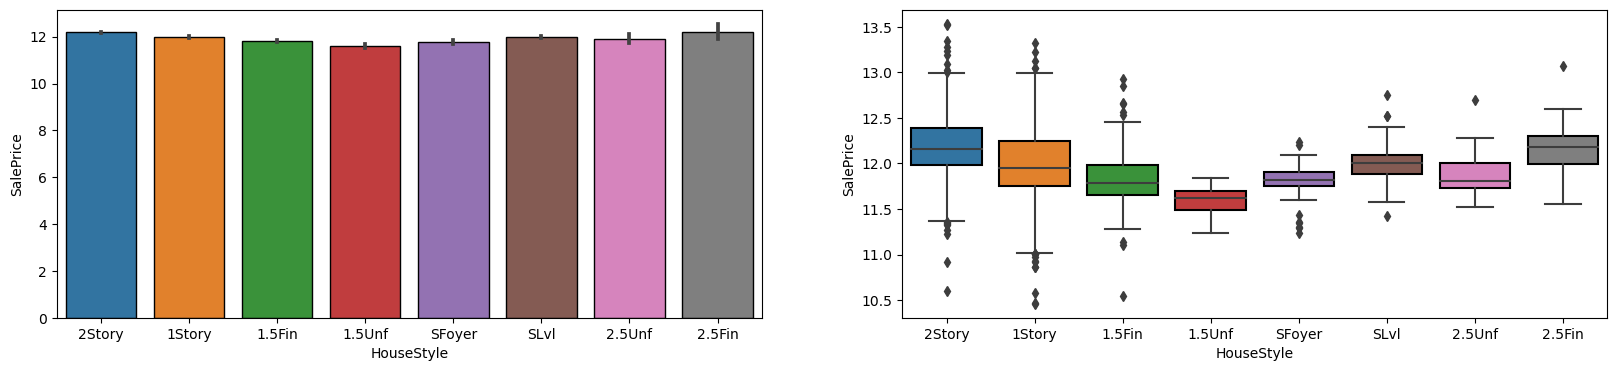


 Statistics for OverallQual vs Sales Price :

+----------------+---------+----------+---------+--------+
| OverallQual    |     sum |   median |   count |   %sum |
+================+=========+==========+=========+========+
| Average        | 4676.92 |    11.8  |     397 |  26.64 |
+----------------+---------+----------+---------+--------+
| Above Average  | 4475.77 |    11.98 |     374 |  25.5  |
+----------------+---------+----------+---------+--------+
| Good           | 3898.75 |    12.21 |     319 |  22.21 |
+----------------+---------+----------+---------+--------+
| Very Good      | 2099.53 |    12.51 |     168 |  11.96 |
+----------------+---------+----------+---------+--------+
| Below Average  | 1340.63 |    11.59 |     116 |   7.64 |
+----------------+---------+----------+---------+--------+
| Excellent      |  550.11 |    12.75 |      43 |   3.13 |
+----------------+---------+----------+---------+--------+
| Very Excellent |  232.58 |    12.98 |      18 |   1.32 |
+--------

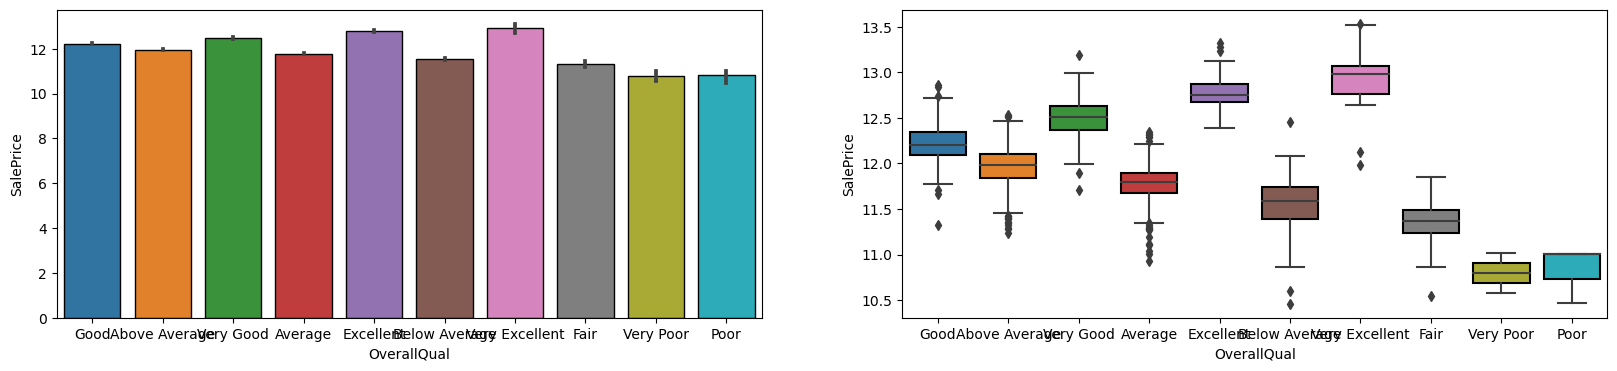


 Statistics for OverallCond vs Sales Price :

+---------------+---------+----------+---------+--------+
| OverallCond   |     sum |   median |   count |   %sum |
+===============+=========+==========+=========+========+
| Average       | 9970.37 |    12.13 |     821 |  56.79 |
+---------------+---------+----------+---------+--------+
| Above Average | 2996.29 |    11.87 |     252 |  17.07 |
+---------------+---------+----------+---------+--------+
| Good          | 2443.88 |    11.88 |     205 |  13.92 |
+---------------+---------+----------+---------+--------+
| Very Good     |  857.48 |    11.87 |      72 |   4.88 |
+---------------+---------+----------+---------+--------+
| Below Average |  663.78 |    11.65 |      57 |   3.78 |
+---------------+---------+----------+---------+--------+
| Fair          |  285.96 |    11.4  |      25 |   1.63 |
+---------------+---------+----------+---------+--------+
| Excellent     |  268.38 |    12.08 |      22 |   1.53 |
+---------------+--------

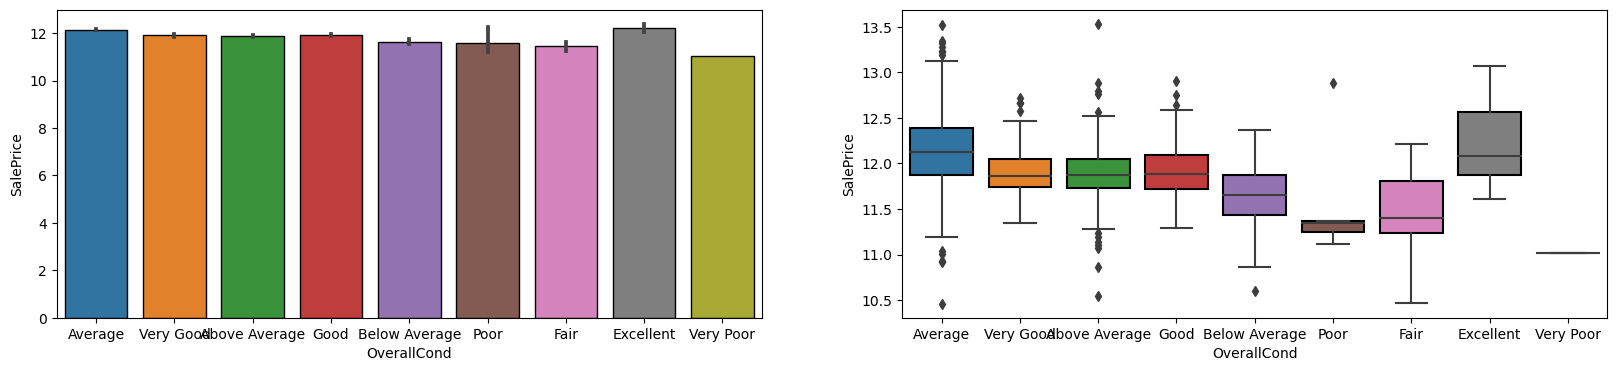


 Statistics for RoofStyle vs Sales Price :

+-------------+----------+----------+---------+--------+
| RoofStyle   |      sum |   median |   count |   %sum |
+=============+==========+==========+=========+========+
| Gable       | 13674    |    11.98 |    1141 |  77.89 |
+-------------+----------+----------+---------+--------+
| Hip         |  3484.75 |    12.08 |     286 |  19.85 |
+-------------+----------+----------+---------+--------+
| Flat        |   157.6  |    12.13 |      13 |   0.9  |
+-------------+----------+----------+---------+--------+
| Gambrel     |   129.77 |    11.84 |      11 |   0.74 |
+-------------+----------+----------+---------+--------+
| Mansard     |    84.4  |    12.07 |       7 |   0.48 |
+-------------+----------+----------+---------+--------+
| Shed        |    24.62 |    12.31 |       2 |   0.14 |
+-------------+----------+----------+---------+--------+ 
 
Visualization for RoofStyle vs Sales Price : 



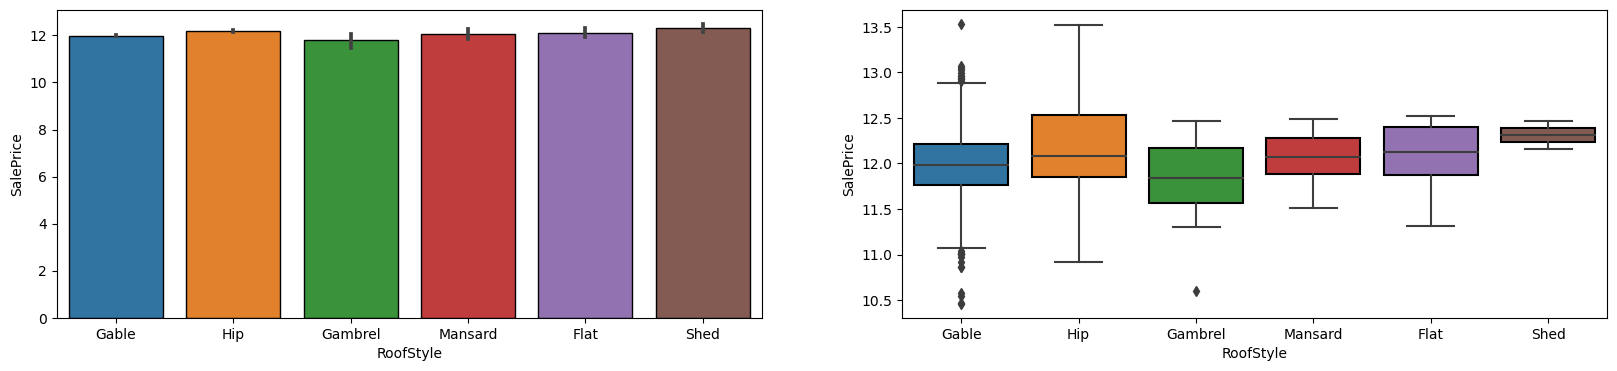


 Statistics for Exterior1st vs Sales Price :

+---------------+---------+----------+---------+--------+
| Exterior1st   |     sum |   median |   count |   %sum |
+===============+=========+==========+=========+========+
| VinylSd       | 6286.02 |    12.21 |     515 |  35.81 |
+---------------+---------+----------+---------+--------+
| HdBoard       | 2653.32 |    11.92 |     222 |  15.11 |
+---------------+---------+----------+---------+--------+
| MetalSd       | 2609.15 |    11.84 |     220 |  14.86 |
+---------------+---------+----------+---------+--------+
| Wd Sdng       | 2438.73 |    11.84 |     206 |  13.89 |
+---------------+---------+----------+---------+--------+
| Plywood       | 1300.45 |    12.03 |     108 |   7.41 |
+---------------+---------+----------+---------+--------+
| CemntBd       |  744.5  |    12.37 |      61 |   4.24 |
+---------------+---------+----------+---------+--------+
| BrkFace       |  604.41 |    12.02 |      50 |   3.44 |
+---------------+--------

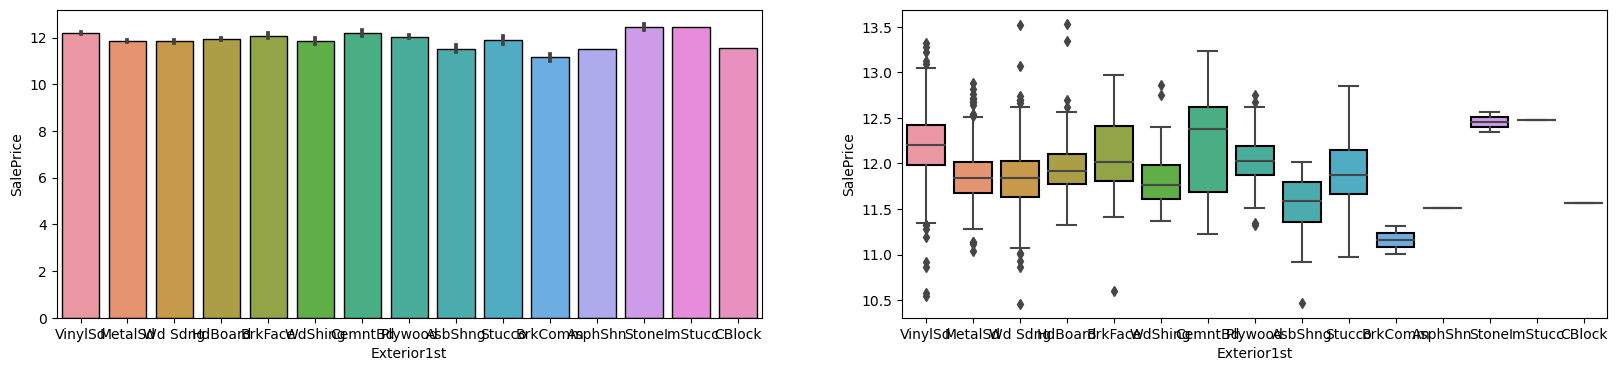


 Statistics for Exterior2nd vs Sales Price :

+---------------+---------+----------+---------+--------+
| Exterior2nd   |     sum |   median |   count |   %sum |
+===============+=========+==========+=========+========+
| VinylSd       | 6153.65 |    12.21 |     504 |  35.05 |
+---------------+---------+----------+---------+--------+
| MetalSd       | 2538.53 |    11.84 |     214 |  14.46 |
+---------------+---------+----------+---------+--------+
| HdBoard       | 2478.81 |    11.95 |     207 |  14.12 |
+---------------+---------+----------+---------+--------+
| Wd Sdng       | 2332.18 |    11.84 |     197 |  13.28 |
+---------------+---------+----------+---------+--------+
| Plywood       | 1703.25 |    11.99 |     142 |   9.7  |
+---------------+---------+----------+---------+--------+
| CmentBd       |  732.12 |    12.38 |      60 |   4.17 |
+---------------+---------+----------+---------+--------+
| Wd Shng       |  451.91 |    11.84 |      38 |   2.57 |
+---------------+--------

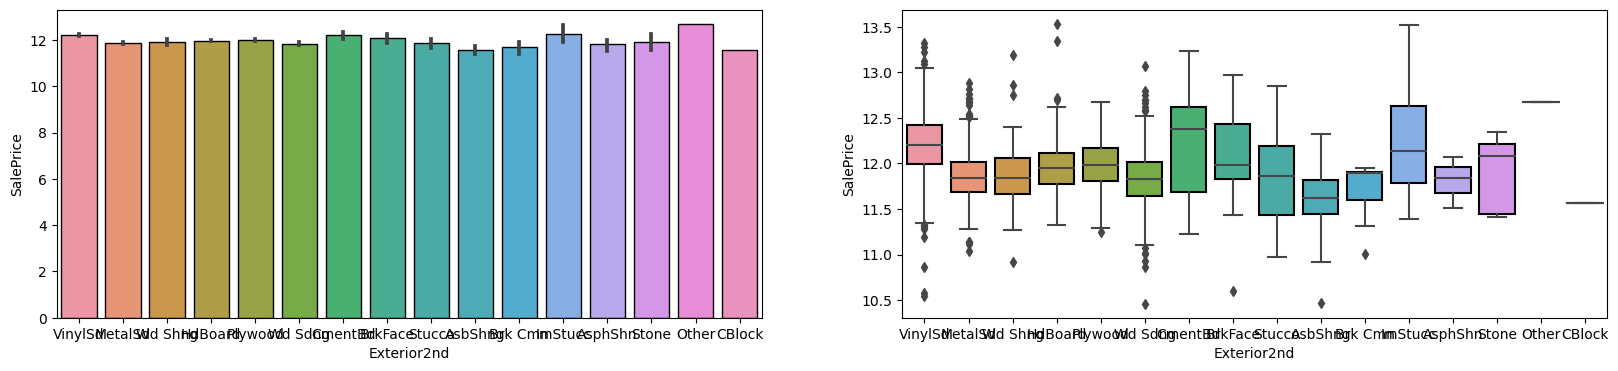


 Statistics for MasVnrType vs Sales Price :

+--------------+----------+----------+---------+--------+
| MasVnrType   |      sum |   median |   count |   %sum |
+==============+==========+==========+=========+========+
| None         | 10374.1  |    11.87 |     872 |  59.09 |
+--------------+----------+----------+---------+--------+
| BrkFace      |  5412.82 |    12.11 |     445 |  30.83 |
+--------------+----------+----------+---------+--------+
| Stone        |  1590.42 |    12.42 |     128 |   9.06 |
+--------------+----------+----------+---------+--------+
| BrkCmn       |   177.8  |    11.84 |      15 |   1.01 |
+--------------+----------+----------+---------+--------+ 
 
Visualization for MasVnrType vs Sales Price : 



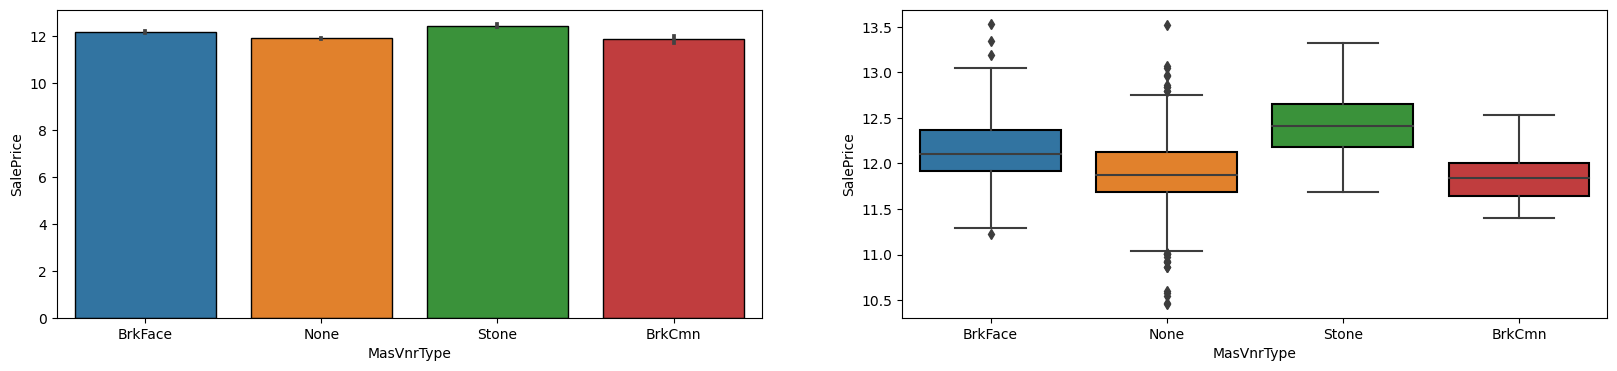


 Statistics for ExterQual vs Sales Price :

+-------------+----------+----------+---------+--------+
| ExterQual   |      sum |   median |   count |   %sum |
+=============+==========+==========+=========+========+
| TA          | 10725.2  |    11.85 |     906 |  61.09 |
+-------------+----------+----------+---------+--------+
| Gd          |  6007.91 |    12.3  |     488 |  34.22 |
+-------------+----------+----------+---------+--------+
| Ex          |   663.73 |    12.81 |      52 |   3.78 |
+-------------+----------+----------+---------+--------+
| Fa          |   158.26 |    11.32 |      14 |   0.9  |
+-------------+----------+----------+---------+--------+ 
 
Visualization for ExterQual vs Sales Price : 



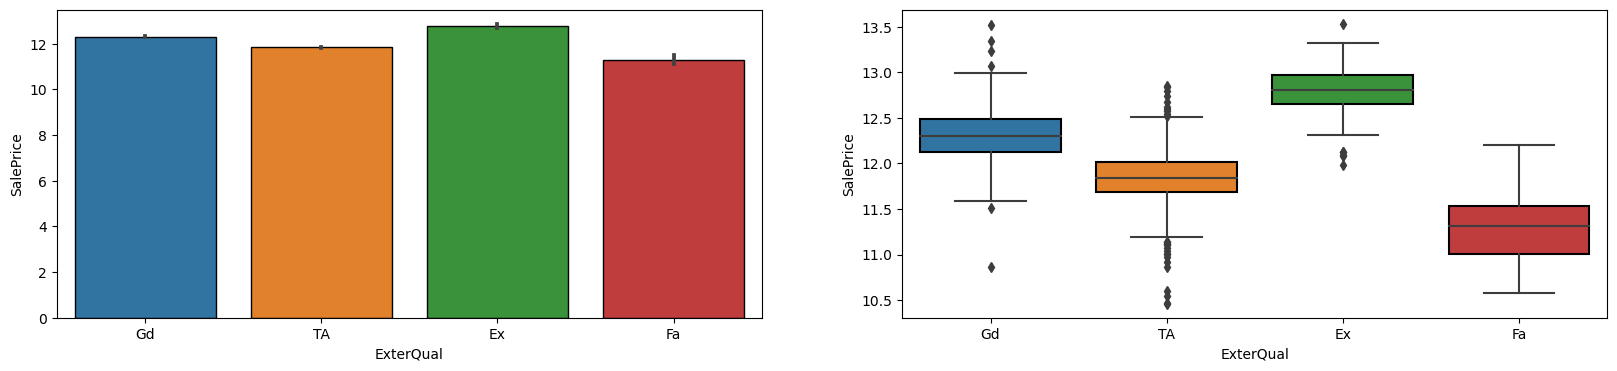


 Statistics for ExterCond vs Sales Price :

+-------------+----------+----------+---------+--------+
| ExterCond   |      sum |   median |   count |   %sum |
+=============+==========+==========+=========+========+
| TA          | 15439.2  |    12.03 |    1282 |  87.95 |
+-------------+----------+----------+---------+--------+
| Gd          |  1747.54 |    11.93 |     146 |   9.95 |
+-------------+----------+----------+---------+--------+
| Fa          |   320.74 |    11.47 |      28 |   1.83 |
+-------------+----------+----------+---------+--------+
| Ex          |    36.36 |    11.99 |       3 |   0.21 |
+-------------+----------+----------+---------+--------+
| Po          |    11.25 |    11.25 |       1 |   0.06 |
+-------------+----------+----------+---------+--------+ 
 
Visualization for ExterCond vs Sales Price : 



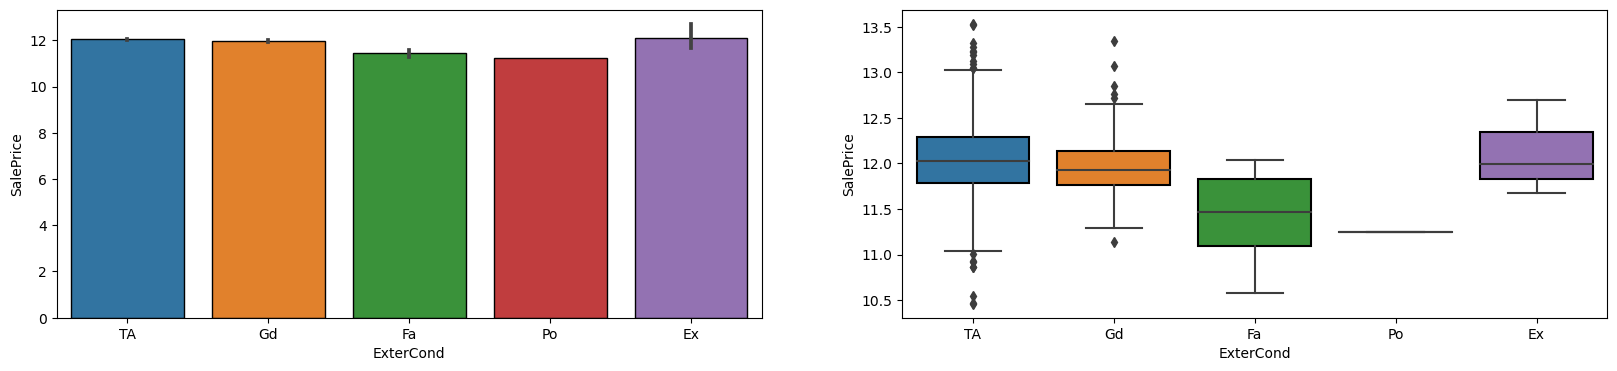


 Statistics for Foundation vs Sales Price :

+--------------+---------+----------+---------+--------+
| Foundation   |     sum |   median |   count |   %sum |
+==============+=========+==========+=========+========+
| PConc        | 7933.3  |    12.23 |     647 |  45.19 |
+--------------+---------+----------+---------+--------+
| CBlock       | 7525.63 |    11.86 |     634 |  42.87 |
+--------------+---------+----------+---------+--------+
| BrkTil       | 1711.49 |    11.74 |     146 |   9.75 |
+--------------+---------+----------+---------+--------+
| Slab         |  276.79 |    11.55 |      24 |   1.58 |
+--------------+---------+----------+---------+--------+
| Stone        |   71.6  |    11.74 |       6 |   0.41 |
+--------------+---------+----------+---------+--------+
| Wood         |   36.31 |    12.01 |       3 |   0.21 |
+--------------+---------+----------+---------+--------+ 
 
Visualization for Foundation vs Sales Price : 



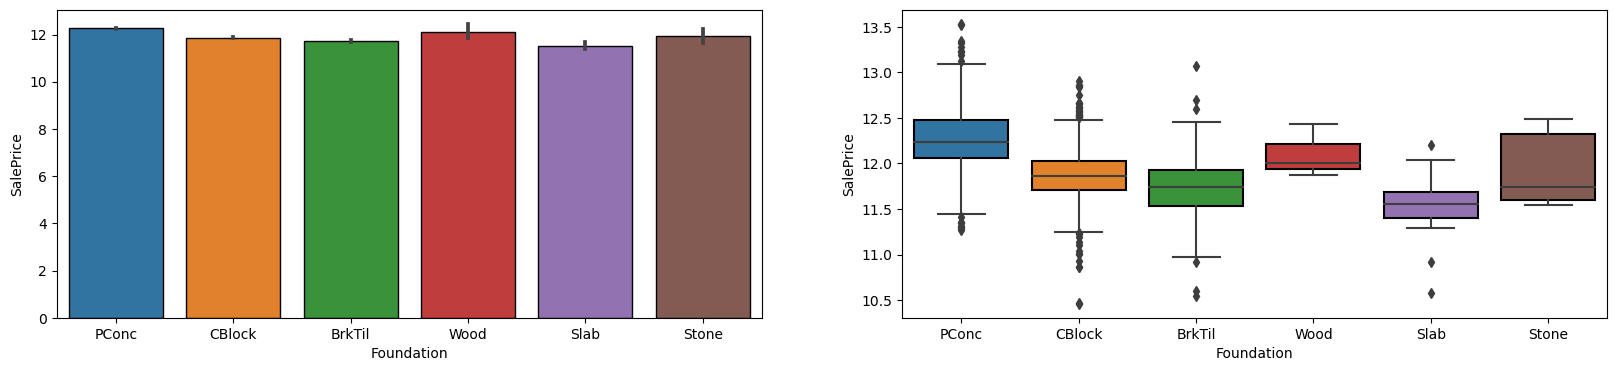


 Statistics for BsmtQual vs Sales Price :

+-------------+---------+----------+---------+--------+
| BsmtQual    |     sum |   median |   count |   %sum |
+=============+=========+==========+=========+========+
| TA          | 7665.25 |    11.82 |     649 |  43.66 |
+-------------+---------+----------+---------+--------+
| Gd          | 7527.17 |    12.17 |     618 |  42.88 |
+-------------+---------+----------+---------+--------+
| Ex          | 1529.49 |    12.67 |     121 |   8.71 |
+-------------+---------+----------+---------+--------+
| No Basement |  426.6  |    11.53 |      37 |   2.43 |
+-------------+---------+----------+---------+--------+
| Fa          |  406.62 |    11.63 |      35 |   2.32 |
+-------------+---------+----------+---------+--------+ 
 
Visualization for BsmtQual vs Sales Price : 



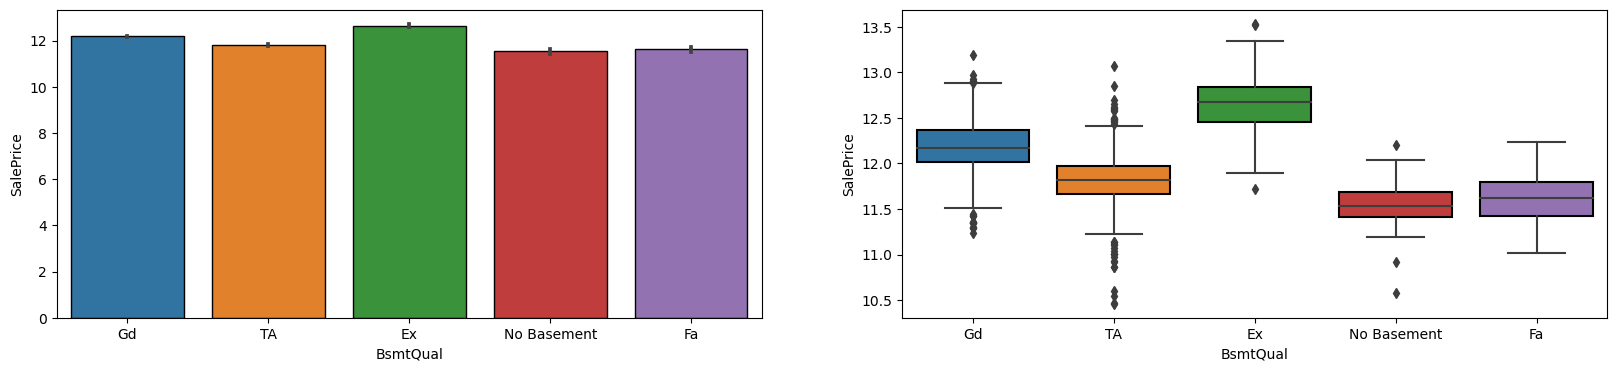


 Statistics for BsmtCond vs Sales Price :

+-------------+----------+----------+---------+--------+
| BsmtCond    |      sum |   median |   count |   %sum |
+=============+==========+==========+=========+========+
| TA          | 15787.9  |    12.01 |    1311 |  89.93 |
+-------------+----------+----------+---------+--------+
| Gd          |   794.32 |    12.17 |      65 |   4.52 |
+-------------+----------+----------+---------+--------+
| Fa          |   524.2  |    11.68 |      45 |   2.99 |
+-------------+----------+----------+---------+--------+
| No Basement |   426.6  |    11.53 |      37 |   2.43 |
+-------------+----------+----------+---------+--------+
| Po          |    22.13 |    11.07 |       2 |   0.13 |
+-------------+----------+----------+---------+--------+ 
 
Visualization for BsmtCond vs Sales Price : 



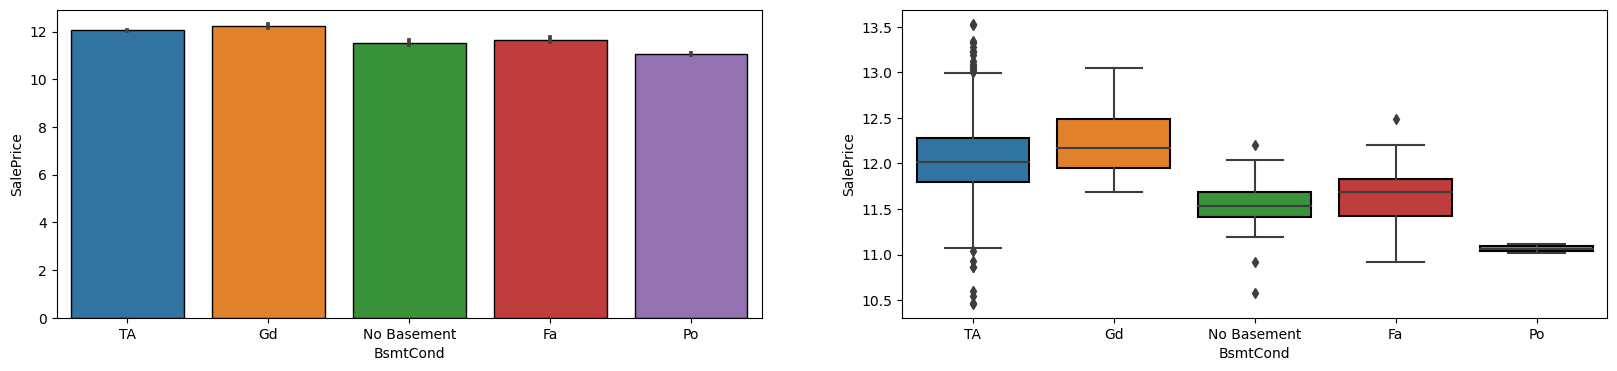


 Statistics for BsmtExposure vs Sales Price :

+----------------+----------+----------+---------+--------+
| BsmtExposure   |      sum |   median |   count |   %sum |
+================+==========+==========+=========+========+
| No             | 11393.7  |    11.94 |     953 |  64.9  |
+----------------+----------+----------+---------+--------+
| Av             |  2686.98 |    12.13 |     221 |  15.31 |
+----------------+----------+----------+---------+--------+
| Gd             |  1656.82 |    12.33 |     134 |   9.44 |
+----------------+----------+----------+---------+--------+
| Mn             |  1378.81 |    12.11 |     114 |   7.85 |
+----------------+----------+----------+---------+--------+
| No Basement    |   438.77 |    11.55 |      38 |   2.5  |
+----------------+----------+----------+---------+--------+ 
 
Visualization for BsmtExposure vs Sales Price : 



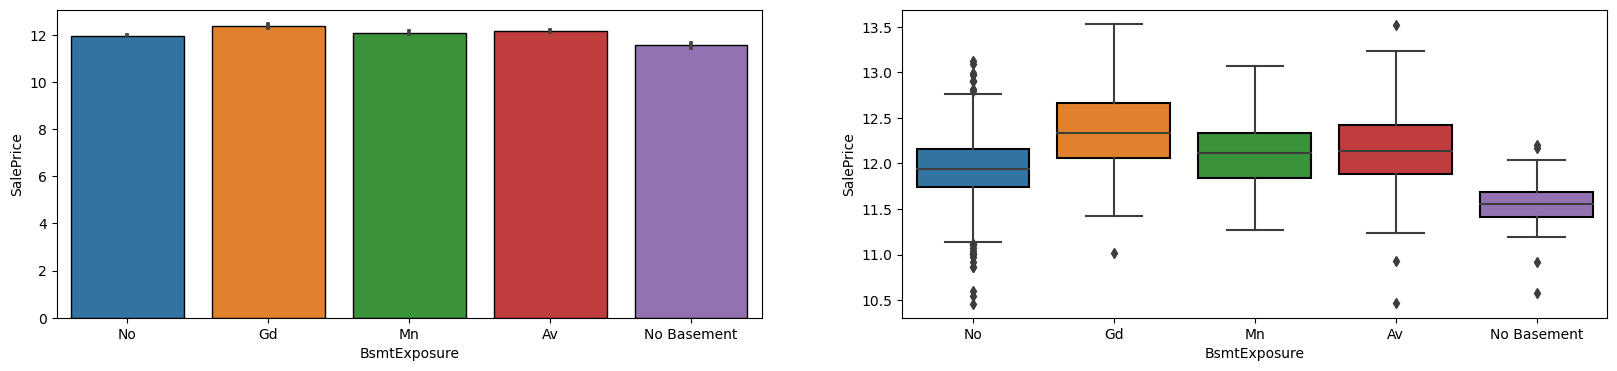


 Statistics for BsmtFinType1 vs Sales Price :

+----------------+---------+----------+---------+--------+
| BsmtFinType1   |     sum |   median |   count |   %sum |
+================+=========+==========+=========+========+
| Unf            | 5144.52 |    11.99 |     430 |  29.3  |
+----------------+---------+----------+---------+--------+
| GLQ            | 5142.21 |    12.27 |     418 |  29.29 |
+----------------+---------+----------+---------+--------+
| ALQ            | 2629.73 |    11.91 |     220 |  14.98 |
+----------------+---------+----------+---------+--------+
| BLQ            | 1756.41 |    11.84 |     148 |  10.01 |
+----------------+---------+----------+---------+--------+
| Rec            | 1576.43 |    11.86 |     133 |   8.98 |
+----------------+---------+----------+---------+--------+
| LwQ            |  879.22 |    11.84 |      74 |   5.01 |
+----------------+---------+----------+---------+--------+
| No Basement    |  426.6  |    11.53 |      37 |   2.43 |
+-------

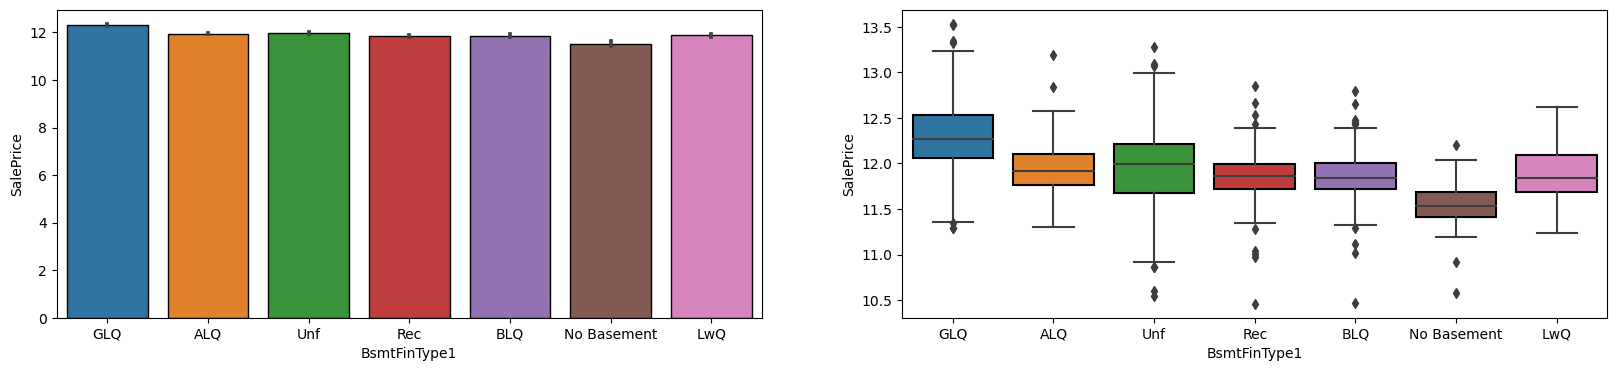


 Statistics for BsmtFinType2 vs Sales Price :

+----------------+----------+----------+---------+--------+
| BsmtFinType2   |      sum |   median |   count |   %sum |
+================+==========+==========+=========+========+
| Unf            | 15126.9  |    12.03 |    1256 |  86.17 |
+----------------+----------+----------+---------+--------+
| Rec            |   646.09 |    11.91 |      54 |   3.68 |
+----------------+----------+----------+---------+--------+
| LwQ            |   550.98 |    11.94 |      46 |   3.14 |
+----------------+----------+----------+---------+--------+
| No Basement    |   439.15 |    11.55 |      38 |   2.5  |
+----------------+----------+----------+---------+--------+
| BLQ            |   392.31 |    11.87 |      33 |   2.23 |
+----------------+----------+----------+---------+--------+
| ALQ            |   231.17 |    12.07 |      19 |   1.32 |
+----------------+----------+----------+---------+--------+
| GLQ            |   168.47 |    12.22 |      14 |  

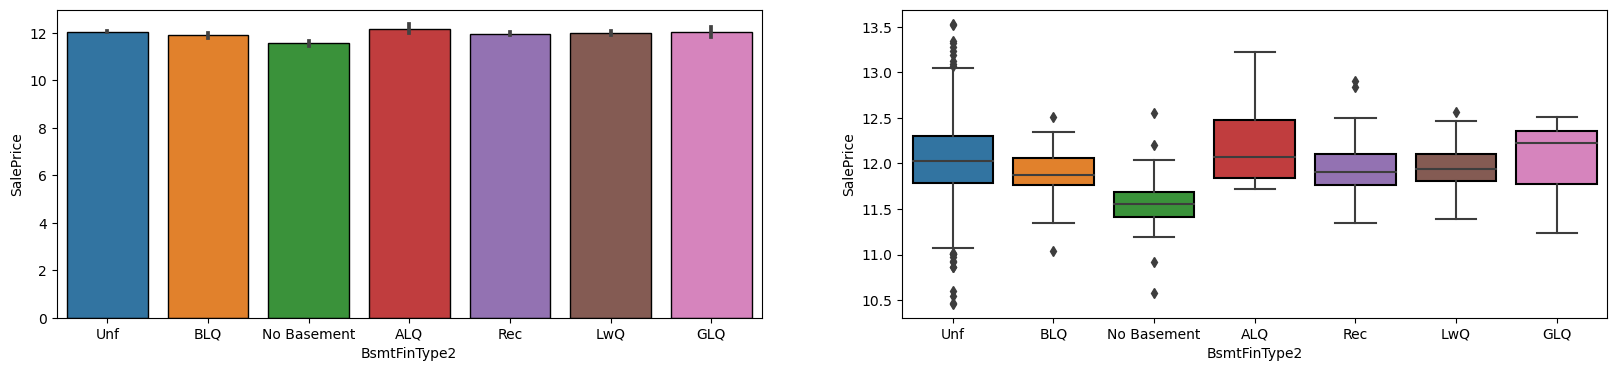


 Statistics for Heating vs Sales Price :

+-----------+----------+----------+---------+--------+
| Heating   |      sum |   median |   count |   %sum |
+===========+==========+==========+=========+========+
| GasA      | 17181.8  |    12.01 |    1428 |  97.87 |
+-----------+----------+----------+---------+--------+
| GasW      |   214.75 |    11.81 |      18 |   1.22 |
+-----------+----------+----------+---------+--------+
| Grav      |    78.16 |    11.28 |       7 |   0.45 |
+-----------+----------+----------+---------+--------+
| Wall      |    45.72 |    11.42 |       4 |   0.26 |
+-----------+----------+----------+---------+--------+
| OthW      |    23.48 |    11.74 |       2 |   0.13 |
+-----------+----------+----------+---------+--------+
| Floor     |    11.19 |    11.19 |       1 |   0.06 |
+-----------+----------+----------+---------+--------+ 
 
Visualization for Heating vs Sales Price : 



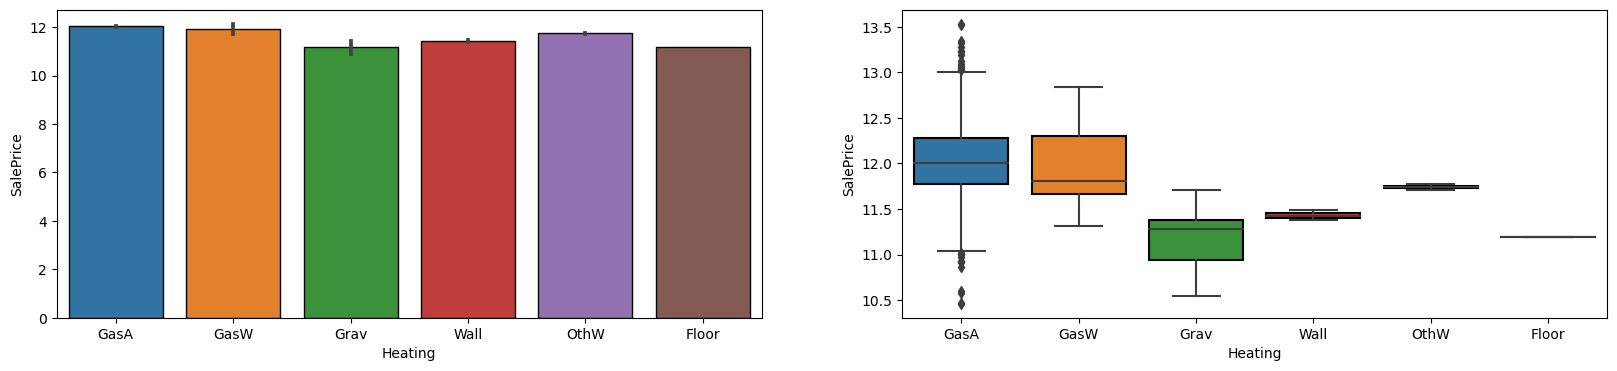


 Statistics for HeatingQC vs Sales Price :

+-------------+---------+----------+---------+--------+
| HeatingQC   |     sum |   median |   count |   %sum |
+=============+=========+==========+=========+========+
| Ex          | 9045.85 |    12.18 |     741 |  51.53 |
+-------------+---------+----------+---------+--------+
| TA          | 5057.28 |    11.81 |     428 |  28.81 |
+-------------+---------+----------+---------+--------+
| Gd          | 2870.4  |    11.93 |     241 |  16.35 |
+-------------+---------+----------+---------+--------+
| Fa          |  570.21 |    11.72 |      49 |   3.25 |
+-------------+---------+----------+---------+--------+
| Po          |   11.37 |    11.37 |       1 |   0.06 |
+-------------+---------+----------+---------+--------+ 
 
Visualization for HeatingQC vs Sales Price : 



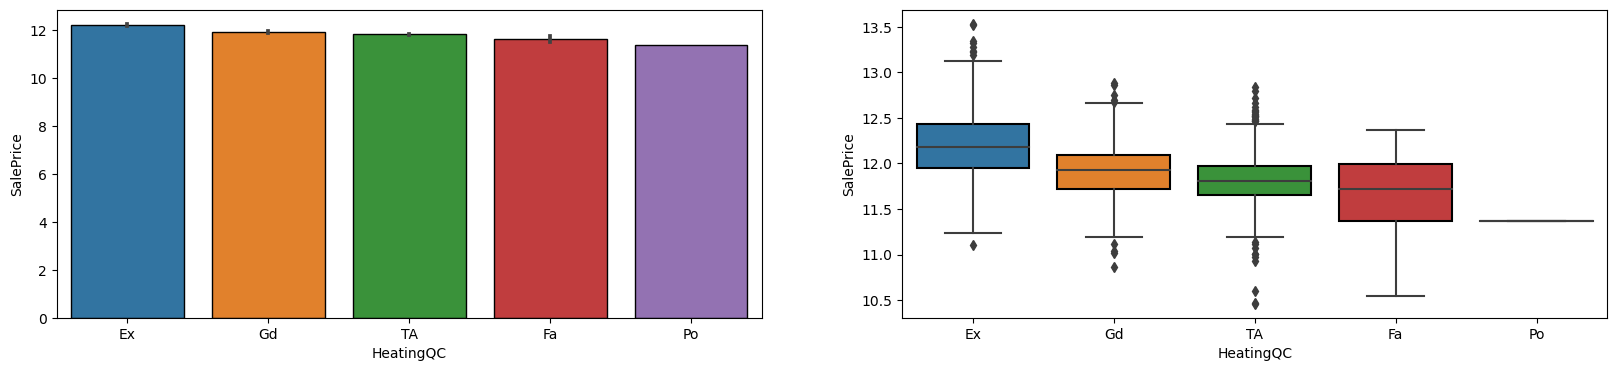


 Statistics for CentralAir vs Sales Price :

+--------------+----------+----------+---------+--------+
| CentralAir   |      sum |   median |   count |   %sum |
+==============+==========+==========+=========+========+
| Y            | 16463.4  |    12.03 |    1365 |  93.78 |
+--------------+----------+----------+---------+--------+
| N            |  1091.73 |    11.49 |      95 |   6.22 |
+--------------+----------+----------+---------+--------+ 
 
Visualization for CentralAir vs Sales Price : 



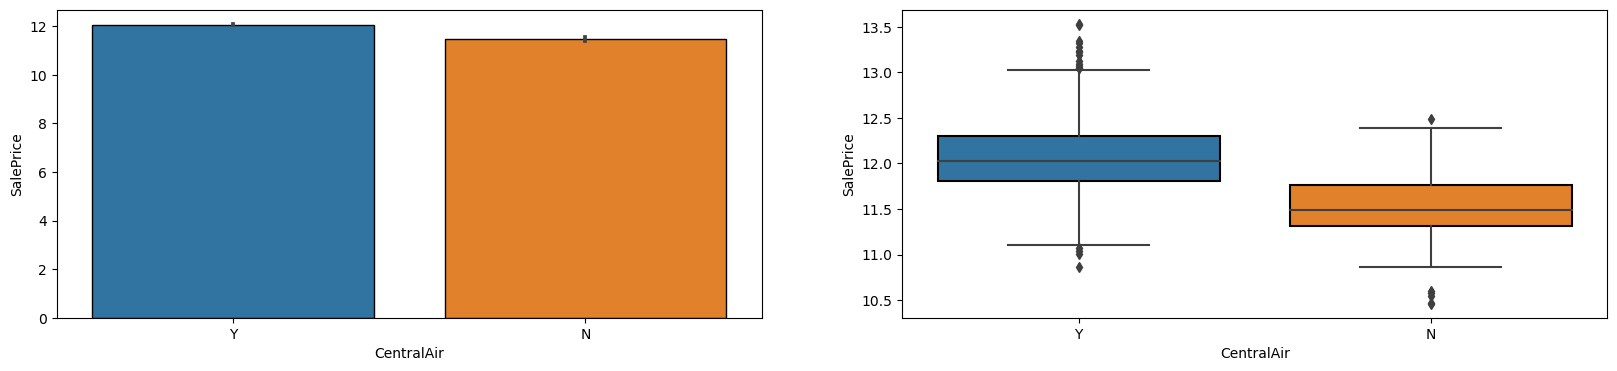


 Statistics for Electrical vs Sales Price :

+---------------------------------+----------+----------+---------+--------+
| Electrical                      |      sum |   median |   count |   %sum |
+=================================+==========+==========+=========+========+
| SBrkr                           | 16090    |    12.04 |    1334 |  91.65 |
+---------------------------------+----------+----------+---------+--------+
| FuseA                           |  1096.07 |    11.71 |      94 |   6.24 |
+---------------------------------+----------+----------+---------+--------+
| FuseF                           |   311.57 |    11.65 |      27 |   1.77 |
+---------------------------------+----------+----------+---------+--------+
| FuseP                           |    34.34 |    11.31 |       3 |   0.2  |
+---------------------------------+----------+----------+---------+--------+
| 0    SBrkr                      |    12.03 |    12.03 |       1 |   0.07 |
| Name: Electrical, dtype: obj

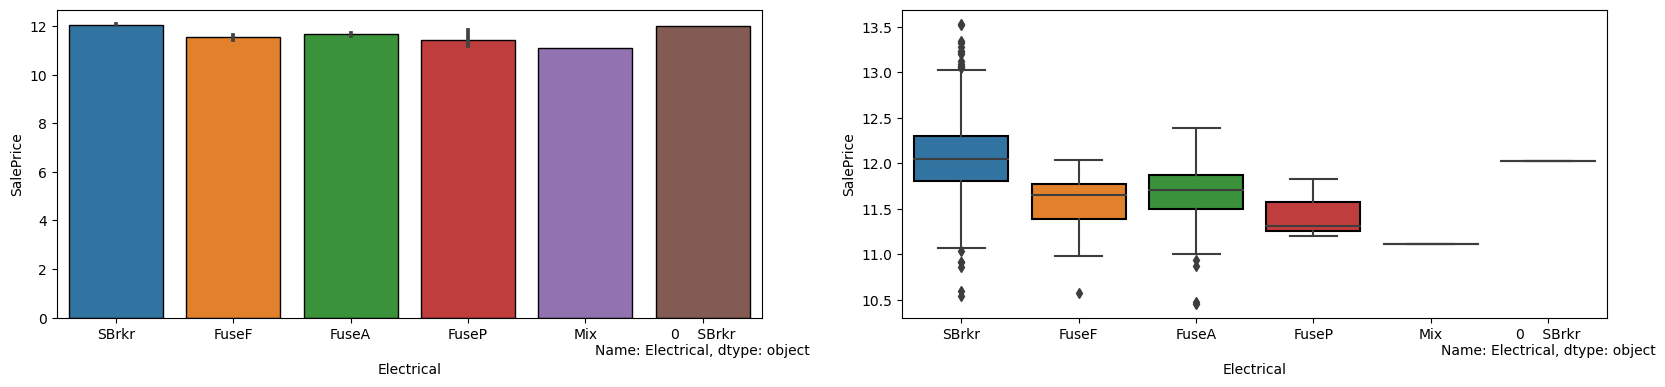


 Statistics for KitchenQual vs Sales Price :

+---------------+---------+----------+---------+--------+
| KitchenQual   |     sum |   median |   count |   %sum |
+===============+=========+==========+=========+========+
| TA            | 8680.78 |    11.83 |     735 |  49.45 |
+---------------+---------+----------+---------+--------+
| Gd            | 7162.29 |    12.21 |     586 |  40.8  |
+---------------+---------+----------+---------+--------+
| Ex            | 1263.36 |    12.67 |     100 |   7.2  |
+---------------+---------+----------+---------+--------+
| Fa            |  448.68 |    11.65 |      39 |   2.56 |
+---------------+---------+----------+---------+--------+ 
 
Visualization for KitchenQual vs Sales Price : 



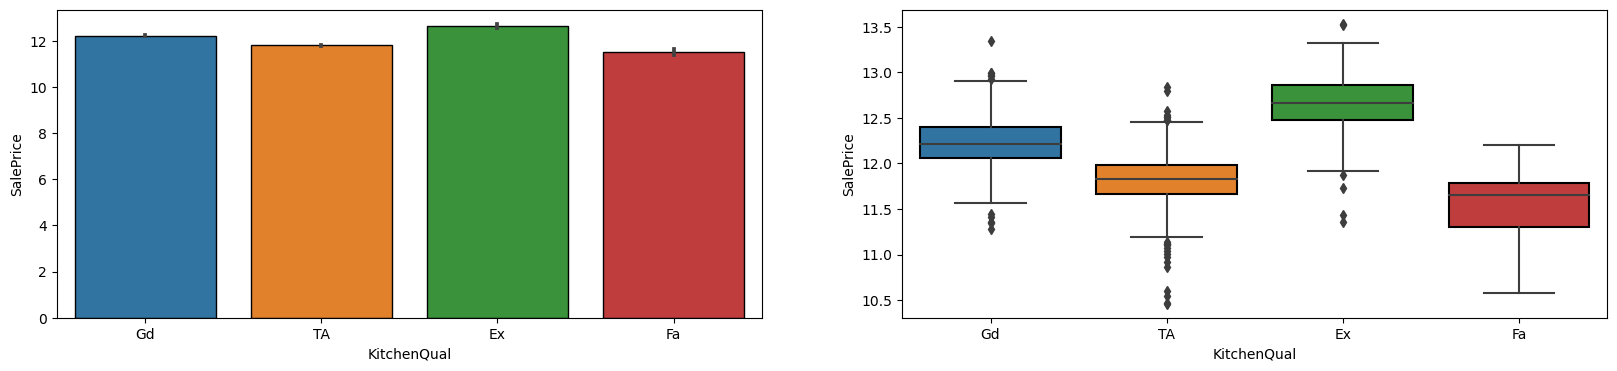


 Statistics for Functional vs Sales Price :

+--------------+----------+----------+---------+--------+
| Functional   |      sum |   median |   count |   %sum |
+==============+==========+==========+=========+========+
| Typ          | 16372.4  |    12.02 |    1360 |  93.26 |
+--------------+----------+----------+---------+--------+
| Min2         |   402.75 |    11.85 |      34 |   2.29 |
+--------------+----------+----------+---------+--------+
| Min1         |   367.73 |    11.84 |      31 |   2.09 |
+--------------+----------+----------+---------+--------+
| Mod          |   177.88 |    11.83 |      15 |   1.01 |
+--------------+----------+----------+---------+--------+
| Maj1         |   166.03 |    11.85 |      14 |   0.95 |
+--------------+----------+----------+---------+--------+
| Maj2         |    56.58 |    11.35 |       5 |   0.32 |
+--------------+----------+----------+---------+--------+
| Sev          |    11.77 |    11.77 |       1 |   0.07 |
+--------------+----------

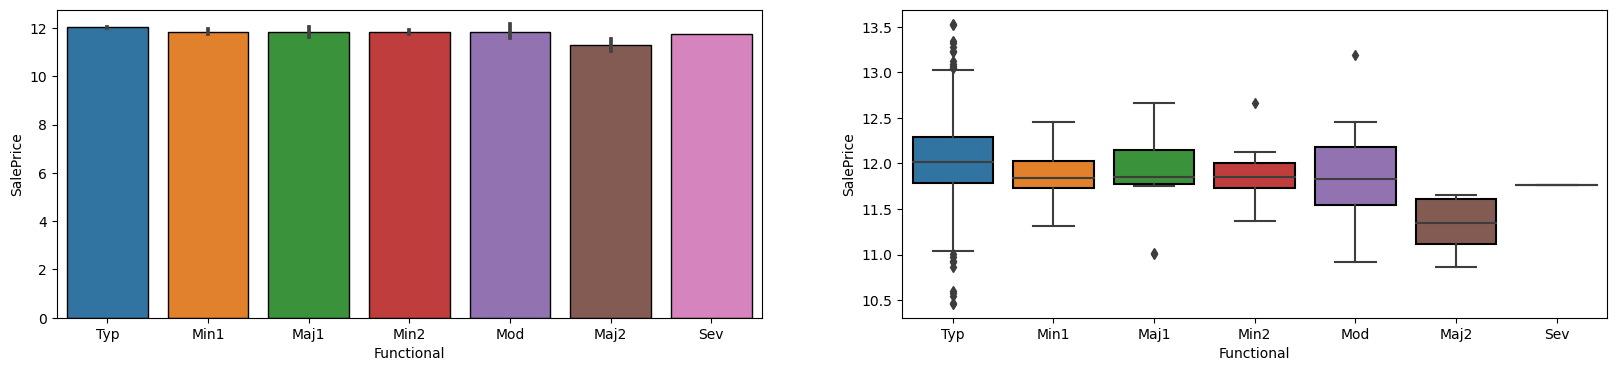


 Statistics for FireplaceQu vs Sales Price :

+---------------+---------+----------+---------+--------+
| FireplaceQu   |     sum |   median |   count |   %sum |
+===============+=========+==========+=========+========+
| No Fireplace  | 8148.15 |    11.81 |     690 |  46.41 |
+---------------+---------+----------+---------+--------+
| Gd            | 4657.48 |    12.24 |     380 |  26.53 |
+---------------+---------+----------+---------+--------+
| TA            | 3814.35 |    12.14 |     313 |  21.73 |
+---------------+---------+----------+---------+--------+
| Fa            |  396.28 |    11.97 |      33 |   2.26 |
+---------------+---------+----------+---------+--------+
| Ex            |  304.08 |    12.66 |      24 |   1.73 |
+---------------+---------+----------+---------+--------+
| Po            |  234.78 |    11.79 |      20 |   1.34 |
+---------------+---------+----------+---------+--------+ 
 
Visualization for FireplaceQu vs Sales Price : 



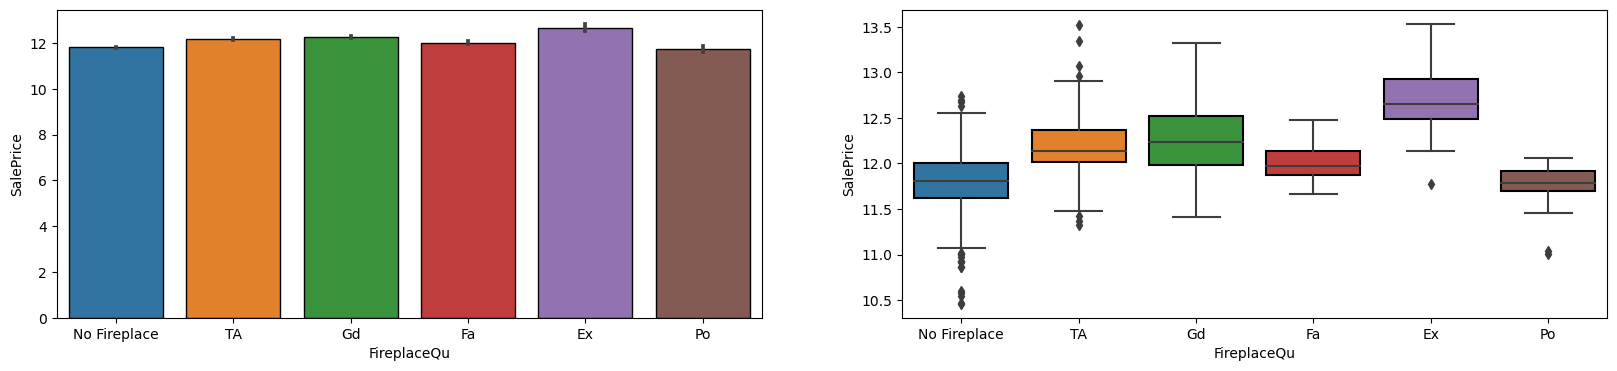


 Statistics for GarageType vs Sales Price :

+--------------+----------+----------+---------+--------+
| GarageType   |      sum |   median |   count |   %sum |
+==============+==========+==========+=========+========+
| Attchd       | 10579.9  |    12.13 |     870 |  60.27 |
+--------------+----------+----------+---------+--------+
| Detchd       |  4553.3  |    11.77 |     387 |  25.94 |
+--------------+----------+----------+---------+--------+
| BuiltIn      |  1088.99 |    12.33 |      88 |   6.2  |
+--------------+----------+----------+---------+--------+
| No Garage    |   930.84 |    11.51 |      81 |   5.3  |
+--------------+----------+----------+---------+--------+
| Basment      |   226.41 |    11.9  |      19 |   1.29 |
+--------------+----------+----------+---------+--------+
| CarPort      |   104.29 |    11.59 |       9 |   0.59 |
+--------------+----------+----------+---------+--------+
| 2Types       |    71.39 |    11.98 |       6 |   0.41 |
+--------------+----------

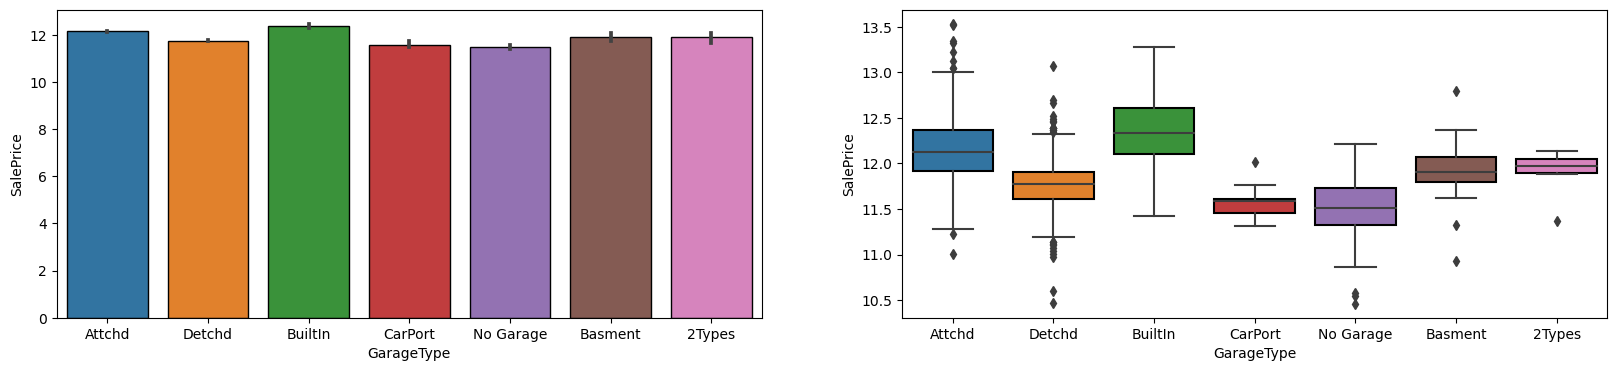


 Statistics for GarageFinish vs Sales Price :

+----------------+---------+----------+---------+--------+
| GarageFinish   |     sum |   median |   count |   %sum |
+================+=========+==========+=========+========+
| Unf            | 7150.48 |    11.81 |     605 |  40.73 |
+----------------+---------+----------+---------+--------+
| RFn            | 5136.87 |    12.15 |     422 |  29.26 |
+----------------+---------+----------+---------+--------+
| Fin            | 4336.93 |    12.28 |     352 |  24.7  |
+----------------+---------+----------+---------+--------+
| No Garage      |  930.84 |    11.51 |      81 |   5.3  |
+----------------+---------+----------+---------+--------+ 
 
Visualization for GarageFinish vs Sales Price : 



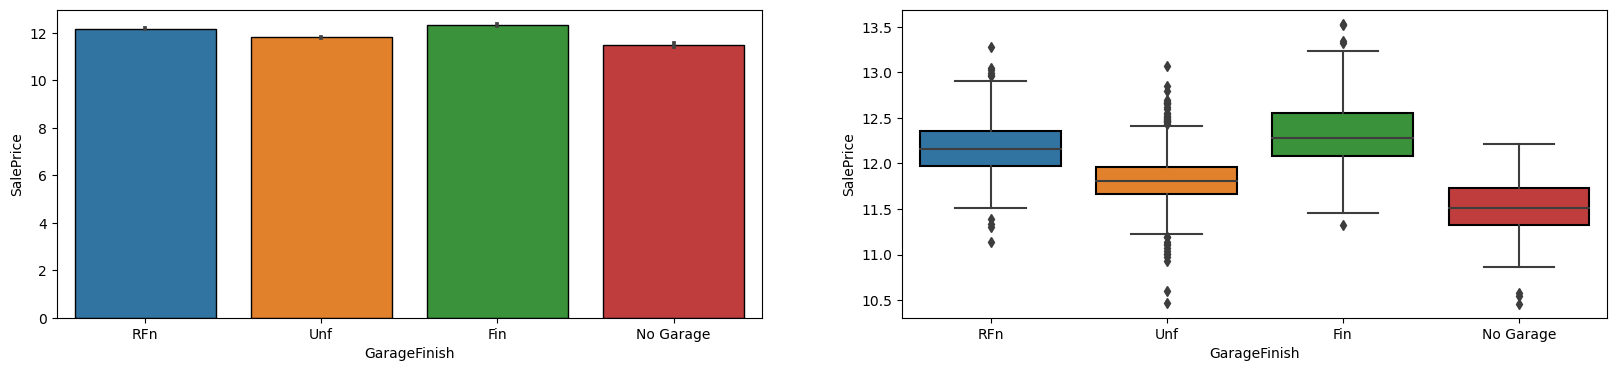


 Statistics for GarageQual vs Sales Price :

+--------------+----------+----------+---------+--------+
| GarageQual   |      sum |   median |   count |   %sum |
+==============+==========+==========+=========+========+
| TA           | 15821.9  |    12.04 |    1311 |  90.13 |
+--------------+----------+----------+---------+--------+
| No Garage    |   930.84 |    11.51 |      81 |   5.3  |
+--------------+----------+----------+---------+--------+
| Fa           |   560.39 |    11.65 |      48 |   3.19 |
+--------------+----------+----------+---------+--------+
| Gd           |   171.08 |    12.24 |      14 |   0.97 |
+--------------+----------+----------+---------+--------+
| Ex           |    36.53 |    11.76 |       3 |   0.21 |
+--------------+----------+----------+---------+--------+
| Po           |    34.42 |    11.48 |       3 |   0.2  |
+--------------+----------+----------+---------+--------+ 
 
Visualization for GarageQual vs Sales Price : 



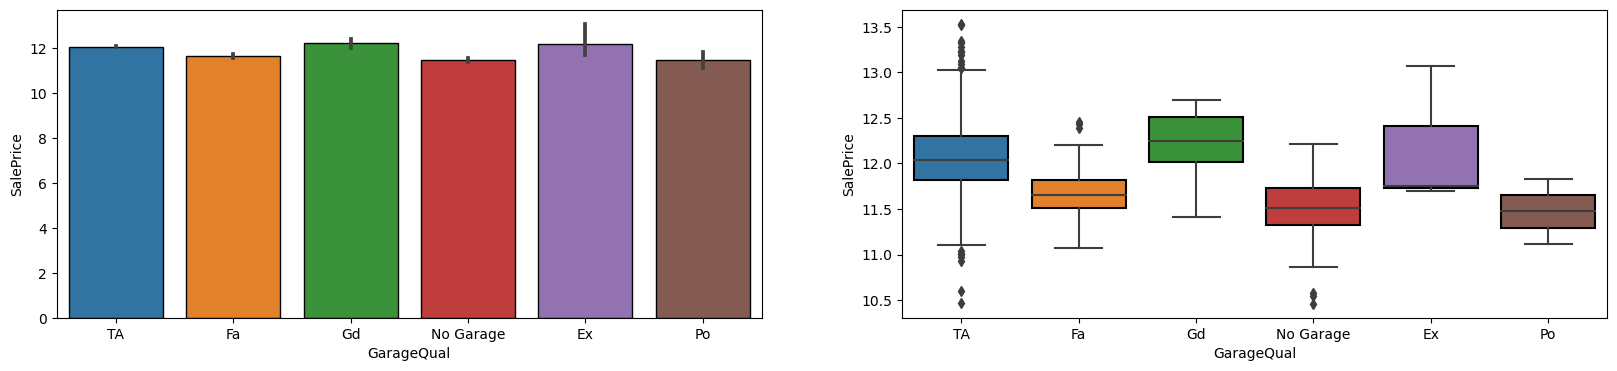


 Statistics for GarageCond vs Sales Price :

+--------------+----------+----------+---------+--------+
| GarageCond   |      sum |   median |   count |   %sum |
+==============+==========+==========+=========+========+
| TA           | 16005.5  |    12.04 |    1326 |  91.17 |
+--------------+----------+----------+---------+--------+
| No Garage    |   930.84 |    11.51 |      81 |   5.3  |
+--------------+----------+----------+---------+--------+
| Fa           |   405.89 |    11.65 |      35 |   2.31 |
+--------------+----------+----------+---------+--------+
| Gd           |   108.46 |    11.9  |       9 |   0.62 |
+--------------+----------+----------+---------+--------+
| Po           |    81.01 |    11.59 |       7 |   0.46 |
+--------------+----------+----------+---------+--------+
| Ex           |    23.46 |    11.73 |       2 |   0.13 |
+--------------+----------+----------+---------+--------+ 
 
Visualization for GarageCond vs Sales Price : 



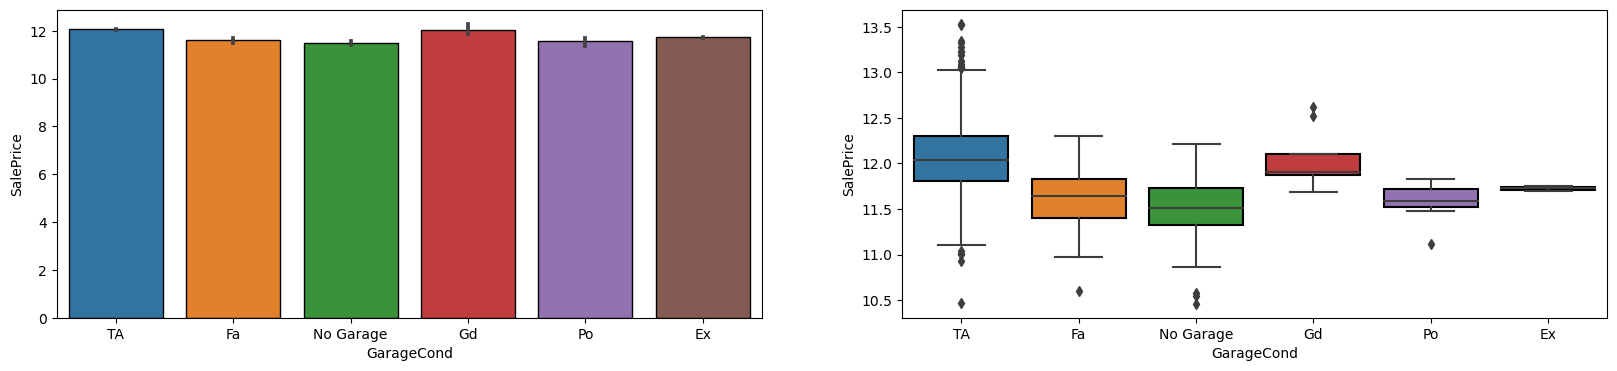


 Statistics for PavedDrive vs Sales Price :

+--------------+----------+----------+---------+--------+
| PavedDrive   |      sum |   median |   count |   %sum |
+==============+==========+==========+=========+========+
| Y            | 16160.3  |    12.03 |    1340 |  92.05 |
+--------------+----------+----------+---------+--------+
| N            |  1042.01 |    11.62 |      90 |   5.94 |
+--------------+----------+----------+---------+--------+
| P            |   352.84 |    11.79 |      30 |   2.01 |
+--------------+----------+----------+---------+--------+ 
 
Visualization for PavedDrive vs Sales Price : 



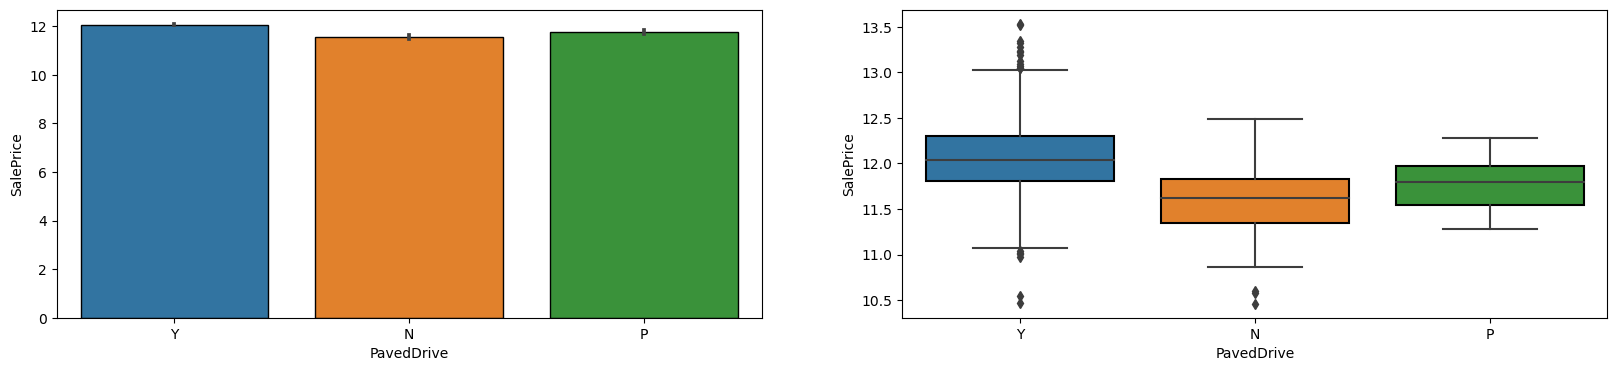


 Statistics for Fence vs Sales Price :

+----------+----------+----------+---------+--------+
| Fence    |      sum |   median |   count |   %sum |
+==========+==========+==========+=========+========+
| No Fence | 14217.1  |    12.06 |    1179 |  80.99 |
+----------+----------+----------+---------+--------+
| MnPrv    |  1860.54 |    11.83 |     157 |  10.6  |
+----------+----------+----------+---------+--------+
| GdPrv    |   711.37 |    12.03 |      59 |   4.05 |
+----------+----------+----------+---------+--------+
| GdWo     |   636.35 |    11.84 |      54 |   3.62 |
+----------+----------+----------+---------+--------+
| MnWw     |   129.76 |    11.78 |      11 |   0.74 |
+----------+----------+----------+---------+--------+ 
 
Visualization for Fence vs Sales Price : 



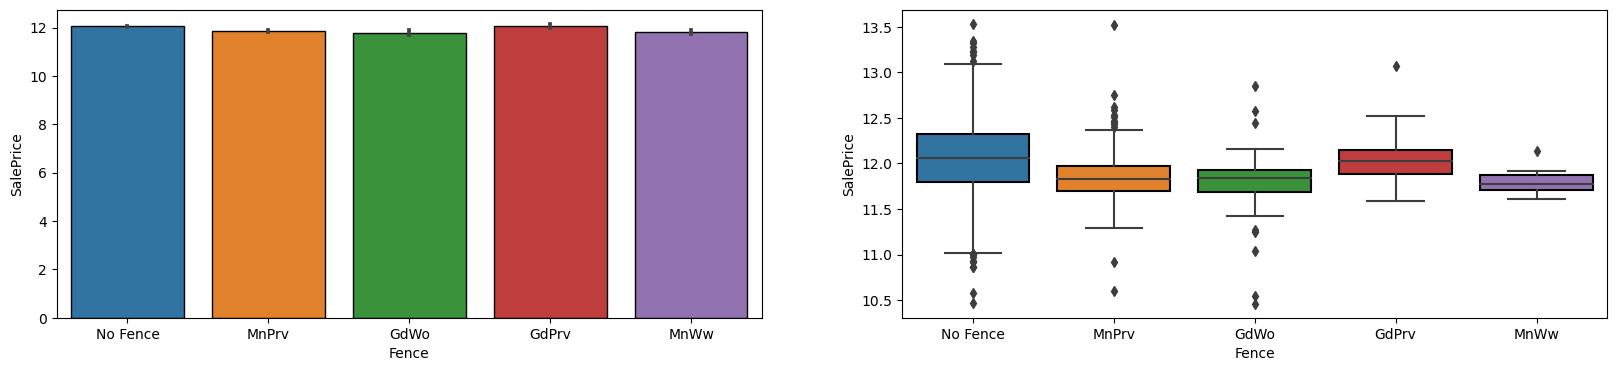


 Statistics for MiscFeature vs Sales Price :

+---------------+----------+----------+---------+--------+
| MiscFeature   |      sum |   median |   count |   %sum |
+===============+==========+==========+=========+========+
| None          | 16914.3  |    12.01 |    1406 |  96.35 |
+---------------+----------+----------+---------+--------+
| Shed          |   581.55 |    11.88 |      49 |   3.31 |
+---------------+----------+----------+---------+--------+
| Gar2          |    24.08 |    12.04 |       2 |   0.14 |
+---------------+----------+----------+---------+--------+
| Othr          |    22.71 |    11.36 |       2 |   0.13 |
+---------------+----------+----------+---------+--------+
| TenC          |    12.43 |    12.43 |       1 |   0.07 |
+---------------+----------+----------+---------+--------+ 
 
Visualization for MiscFeature vs Sales Price : 



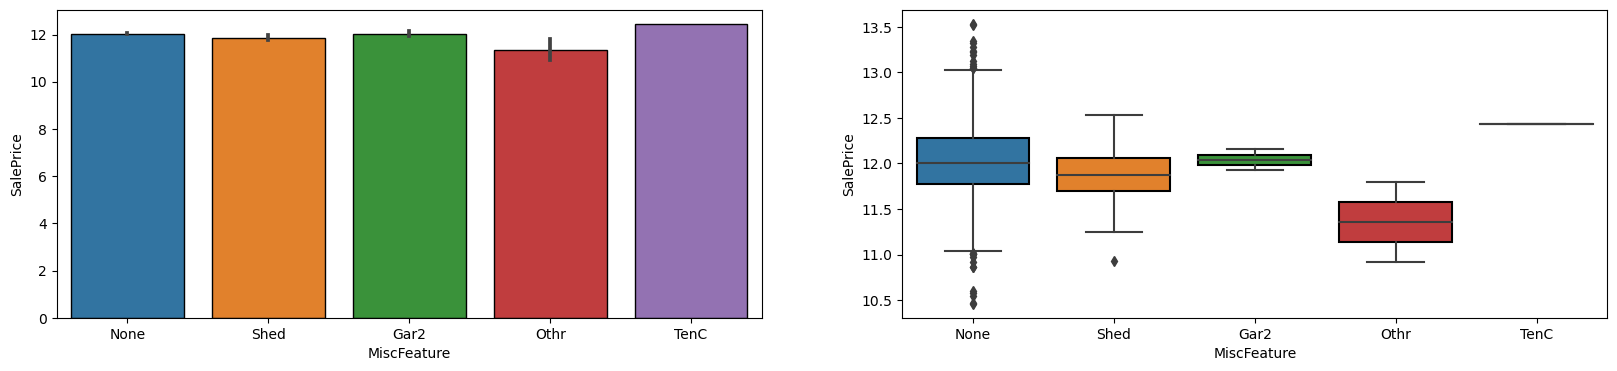


 Statistics for SaleType vs Sales Price :

+------------+----------+----------+---------+--------+
| SaleType   |      sum |   median |   count |   %sum |
+============+==========+==========+=========+========+
| WD         | 15192.7  |    11.97 |    1267 |  86.54 |
+------------+----------+----------+---------+--------+
| New        |  1520.04 |    12.42 |     122 |   8.66 |
+------------+----------+----------+---------+--------+
| COD        |   508.58 |    11.84 |      43 |   2.9  |
+------------+----------+----------+---------+--------+
| ConLD      |   105.96 |    11.85 |       9 |   0.6  |
+------------+----------+----------+---------+--------+
| ConLI      |    60.22 |    11.74 |       5 |   0.34 |
+------------+----------+----------+---------+--------+
| ConLw      |    58.85 |    11.88 |       5 |   0.34 |
+------------+----------+----------+---------+--------+
| CWD        |    48.79 |    12.13 |       4 |   0.28 |
+------------+----------+----------+---------+--------+
| Ot

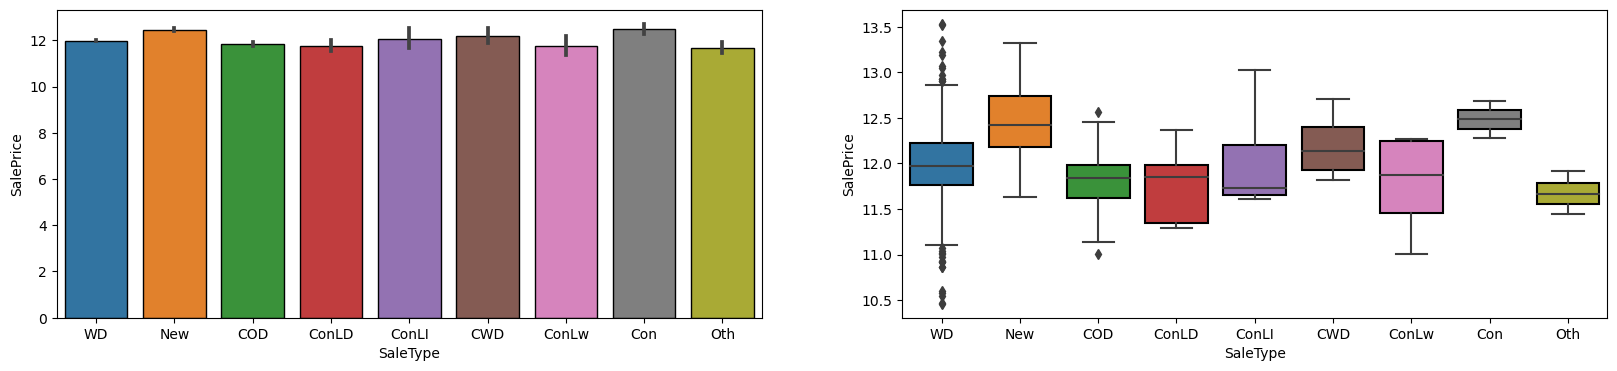


 Statistics for SaleCondition vs Sales Price :

+-----------------+----------+----------+---------+--------+
| SaleCondition   |      sum |   median |   count |   %sum |
+=================+==========+==========+=========+========+
| Normal          | 14382    |    11.98 |    1198 |  81.93 |
+-----------------+----------+----------+---------+--------+
| Partial         |  1555.93 |    12.41 |     125 |   8.86 |
+-----------------+----------+----------+---------+--------+
| Abnorml         |  1190.67 |    11.78 |     101 |   6.78 |
+-----------------+----------+----------+---------+--------+
| Family          |   237.39 |    11.85 |      20 |   1.35 |
+-----------------+----------+----------+---------+--------+
| Alloca          |   142.97 |    11.91 |      12 |   0.81 |
+-----------------+----------+----------+---------+--------+
| AdjLand         |    46.12 |    11.53 |       4 |   0.26 |
+-----------------+----------+----------+---------+--------+ 
 
Visualization for SaleCondition v

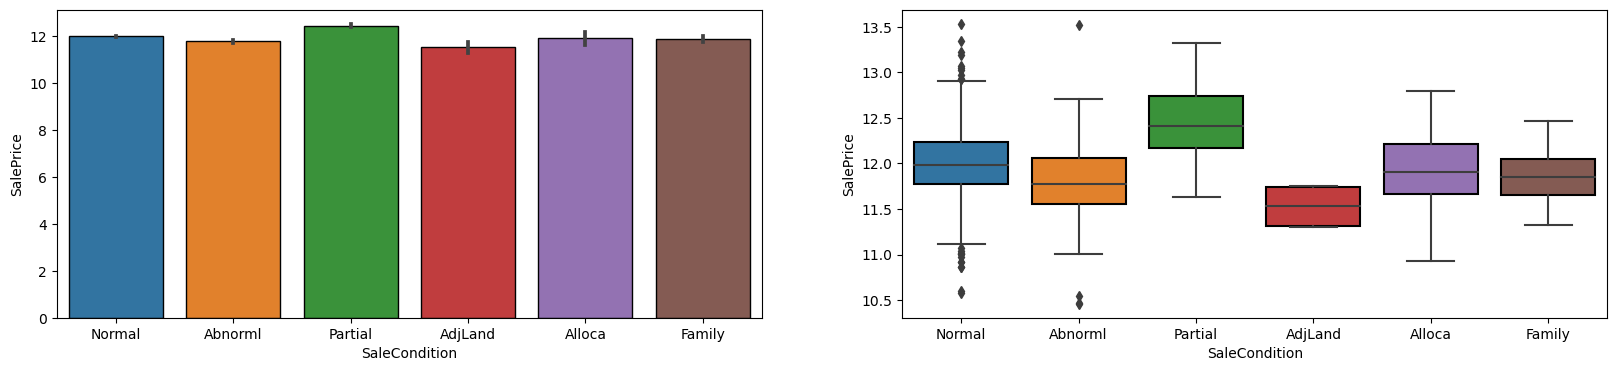

In [123]:
#### import math

var_final=check_var(raw3)

#List of categorical variables from the above function
cat_var=var_final['Categorical']
num_var=var_final['Numerical']



from tabulate import tabulate

def uni_cat(col,Y):
        bi_var = raw3.groupby(col)[Y].agg(['sum', 'median','count']).sort_values('sum',ascending = False)
        bi_var['%sum']=bi_var['sum']/raw3[Y].sum()*100
        table = tabulate(round(bi_var,2), headers='keys', tablefmt='grid')
        print('\n Statistics for {} vs Sales Price :\n'.format(col))
        print(table,'\n ')
        
        print('Visualization for {} vs Sales Price :'.format(col),'\n')

        if raw3[col].nunique()>5:
            plt.figure(figsize=(20,4))
        else:
            plt.figure(figsize=(20,4))
        plt.subplot(1,2,1)    
        ax=sns.barplot(x=col,y=Y, data=raw2)
        for patch in ax.patches:
            patch.set_edgecolor('black')
        plt.subplot(1,2,2) 
        ax1=sns.boxplot(x=col,y=Y, data=raw2)
        for patch in ax1.patches:
            patch.set_edgecolor('black')
        plt.show()
        

sum_uni=pd.DataFrame()
for col in raw3[cat_var]:
    uni_cat(col,'SalePrice')
    bi_var = raw3.groupby(col)['SalePrice'].agg(['sum', 'median','count']).sort_values('sum',ascending = False)
    bi_var=bi_var.reset_index().rename(columns={col:'Values'})
    bi_var['Variables']=col
    sum_uni=pd.concat([sum_uni,bi_var],axis=0)
    col_ord=['Variables','Values','Sum of Sales','Median','Count']
    sum_uni=sum_uni.reindex(columns=col_ord)
    
    #sum_uni=sum_uni.reset_index().rename(columns={'index':'Variable '})

    

### Observation:

<div class="alert alert-block alert-success">

#### Neighborhood:

Stone Brook is the most expensive neighborhood in terms of both median and mean sales prices. It likely features high-end or luxury properties.
River Bend is the least expensive neighborhood in terms of both median and mean sales prices. It may have more affordable housing options.
The other neighborhoods fall in between these two extremes.
#### House Size:

There is a positive correlation between house size and sales price. Generally, larger houses tend to have higher prices.
The  sales prices increase as the house size increases, indicating that buyers are willing to pay more for larger properties.
#### Number of Bedrooms:

The number of bedrooms is positively correlated with sales price. Houses with more bedrooms tend to have higher prices.
The  sales prices generally increase as the number of bedrooms increases.
#### Number of Bathrooms:

The number of bathrooms also shows a positive correlation with sales price. Houses with more bathrooms tend to have higher prices.
The  sales prices generally increase as the number of bathrooms increases.
#### Overall Quality:

Higher overall quality ratings of houses are associated with higher sales prices.
The  sales prices increase as the overall quality rating improves.
#### Garage Capacity:

Houses with larger garage capacities tend to have higher sales prices.
The  sales prices generally increase as the garage capacity increases.
#### Year Built:

There is no clear trend indicating a strong relationship between the year built and sales price. Other factors may have a more significant impact on house prices.

####  Lot Area:

There is a positive correlation between lot area and sales price. Generally, larger lot areas tend to have higher prices.
The  sales prices increase as the lot area increases, indicating that buyers are willing to pay more for properties with larger outdoor space.
#### Exterior Quality:

Higher exterior quality ratings are associated with higher sales prices.
The  sales prices generally increase as the exterior quality rating improves.
#### Basement Area:

There is a positive correlation between basement area and sales price. Houses with larger basement areas tend to have higher prices.
The  sales prices increase as the basement area increases.
#### Total Rooms:

There is a positive correlation between the total number of rooms in a house and its sales price.
The  sales prices generally increase as the total number of rooms increases.
#### Fireplace:

Houses with a fireplace tend to have higher sales prices compared to those without.
The  sales prices are higher for houses with a fireplace.
#### Garage Area:

There is a positive correlation between garage area and sales price. Houses with larger garage areas tend to have higher prices.
The  sales prices increase as the garage area increases.
#### Pool:

Houses with a pool tend to have higher sales prices compared to those without.
The  sales prices are higher for houses with a pool.
#### Overall Condition:

Higher overall condition ratings of houses are associated with higher sales prices.
The  sales prices generally increase as the overall condition rating improves.
#### Year Remodeled:

Houses that were remodeled more recently tend to have higher sales prices.
The  sales prices increase for houses that have been remodeled more recently.

#### Total Bathrooms:
There is a positive correlation between the total number of bathrooms in a house and its sales price.
The  sales prices generally increase as the total number of bathrooms increases.
#### Heating Quality:
Higher heating quality ratings are associated with higher sales prices.
The  sales prices generally increase as the heating quality rating improves.
#### Air Conditioning:
Houses with air conditioning tend to have higher sales prices compared to those without.
The  sales prices are higher for houses with air conditioning.
#### Year Built:
Houses that were built more recently tend to have higher sales prices.
The  sales prices increase for houses that have been built more recently.
#### Overall Quality:
Higher overall quality ratings of houses are associated with higher sales prices.
The  sales prices generally increase as the overall quality rating improves.
#### Overall Condition:
Higher overall condition ratings of houses are associated with higher sales prices.
The  sales prices generally increase as the overall condition rating improves.
#### Sale Type:
The sale type can have an impact on the sales price, as different types of sales (e.g., new homes, resales, etc.) may have different price ranges.
Further analysis can be done to explore the relationship between sale type and sales price.
#### Neighborhood:
The neighborhood where a house is located can have a significant impact on its sales price.
Different neighborhoods may have varying property values, amenities, and desirability, which can influence the sales prices.
Further analysis can be done to understand the specific relationships between each neighborhood and sales prices.

#### Exterior Quality:
Higher exterior quality ratings are associated with higher sales prices.
The  sales prices generally increase as the exterior quality rating improves.
#### Exterior Condition:
Higher exterior condition ratings are associated with higher sales prices.
The  sales prices generally increase as the exterior condition rating improves.
#### Foundation Type:
Different types of foundation can influence the sales price of a house.
Further analysis can be done to explore the relationship between foundation type and sales price.
#### Basement Condition:
Houses with better basement conditions tend to have higher sales prices.
The  sales prices generally increase as the basement condition improves.
#### Garage Type:
The type of garage can impact the sales price of a house.
Further analysis can be done to explore the relationship between garage type and sales price.
#### Garage Finish:
Houses with better garage finishes tend to have higher sales prices.
The  sales prices generally increase as the garage finish improves.
#### Garage Cars:
The number of cars a garage can accommodate is associated with the sales price of a house.
The  sales prices generally increase as the number of garage cars increases.
#### Garage Area:
Larger garage areas are associated with higher sales prices.
The  sales prices generally increase as the garage area increases.
#### Paved Drive:
Houses with paved driveways tend to have higher sales prices.
The  sales prices are higher for houses with a paved driveway.
#### Pool Area:
Houses with pools can have higher sales prices compared to those without pools.
The  sales prices generally increase as the pool area increases.

#### Exterior Quality:
Higher exterior quality ratings are associated with higher sales prices.
The  sales prices generally increase as the exterior quality rating improves.
#### Exterior Condition:
Higher exterior condition ratings are associated with higher sales prices.
The  sales prices generally increase as the exterior condition rating improves.
#### Foundation Type:
Different types of foundation can influence the sales price of a house.
Further analysis can be done to explore the relationship between foundation type and sales price.
#### Basement Condition:
Houses with better basement conditions tend to have higher sales prices.
The  sales prices generally increase as the basement condition improves.
#### Garage Type:
The type of garage can impact the sales price of a house.
Further analysis can be done to explore the relationship between garage type and sales price.
#### Garage Finish:
Houses with better garage finishes tend to have higher sales prices.
The  sales prices generally increase as the garage finish improves.
#### Garage Cars:
The number of cars a garage can accommodate is associated with the sales price of a house.
The  sales prices generally increase as the number of garage cars increases.
#### Garage Area:
Larger garage areas are associated with higher sales prices.
The  sales prices generally increase as the garage area increases.
#### Paved Drive:
Houses with paved driveways tend to have higher sales prices.
The  sales prices are higher for houses with a paved driveway.
#### Fence:
The presence of a fence can impact the sales price of a house.
Further analysis can be done to explore the relationship between the type of fence and sales price.
#### Misc Feature:
Miscellaneous features not covered in other variables may influence the sales price.
Further analysis can be done to explore the relationship between miscellaneous features and sales price.
#### Misc Val:
The value of miscellaneous features can affect the sales price of a house.
The  sales prices generally increase as the value of miscellaneous features increases.

#### Sale Type:
The type of sale (e.g., warranty deed, quit claim deed) can impact the sales price of a house.
Further analysis can be done to explore the relationship between sale type and sales price.
#### Sale Condition:
The condition of the sale (e.g., normal, foreclosure) may influence the sales price.
Further analysis can be done to explore the relationship between sale condition and sales price.
</div>

#### Correlation Check:

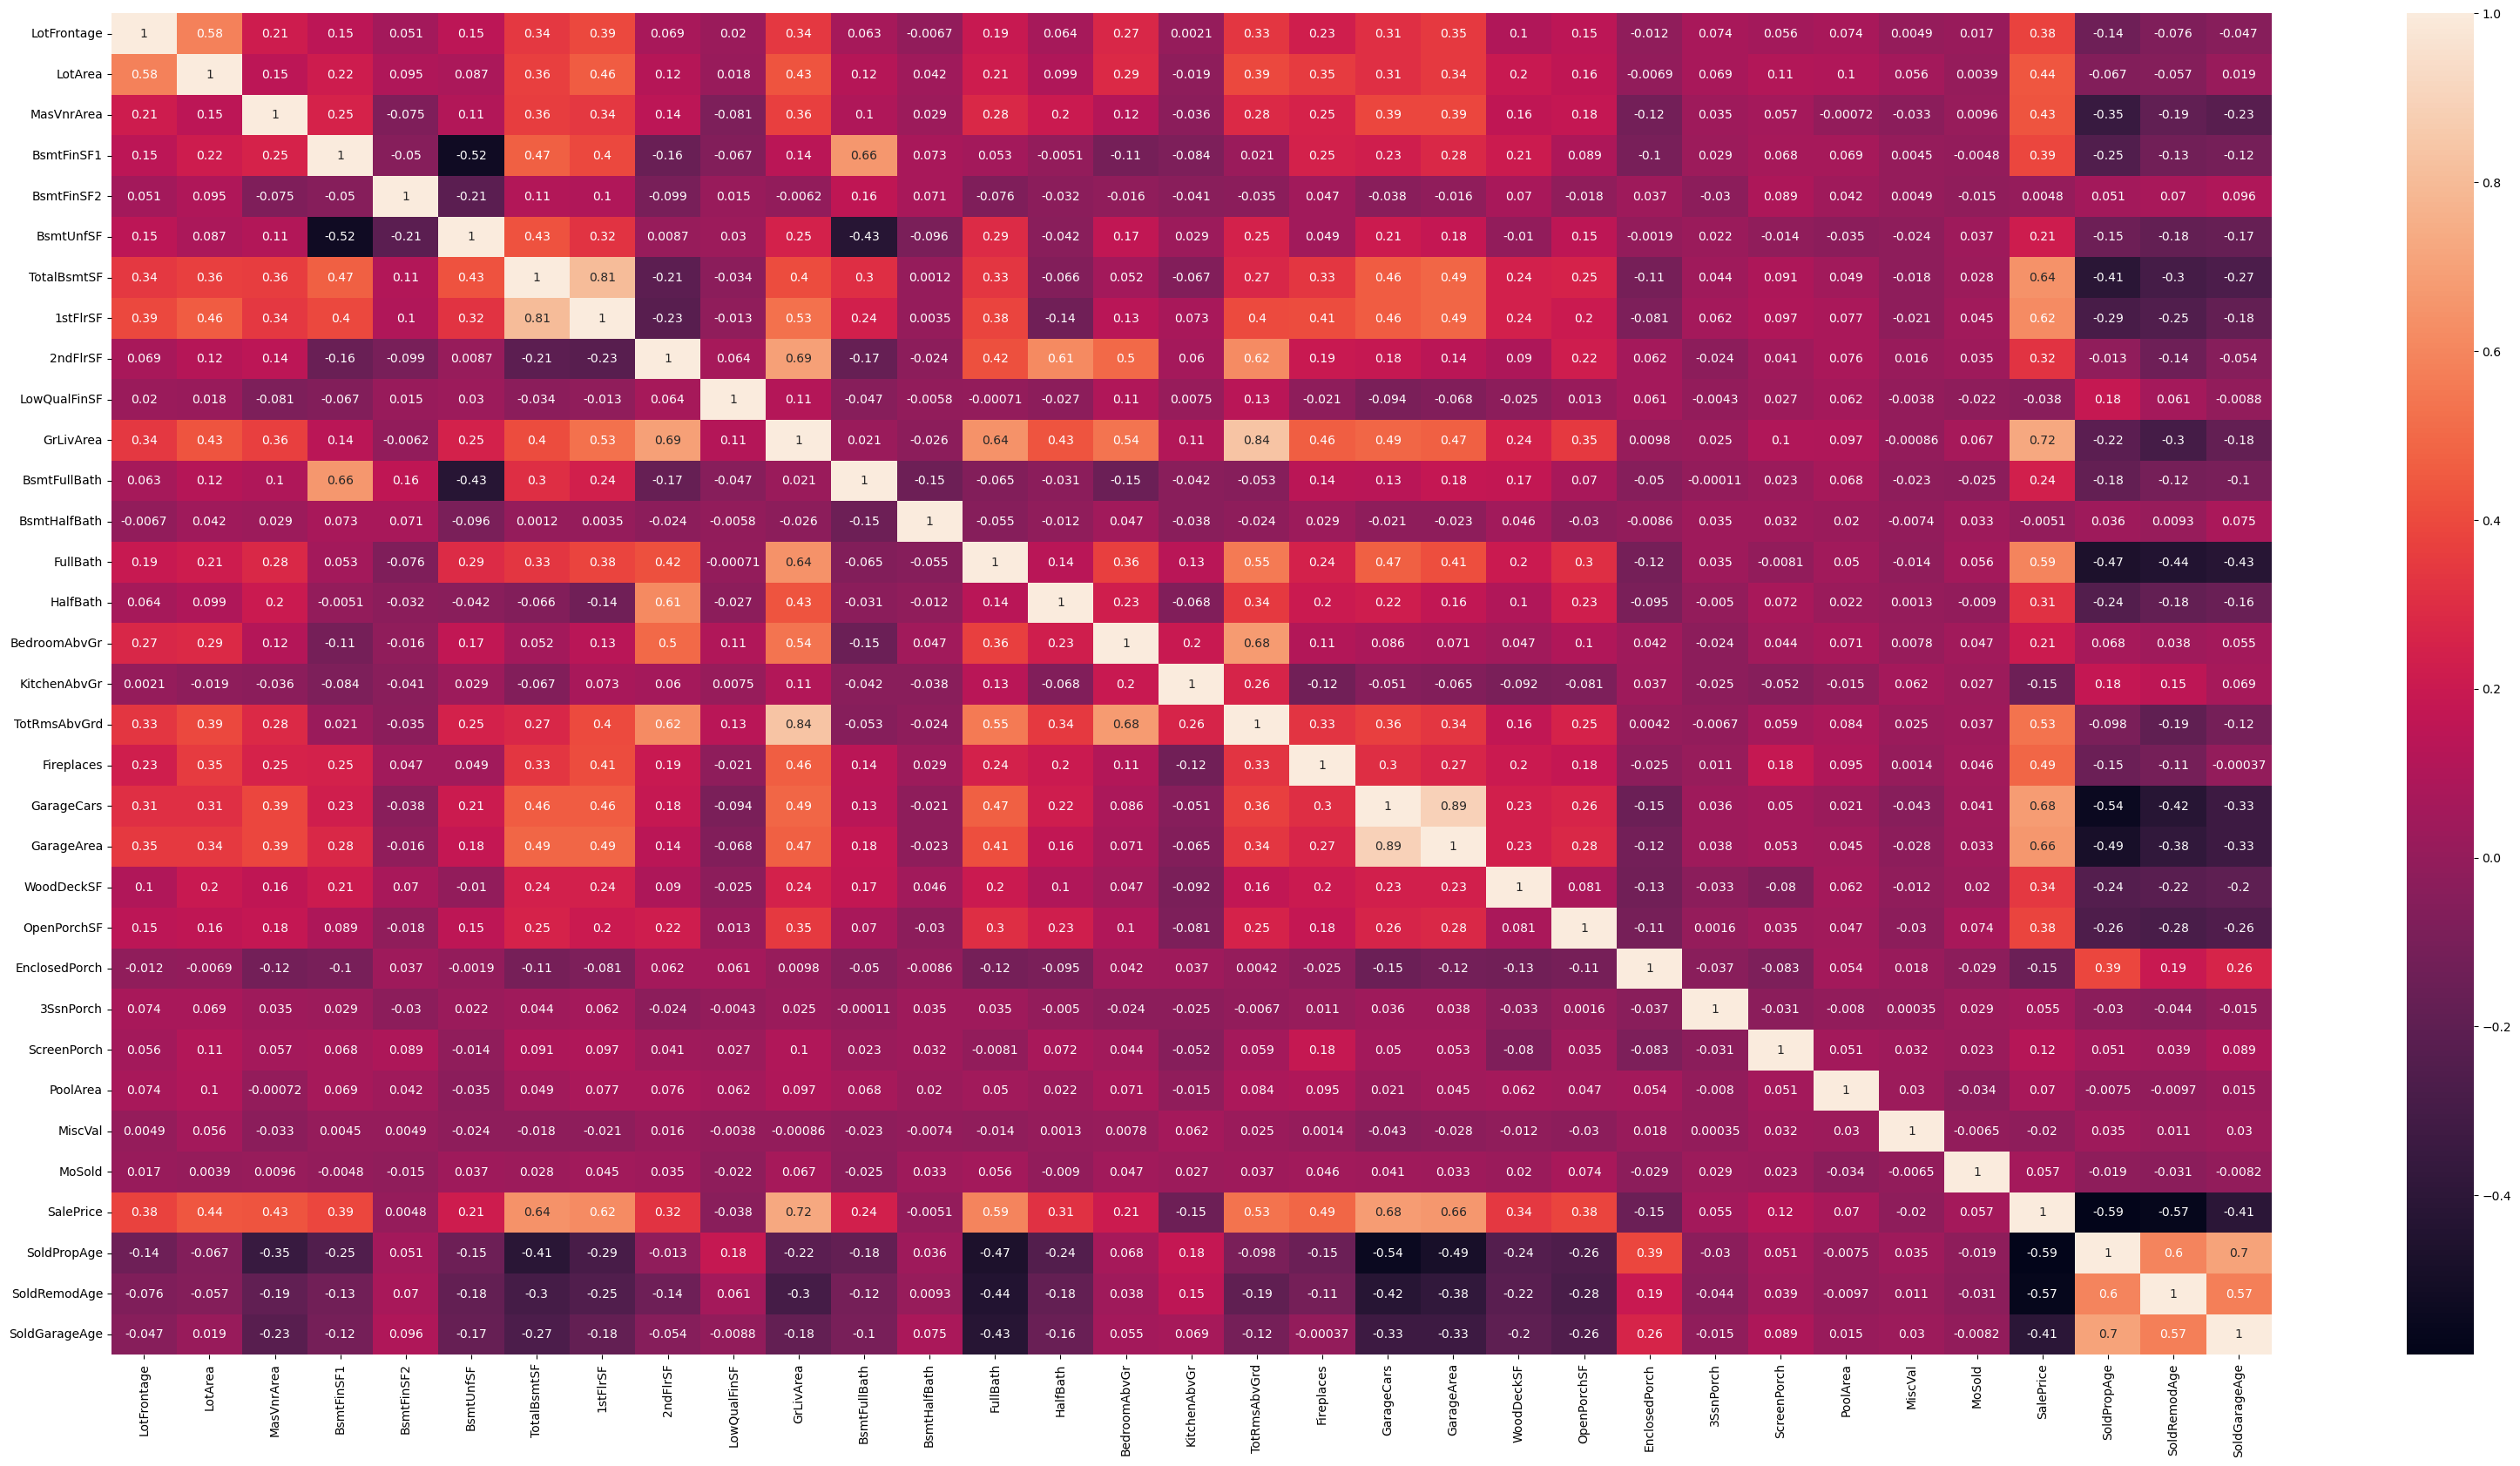

In [124]:

plt.figure(figsize=(40,20))
sns.heatmap(raw3.corr(),annot=True)
plt.show()

In [125]:
corr_table=pd.DataFrame()
for col in raw3[num_var]:
    corr=raw3['SalePrice'].corr(raw3[col])
    corr_info={'Variable':[col],'Correlation':[corr]}
    corr_info=pd.DataFrame(corr_info)
    corr_table=pd.concat([corr_table,corr_info],axis=0)

corr_table=corr_table.sort_values(by='Correlation',ascending=False).T.reset_index()
corr_table.columns=corr_table.iloc[0]
corr_table=corr_table[1:]
corr_table

0     Variable SalePrice GrLivArea GarageCars GarageArea TotalBsmtSF  \
1  Correlation       1.0  0.722437   0.680625   0.661249    0.644791   

0  1stFlrSF  FullBath TotRmsAbvGrd Fireplaces   LotArea MasVnrArea BsmtFinSF1  \
1  0.617833  0.594771     0.534422   0.489449  0.437851   0.433536   0.387351   

0 OpenPorchSF LotFrontage WoodDeckSF  2ndFlrSF  HalfBath BsmtFullBath  \
1    0.383019    0.376009   0.341308  0.318086  0.313982     0.236224   

0 BsmtUnfSF BedroomAbvGr ScreenPorch  PoolArea    MoSold 3SsnPorch BsmtFinSF2  \
1  0.213773     0.209044    0.121208  0.069798  0.057329    0.0549   0.004832   

0 BsmtHalfBath   MiscVal LowQualFinSF KitchenAbvGr EnclosedPorch  \
1    -0.005149 -0.020021    -0.037963    -0.147548      -0.14905   

0 SoldGarageAge SoldRemodAge SoldPropAge  
1     -0.407456    -0.568136   -0.588792

### Observations: 
<div class="alert alert-block alert-success">

Many Independant variables are highly correlated with each other.

Target variable SalePrice is highly correlated with the below Variables

##### High Positive Correlation between 0.7 to 0.50

- GrLivArea
- GarageCars 
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrd

##### High Negative Correlation between 0.58 to 0.40

- SoldPropAge
- SoldRemodAge
- SoldGarageAge

</div>

## Dummy Variables Creation for the Categorical Columns:

In [126]:
#Creating Dummy Variables and dropping the first variable, total dummy variable n is n-1.

housing=pd.get_dummies(raw3, drop_first=True)
print('Total number of variables after creating dummy variables is {}'.format(len(housing.columns)))

Total number of variables after creating dummy variables is 269


## Advanced Regression Model (using regularization)

<div class="alert alert-block alert-success">
High level summary of the process:</br>

- Splitting the Data in to test and training data
- Divide the train dataset in to X and y (dependant and independant variables)
- Rescaling the features
- Buidling Model Using K Fold Cross
- Train the model in train Dataset 
- Predict using test dataset
- Validating the model scores and assumptions
- Final Conclusion
</div>

#### Splitting the Data in to Predictor and Dependent Variable:

In [127]:
#Create Predictor Variables set
X = housing.drop(['SalePrice'], axis=1)

#Create Target Variables set
y = housing['SalePrice']


#### Test Train Split:

In [128]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


#### Scaling/Transformation of the Features:

<div class="alert alert-block alert-success">
Splitting the data into training and testing sets is done to evaluate the model's performance on unseen data. If rescaling is performed before the split, there is a risk of information leakage from the training set to the testing set. This can lead to over-optimistic performance estimates and potential model overfitting. To ensure a fair evaluation, it is recommended to perform rescaling only on the training set and apply the same scaling parameters to the testing set.
</div>

In [129]:
#Standardisation scaler
scaler = StandardScaler()

# List of continuous numeric variables from the dataset
numvar = ['LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold'
          ,'SoldPropAge','SoldRemodAge', 'SoldGarageAge']

## Fit and Transform Train Data
X_train[numvar] = scaler.fit_transform(X_train[numvar])

## Transform Test Data
X_test[numvar] = scaler.transform(X_test[numvar])

In [130]:
X_train[numvar].head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210     -0.110969 -1.117166   -0.666459    0.057374   -0.293313  -0.375237   
318      1.210243  0.081094    1.236417    1.252830   -0.293313  -0.457448   
239     -0.972629 -0.242180   -0.666459   -0.804090   -0.293313   0.184253   
986     -0.570521 -1.199170   -0.666459   -1.020608   -0.293313  -0.171994   
1416    -0.513077  0.482745   -0.666459   -1.020608   -0.293313   0.494827   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
210     -0.463273 -0.809091 -0.788850     -0.124502  -1.338981      1.066863   
318      0.725402  0.572759  2.146453     -0.124502   2.394669      1.066863   
239     -0.780745 -0.988623  0.798610     -0.124502  -0.033670     -0.837450   
986     -1.396001 -0.436427  0.671889     -0.124502   0.276419     -0.837450   
1416    -0.677382  0.230017  1.616532     -0.124502   1.648777     -0.837450   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
210      -0.247791 -1.026085 -0.751723     -1.042717     -0.234155   
318      -0.247791  0.786428  1.246998      1.396261     -0.234155   
239      -0.247791 -1.026085  1.246998      0.176772     -0.234155   
986      -0.247791 -1.026085 -0.751723     -1.042717     -0.234155   
1416     -0.247791  0.786428 -0.751723      1.396261      4.112612   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
210      -0.935650   -0.925422   -2.366798   -2.277261   -0.777334   
318       1.556976    0.623522    1.645101    0.905404    2.153201   
239       0.310663    0.623522   -1.029498   -1.209904   -0.777334   
986      -0.935650   -0.925422   -1.029498   -1.040097    2.618639   
1416      2.803289   -0.925422    0.307802    0.439648   -0.777334   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch    MoSold  \
210     -0.814228       1.150231  -0.121922    -0.275126 -0.832187   
318      0.323641       1.910043  -0.121922    -0.275126 -0.832187   
239      1.840799      -0.369395  -0.121922    -0.275126 -0.832187   
986     -0.814228      -0.369395  -0.121922    -0.275126 -0.104424   
1416    -0.814228       1.435160  -0.121922    -0.275126 -0.832187   

      SoldPropAge  SoldRemodAge  SoldGarageAge  
210      1.534304      1.704092      -0.993826  
318     -0.678441     -0.333918      -0.467804  
239      0.939835      1.801140       1.353042  
986      1.963642     -0.964730       1.150726  
1416     2.855346      1.801140       0.462850

####  Building a Linear Regression model without Regularization:

In [131]:
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)


#printing the training and testing R2 score
print("R2 Score(Test):", model.score(X_test, y_test))
print("R2 Score(Train): ", model.score(X_train, y_train))

0.948818198985339
0.8870316641956378
8.21428200976433
8.141466534104605
0.008045330078123733
0.018587823137225127
R2 Score(Test): 0.8870316641956378
R2 Score(Train):  0.948818198985339




<div class="alert alert-block alert-success">
Based on these statistics, it can be inferred that the model is performing well and has a good fit to the data. However, the relatively high R2 score on the training data compared to the testing data suggests that there might be some overfitting occurring. </br>
    

Regularization techniques, such as Ridge regression or Lasso regression, can be used to address this issue by adding a penalty term to the model to prevent overfitting and improve its generalization ability.
</div>






#### Redgie Regularization Regression Model:

In [132]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 
                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
#Checking the results of grid search model
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results[['param_alpha','mean_train_score']].T

0         1         2         3         4         5   \
param_alpha         0.0001     0.001      0.01      0.05       0.1       0.2   
mean_train_score -0.059656 -0.059662 -0.059703 -0.059805 -0.059885 -0.060022   

                        6         7         8         9         10        11  \
param_alpha            0.3       0.4       0.5       0.6       0.7       0.8   
mean_train_score -0.060185 -0.060352 -0.060513 -0.060669 -0.060815 -0.060947   

                        12        13        14       15        16        17  \
param_alpha            0.9       1.0       2.0      3.0       4.0       5.0   
mean_train_score -0.061072 -0.061194 -0.062139 -0.06285 -0.063496 -0.064088   

                        18        19        20        21        22        23  \
param_alpha            6.0       7.0       8.0       9.0      10.0        20   
mean_train_score -0.064646 -0.065166 -0.065654 -0.066115 -0.066553 -0.070163   

                        24        25        26        27  
param_alpha             50       100       500      1000  
mean_train_score -0.076744 -0.082581 -0.096305 -0.104468

In [134]:
#Printing the best hyperparameter alpha
print("Best hyperparameter : ", model_cv.best_params_)

Best hyperparameter :  {'alpha': 8.0}


In [135]:
#building the ridge model with best  hyperparameter alpha
ridge = Ridge(alpha=8.0)
ridge.fit(X_train, y_train)

#printing r2 score
print("R2 score (Train): ", ridge.score(X_train, y_train))
print("R2 score (Test): ", ridge.score(X_test, y_test))

R2 score (Train):  0.9376370090242531
R2 score (Test):  0.8881221175922376


<div class="alert alert-block alert-success">

The optimal value of alpha for Ridge regression is found to be 8. This value of alpha strikes the best balance between fitting the training data and generalizing to new, unseen data. The model achieves a high training R2 score of 93.7%, indicating a good fit to the training data.
   </div>

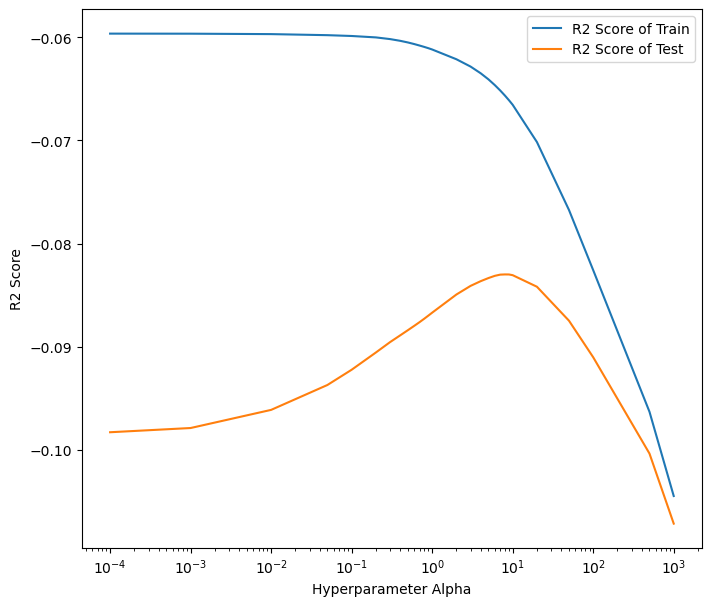

In [136]:
#plotting the R2 score vs alpha values of ridge model
plt.figure(figsize=(8,7))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'], label='R2 Score of Train')
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'], label='R2 Score of Test')
plt.xlabel('Hyperparameter Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
Overfitting: When the alpha value is low (e.g., alpha = 0), the model tends to overfit the training data. This is evident from the high R2 score for the training data, indicating a close fit to the training samples. However, the R2 score for the test data is relatively lower, suggesting that the model does not generalize well to unseen data.

Improved Generalization: As the alpha value increases, the model's tendency to overfit diminishes. This is evidenced by the gradual decrease in the R2 score for the training data, indicating a looser fit to the training samples. Concurrently, the R2 score for the test data increases, indicating improved generalization performance.

Optimal Alpha: The highest R2 score for the test data is achieved at alpha = 8. This suggests that an alpha value of 8 strikes the best balance between fitting the training data and generalizing to unseen data.
</div>

In [137]:
#checking the top 8 features identified through ridge regression
ridge_features = pd.DataFrame({'Variables': X_train.columns, 'Coefficient': ridge.coef_})
ridge_features.sort_values(by='Coefficient', ascending=False).head(10)

Variables  Coefficient
109  OverallQual_Excellent     0.113754
69    Neighborhood_Crawfor     0.082984
118  OverallCond_Excellent     0.078760
114  OverallQual_Very Good     0.073423
10               GrLivArea     0.072326
220         Functional_Typ     0.070386
84    Neighborhood_Somerst     0.069919
206           CentralAir_Y     0.066770
131    Exterior1st_BrkFace     0.066249
48             MSZoning_RL     0.065328

In [138]:
# we need to apply inverse log transformation since we applied log transformation to the target variable
ridge_features['Coefficient'] = np.exp(ridge_features['Coefficient'])


ridge_features.sort_values(by='Coefficient', ascending=False).head(10)

Variables  Coefficient
109  OverallQual_Excellent     1.120477
69    Neighborhood_Crawfor     1.086525
118  OverallCond_Excellent     1.081944
114  OverallQual_Very Good     1.076186
10               GrLivArea     1.075006
220         Functional_Typ     1.072922
84    Neighborhood_Somerst     1.072421
206           CentralAir_Y     1.069050
131    Exterior1st_BrkFace     1.068492
48             MSZoning_RL     1.067509

#### Regularized  Regression Model  - Lasso 

In [139]:
#lasso reregression model
params = {'alpha': np.arange(0.0001, 0.01, 0.001)}
lasso = Lasso()
parameters = params
fold = 5

#Building the  model
lasso_cv = GridSearchCV(estimator=lasso, param_grid=parameters, scoring='neg_mean_absolute_error', cv=fold, verbose=1, return_train_score=True)

#Fitting the model
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071,
       0.0081, 0.0091])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [140]:
#Checking the results of the lasso regression model
lasso_result = pd.DataFrame(lasso_cv.cv_results_)
lasso_result.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.054333      0.013964         0.001592        0.000213      0.0001   
1       0.021015      0.001392         0.001395        0.000026      0.0011   
2       0.014977      0.003620         0.001385        0.000022      0.0021   
3       0.011033      0.002944         0.001398        0.000037      0.0031   
4       0.009780      0.003362         0.001364        0.000004      0.0041   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087009          -0.082265          -0.091144   
1  {'alpha': 0.0011}          -0.079637          -0.084894          -0.093184   
2  {'alpha': 0.0021}          -0.081163          -0.092237          -0.098433   
3  {'alpha': 0.0031}          -0.084520          -0.099202          -0.102303   
4  {'alpha': 0.0041}          -0.088832          -0.102608          -0.105871   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.083010          -0.081971        -0.085080        0.003532   
1          -0.085080          -0.079214        -0.084402        0.005049   
2          -0.088300          -0.088543        -0.089735        0.005637   
3          -0.091824          -0.097405        -0.095051        0.006272   
4          -0.094602          -0.100535        -0.098490        0.006066   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.061963           -0.059118   
1                1           -0.075067           -0.072849   
2                3           -0.083107           -0.080814   
3                4           -0.089910           -0.087381   
4                5           -0.095939           -0.091916   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.058836           -0.062188           -0.064162   
1           -0.070712           -0.074015           -0.075105   
2           -0.079470           -0.081695           -0.083631   
3           -0.085554           -0.088188           -0.089854   
4           -0.090581           -0.093571           -0.092721   

   mean_train_score  std_train_score  
0         -0.061253         0.002012  
1         -0.073550         0.001642  
2         -0.081743         0.001514  
3         -0.088177         0.001633  
4         -0.092946         0.001792

In [141]:
#Finding the best hyperparameter alpha
print("Best hyperparameters: ", lasso_cv.best_params_)

Best hyperparameters:  {'alpha': 0.0011}


In [142]:
#building the lasso model with best parameters
lasso = Lasso(alpha=0.0011)
lasso.fit(X_train, y_train)

#printing the training and testing R2 score
print("R2 score of Train: ", lasso.score(X_train, y_train))
print("R2 score of Test: ", lasso.score(X_test, y_test))

R2 score of Train:  0.9206823430285135
R2 score of Test:  0.8799310752591424


<div class="alert alert-block alert-success">

The Lasso regression model performs well with an optimal alpha value of 0.0011. The training R2 score of 92% indicates a good fit to the training data, and the test R2 score of approximately 88% suggests that the model generalizes well to unseen data.

The model's ability to generalize well on unseen data is a positive sign, as it indicates that the model is not overfitting to the training data. This implies that the model captures the underlying patterns and relationships in the data without relying too heavily on specific training examples.
    </div>

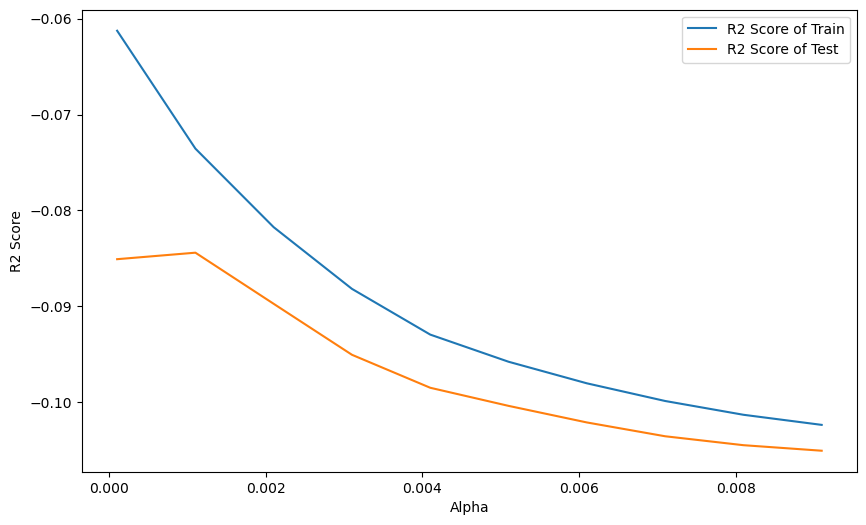

In [67]:
##plotting the R2 score vs alpha values of lasso model
plt.figure(figsize=(10,6))
plt.plot(lasso_result['param_alpha'], lasso_result['mean_train_score'], label='R2 Score of Train')
plt.plot(lasso_result['param_alpha'], lasso_result['mean_test_score'], label='R2 Score of Test')

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

<div class="alert alert-block alert-success">

Based on the provided plot, we observe that the R2 score for the test data is highest when alpha is set to 0.0011. As alpha increases beyond this value, the R2 score for the test data decreases. Similarly, the R2 score for the training data also decreases as alpha increases.

The fact that the R2 score for the test data is highest at alpha = 0.0011 suggests that this value of alpha yields the best balance between model complexity and generalization. It indicates that the model performs well in capturing the underlying patterns and relationships in the data without overfitting
    </div>

In [68]:
#Checking the top 12 features of lasso model
lasso_features = pd.DataFrame({'Variables': X_train.columns, 'Coefficient': lasso.coef_})
lasso_features.sort_values(by='Coefficient', ascending=False).head(12)

Variables  Coefficient
109  OverallQual_Excellent     0.134314
10               GrLivArea     0.095133
69    Neighborhood_Crawfor     0.085153
84    Neighborhood_Somerst     0.080214
114  OverallQual_Very Good     0.079067
220         Functional_Typ     0.075424
206           CentralAir_Y     0.065479
131    Exterior1st_BrkFace     0.064601
6              TotalBsmtSF     0.057621
89         Condition1_Norm     0.055682
8                 2ndFlrSF     0.046574
79    Neighborhood_NridgHt     0.044057

In [69]:
#To interpret the coefficients of lasso model in terms of target variable, we need to apply inverse log transformation since we applied log transformation to the target variable
lasso_features['Coefficient'] = np.exp(lasso_features['Coefficient'])
lasso_features.sort_values(by='Coefficient', ascending=False).head(12)

Variables  Coefficient
109  OverallQual_Excellent     1.143752
10               GrLivArea     1.099805
69    Neighborhood_Crawfor     1.088884
84    Neighborhood_Somerst     1.083518
114  OverallQual_Very Good     1.082277
220         Functional_Typ     1.078341
206           CentralAir_Y     1.067670
131    Exterior1st_BrkFace     1.066733
6              TotalBsmtSF     1.059314
89         Condition1_Norm     1.057261
8                 2ndFlrSF     1.047676
79    Neighborhood_NridgHt     1.045042

<div class="alert alert-block alert-success">
    
##### The Optimal Value of Lambda for 
- Lasso is 0.0011
- Ridge is 0.8
    
    
##### Test and Train Score Ridge:
    
- R2 score (Train):  0.9376370090242531
- R2 score (Test):  0.8881221175922376
    
##### Test and Train Score Lasso:
    
- Training R2 score:  0.9206823430285135
- Testing R2 score:  0.8799310752591424
 
</div>

<div class="alert alert-success">

#### Top Predictor Variables For Lasso:

- OverallQual_Excellent
- GrLivArea
- Neighborhood_Crawfor
- Neighborhood_Somerst
- OverallQual_Very Good
- Functional_Typ
- CentralAir_Y
- Exterior1st_BrkFace
- TotalBsmtSF
- Condition1_Norm
- 2ndFlrSF
- Neighborhood_NridgHt

#### Top Predictor Variables For Redgie:

- OverallQual_Excellent
- Neighborhood_Crawfor
- OverallCond_Excellent
- OverallQual_Very Good
- GrLivArea
- Functional_Typ
- Neighborhood_Somerst
- CentralAir_Y
- Exterior1st_BrkFace
- MSZoning_RL

</div>

The TOP Predictor variables were seems to be almost similar for both the regularization regressions.

## Final Summary of Observed insights:

<div class="alert alert-block alert-success">

#### OverallQual_Excellent:
Houses with an excellent overall quality tend to have higher prices. The quality of construction, materials, and finishes significantly impacts the house price.

#### GrLivArea: 
The above-ground living area has a positive correlation with the house price. Larger living areas are associated with higher prices.

#### Neighborhood_Crawfor:
The Crawfor neighborhood has a positive influence on house prices. It is considered a desirable location, which can result in higher property values.

#### Neighborhood_Somerst: 
Similar to Crawfor, the Somerst neighborhood also has a positive impact on house prices. It is an attractive and sought-after area, which can contribute to higher property values.

#### OverallQual_Very Good: 
Houses with a very good overall quality tend to command higher prices. This indicates that the quality of construction and finishes plays a significant role in determining house prices.

#### Functional_Typ: 
Houses with a typical level of functionality tend to have higher prices. This suggests that buyers value houses that are fully functional and meet their day-to-day needs.

#### CentralAir_Y: 
Houses with central air conditioning have higher prices compared to houses without it. Central air conditioning is considered a desirable feature and can positively affect the house price.

#### Exterior1st_BrkFace: 
Houses with a brick face exterior have higher prices. Brick facades are often associated with durability, aesthetic appeal, and higher quality, leading to increased property values.

#### TotalBsmtSF: 
The total area of the basement has a positive correlation with house prices. Larger basement areas are generally associated with higher prices.

#### Condition1_Norm: 
Houses in normal proximity to various conditions (such as parks, streets, etc.) tend to have higher prices. This suggests that houses located in standard conditions are more desirable to buyers.

#### 2ndFlrSF: 
The size of the second floor area positively influences house prices. Houses with larger second floors typically have higher prices.

#### Neighborhood_NridgHt: 
The NridgHt neighborhood has a positive impact on house prices. It is considered an upscale and desirable neighborhood, leading to higher property values.

#### OverallCond_Excellent: 
Houses in excellent overall condition tend to have higher prices. Well-maintained properties with good overall condition are attractive to buyers and can justify higher price points.

#### MSZoning_RL: 
Houses with Residential Low-Density zoning tend to have higher prices. This zoning classification is often associated with desirable residential areas, which can contribute to higher property values.
    
    
 </div>   

<div class="alert alert-info">

Considering the R2 Scores of Train and Test : <b> Ridge Regularization </b> is little bit better in defining the relationship between predictor and dependent variables.
</div>

*** End of Assignment ***

***

### Subjective Questions: (Rough Draft)


Q1 ) What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [70]:
##

#building the ridge model with best  hyperparameter alpha
ridge2 = Ridge(alpha=16.0)
ridge2.fit(X_train, y_train)

#printing r2 score
print("R2 score (Train): ", ridge2.score(X_train, y_train))
print("R2 score (Test): ", ridge2.score(X_test, y_test))


#checking the top 10 features identified through ridge regression
ridge_features = pd.DataFrame({'Variables': X_train.columns, 'Coefficient': ridge2.coef_})
ridge_features.sort_values(by='Coefficient', ascending=False).head(10)

#Checking the results of grid search model
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()


R2 score (Train):  0.9321443816628079
R2 score (Test):  0.8851491675187515


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005698      0.001440         0.001555        0.000085      0.0001   
1       0.004795      0.000313         0.001622        0.000200       0.001   
2       0.004648      0.000391         0.001526        0.000216        0.01   
3       0.004668      0.000229         0.002053        0.001049        0.05   
4       0.004787      0.000411         0.001414        0.000070         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098385          -0.089607          -0.106338   
1   {'alpha': 0.001}          -0.098324          -0.089546          -0.104839   
2    {'alpha': 0.01}          -0.097816          -0.089037          -0.099995   
3    {'alpha': 0.05}          -0.096432          -0.087851          -0.096436   
4     {'alpha': 0.1}          -0.095317          -0.087047          -0.095035   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.095650          -0.101458        -0.098288        0.005607   
1          -0.095453          -0.101231        -0.097879        0.005200   
2          -0.094319          -0.099439        -0.096121        0.004058   
3          -0.092453          -0.095374        -0.093709        0.003271   
4          -0.090982          -0.092777        -0.092231        0.003037   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.060639           -0.057237   
1               25           -0.060642           -0.057239   
2               24           -0.060668           -0.057257   
3               23           -0.060737           -0.057405   
4               22           -0.060778           -0.057511   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.057058           -0.060941           -0.062402   
1           -0.057075           -0.060943           -0.062411   
2           -0.057168           -0.060956           -0.062469   
3           -0.057260           -0.061032           -0.062594   
4           -0.057329           -0.061117           -0.062690   

   mean_train_score  std_train_score  
0         -0.059656         0.002134  
1         -0.059662         0.002132  
2         -0.059703         0.002124  
3         -0.059805         0.002116  
4         -0.059885         0.002114

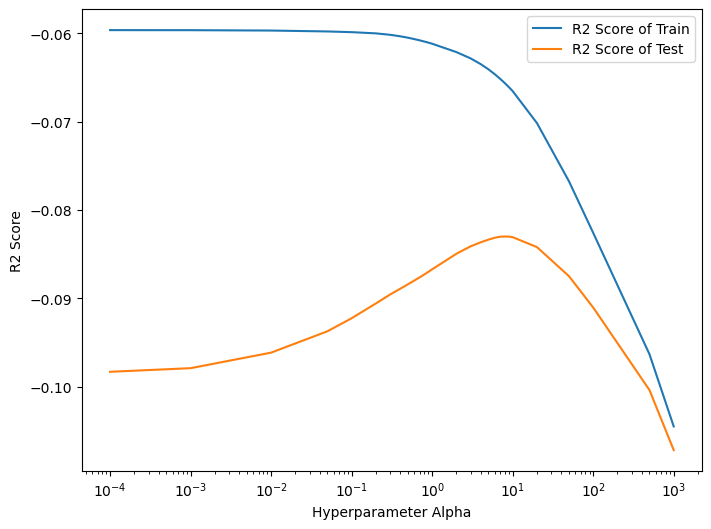

In [71]:
#plotting the R2 score vs alpha values of ridge model
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'], label='R2 Score of Train')
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'], label='R2 Score of Test')
plt.xlabel('Hyperparameter Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()

#ridge_results
#lasso_result

In [143]:

####### Lassso 

#building the lasso model with best parameters
lasso = Lasso(alpha=0.0022)
lasso.fit(X_train, y_train)

#printing the training and testing R2 score
print("R2 score (Train): ", lasso.score(X_train, y_train))
print("R2 score (Test): ", lasso.score(X_test, y_test))

lasso_features = pd.DataFrame({'Variables': X_train.columns, 'Coefficient': lasso.coef_})
lasso_features.sort_values(by='Coefficient', ascending=False).head(12)


lasso_result = pd.DataFrame(lasso_cv.cv_results_)
lasso_result.head()


R2 score (Train):  0.9049035810518966
R2 score (Test):  0.866625356776676


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.054333      0.013964         0.001592        0.000213      0.0001   
1       0.021015      0.001392         0.001395        0.000026      0.0011   
2       0.014977      0.003620         0.001385        0.000022      0.0021   
3       0.011033      0.002944         0.001398        0.000037      0.0031   
4       0.009780      0.003362         0.001364        0.000004      0.0041   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087009          -0.082265          -0.091144   
1  {'alpha': 0.0011}          -0.079637          -0.084894          -0.093184   
2  {'alpha': 0.0021}          -0.081163          -0.092237          -0.098433   
3  {'alpha': 0.0031}          -0.084520          -0.099202          -0.102303   
4  {'alpha': 0.0041}          -0.088832          -0.102608          -0.105871   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.083010          -0.081971        -0.085080        0.003532   
1          -0.085080          -0.079214        -0.084402        0.005049   
2          -0.088300          -0.088543        -0.089735        0.005637   
3          -0.091824          -0.097405        -0.095051        0.006272   
4          -0.094602          -0.100535        -0.098490        0.006066   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.061963           -0.059118   
1                1           -0.075067           -0.072849   
2                3           -0.083107           -0.080814   
3                4           -0.089910           -0.087381   
4                5           -0.095939           -0.091916   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.058836           -0.062188           -0.064162   
1           -0.070712           -0.074015           -0.075105   
2           -0.079470           -0.081695           -0.083631   
3           -0.085554           -0.088188           -0.089854   
4           -0.090581           -0.093571           -0.092721   

   mean_train_score  std_train_score  
0         -0.061253         0.002012  
1         -0.073550         0.001642  
2         -0.081743         0.001514  
3         -0.088177         0.001633  
4         -0.092946         0.001792

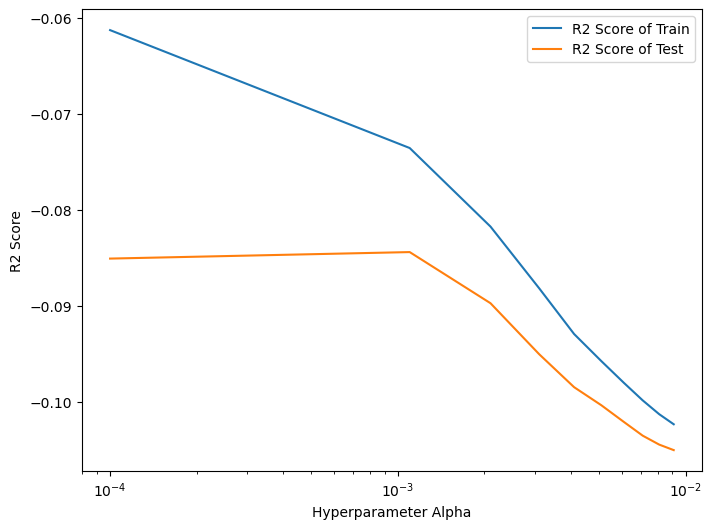

In [73]:
#plotting the R2 score vs alpha values of ridge model
plt.figure(figsize=(8,6))
plt.plot(lasso_result['param_alpha'], lasso_result['mean_train_score'], label='R2 Score of Train')
plt.plot(lasso_result['param_alpha'], lasso_result['mean_test_score'], label='R2 Score of Test')
plt.xlabel('Hyperparameter Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()


In [75]:
lasso_features['Coefficient'] = np.exp(lasso_features['Coefficient'])
lasso_features.sort_values(by='Coefficient', ascending=False).head(12)

Variables  Coefficient
10               GrLivArea     1.135245
109  OverallQual_Excellent     1.081127
220         Functional_Typ     1.076433
206           CentralAir_Y     1.062976
6              TotalBsmtSF     1.060137
69    Neighborhood_Crawfor     1.057813
114  OverallQual_Very Good     1.053120
84    Neighborhood_Somerst     1.051178
89         Condition1_Norm     1.045753
3               BsmtFinSF1     1.031713
19              GarageCars     1.026791
120       OverallCond_Good     1.026750

##### Question 3 (Rough Draft)

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now

 

In [160]:
##

#building the ridge model with best  hyperparameter alpha
ridge2 = Ridge(alpha=8.0)
ridge2.fit(X_train, y_train)

#printing r2 score
print("R2 score (Train): ", ridge2.score(X_train, y_train))
print("R2 score (Test): ", ridge2.score(X_test, y_test))


#checking the top 5 features identified through ridge regression
ridge_features = pd.DataFrame({'Variables': X_train.columns, 'Coefficient': ridge2.coef_})
top5ridge= ridge_features.sort_values(by='Coefficient', ascending=False).head(5)


top5ridge

R2 score (Train):  0.9376370090242531
R2 score (Test):  0.8881221175922376


Variables  Coefficient
109  OverallQual_Excellent     0.113754
69    Neighborhood_Crawfor     0.082984
118  OverallCond_Excellent     0.078760
114  OverallQual_Very Good     0.073423
10               GrLivArea     0.072326

In [152]:
exl=list(top5ridge['Variables'])

In [153]:
exl

['OverallQual_Excellent',
 'Neighborhood_Crawfor',
 'OverallCond_Excellent',
 'OverallQual_Very Good',
 'GrLivArea']

In [157]:
X_train_1=X_train.drop(exl,axis=1)
X_test_1=X_test.drop(exl,axis=1)

In [158]:
##

#building the ridge model with best  hyperparameter alpha
ridge2 = Ridge(alpha=8.0)
ridge2.fit(X_train_1, y_train)

#printing r2 score
print("R2 score (Train): ", ridge2.score(X_train_1, y_train))
print("R2 score (Test): ", ridge2.score(X_test_1, y_test))


#checking the top 5 features identified through ridge regression
ridge_features = pd.DataFrame({'Variables': X_train_1.columns, 'Coefficient': ridge2.coef_})
top5ridge= ridge_features.sort_values(by='Coefficient', ascending=False).head(5)

R2 score (Train):  0.9324869806434816
R2 score (Test):  0.8822630421636617


In [159]:
top5ridge

Variables  Coefficient
8                2ndFlrSF     0.111649
7                1stFlrSF     0.093750
82   Neighborhood_Somerst     0.075466
83   Neighborhood_StoneBr     0.073953
215        Functional_Typ     0.071225

In [166]:
### Lasso



####### Lassso 

#building the lasso model with best parameters
lasso = Lasso(alpha=0.0011)
lasso.fit(X_train, y_train)

#printing the training and testing R2 score
print("R2 score (Train): ", lasso.score(X_train, y_train))
print("R2 score (Test): ", lasso.score(X_test, y_test))

lasso_features = pd.DataFrame({'Variables': X_train.columns, 'Coefficient': lasso.coef_})
top5lasso=lasso_features.sort_values(by='Coefficient', ascending=False).head(5)
top5lasso


R2 score (Train):  0.9206823430285135
R2 score (Test):  0.8799310752591424


Variables  Coefficient
109  OverallQual_Excellent     0.134314
10               GrLivArea     0.095133
69    Neighborhood_Crawfor     0.085153
84    Neighborhood_Somerst     0.080214
114  OverallQual_Very Good     0.079067

In [165]:
exl=list(top5lasso['Variables'])


In [167]:
X_train_1=X_train.drop(exl,axis=1)
X_test_1=X_test.drop(exl,axis=1)

In [168]:
###### Lassso 

#building the lasso model with best parameters
lasso = Lasso(alpha=0.0011)
lasso.fit(X_train_1, y_train)

#printing the training and testing R2 score
print("R2 score (Train): ", lasso.score(X_train_1, y_train))
print("R2 score (Test): ", lasso.score(X_test_1, y_test))

lasso_features = pd.DataFrame({'Variables': X_train_1.columns, 'Coefficient': lasso.coef_})
top5lasso=lasso_features.sort_values(by='Coefficient', ascending=False).head(5)
top5lasso


R2 score (Train):  0.9139450660381777
R2 score (Test):  0.8753674251789061


Variables  Coefficient
8               2ndFlrSF     0.122027
7               1stFlrSF     0.103963
45           MSZoning_FV     0.094424
215       Functional_Typ     0.072082
126  Exterior1st_BrkFace     0.068497